In [5]:
import pandas as pd

# Load data
file_path = './MagellanData.xlsx'
xls = pd.ExcelFile(file_path)
fmagx_df = xls.parse('FMAGX')
gacs_df = xls.parse('GACs')

# Clean FMAGX
fmagx_df.replace(-9999, pd.NA, inplace=True)
fmagx_df_long = fmagx_df.melt(id_vars=['yyyy'], var_name='month', value_name='return')
fmagx_df_long['month'] = fmagx_df_long['month'].str.extract('(\d+)').astype(int)
fmagx_df_long['date'] = pd.to_datetime(fmagx_df_long['yyyy'].astype(str) + '-' + fmagx_df_long['month'].astype(str))
fmagx_df_long = fmagx_df_long.drop(columns=['yyyy', 'month']).set_index('date').sort_index()
fmagx_df_long = fmagx_df_long[(fmagx_df_long['return'] > -100) & (fmagx_df_long['return'] < 100)]  # remove extreme outliers

# Clean GACs
gacs_df = gacs_df.rename(columns={'Month': 'date'})
gacs_df['date'] = pd.to_datetime(gacs_df['date'])
gacs_df.set_index('date', inplace=True)

# Export cleaned data
fmagx_df_long.to_csv('Cleaned_FMAGX.csv')
gacs_df.to_csv('Cleaned_GACs.csv')


In [16]:
import pandas as pd

# Load the original CSV file
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Sort the DataFrame by date
gacs_df = gacs_df.sort_index()

# Save the sorted DataFrame to a new CSV file
gacs_df.to_csv('Sorted_Cleaned_GACs.csv')

print("Data has been sorted by date and saved to 'Sorted_Cleaned_GACs.csv'")


Data has been sorted by date and saved to 'Sorted_Cleaned_GACs.csv'


In [31]:
import pandas as pd

# Load the CSV file (adjust the file path as needed)
magellan_data = pd.read_csv('Cleaned_FMAGX.csv')
gac_data = pd.read_csv('Cleaned_GACs.csv')

# Display the data types of each column in the Magellan data
print("Data types for Magellan Fund (FMAGX) data:")
print(magellan_data.dtypes)
print("\n")

# Display the data types of each column in the GACs data
print("Data types for General Asset Classes (GACs) data:")
print(gac_data.dtypes)


Data types for Magellan Fund (FMAGX) data:
date       object
return    float64
dtype: object


Data types for General Asset Classes (GACs) data:
date          object
Gac 1         object
Gac 2         object
Gac 3         object
Gac 4         object
Gac 5         object
Gac 6         object
Gac 7         object
Gac 8         object
Gac 9         object
Gac 10        object
Gac 11        object
Gac 12        object
Gac 13        object
Gac 14        object
Gac 15        object
Core3         object
Inflation    float64
dtype: object


Columns in DataFrame:
Index(['date', 'Gac 1', 'Gac 2', 'Gac 3', 'Gac 4', 'Gac 5', 'Gac 6', 'Gac 7',
       'Gac 8', 'Gac 9', 'Gac 10', 'Gac 11', 'Gac 12', 'Gac 13', 'Gac 14',
       'Gac 15', 'Core3', 'Inflation'],
      dtype='object')

DataFrame dtypes after conversion:
Gac 1        float64
Gac 2        float64
Gac 3        float64
Gac 4        float64
Gac 5        float64
Gac 6        float64
Gac 7        float64
Gac 8        float64
Gac 9        float64
Gac 10       float64
Gac 11       float64
Gac 12       float64
Gac 13       float64
Gac 14       float64
Gac 15       float64
Core3        float64
Inflation    float64
dtype: object


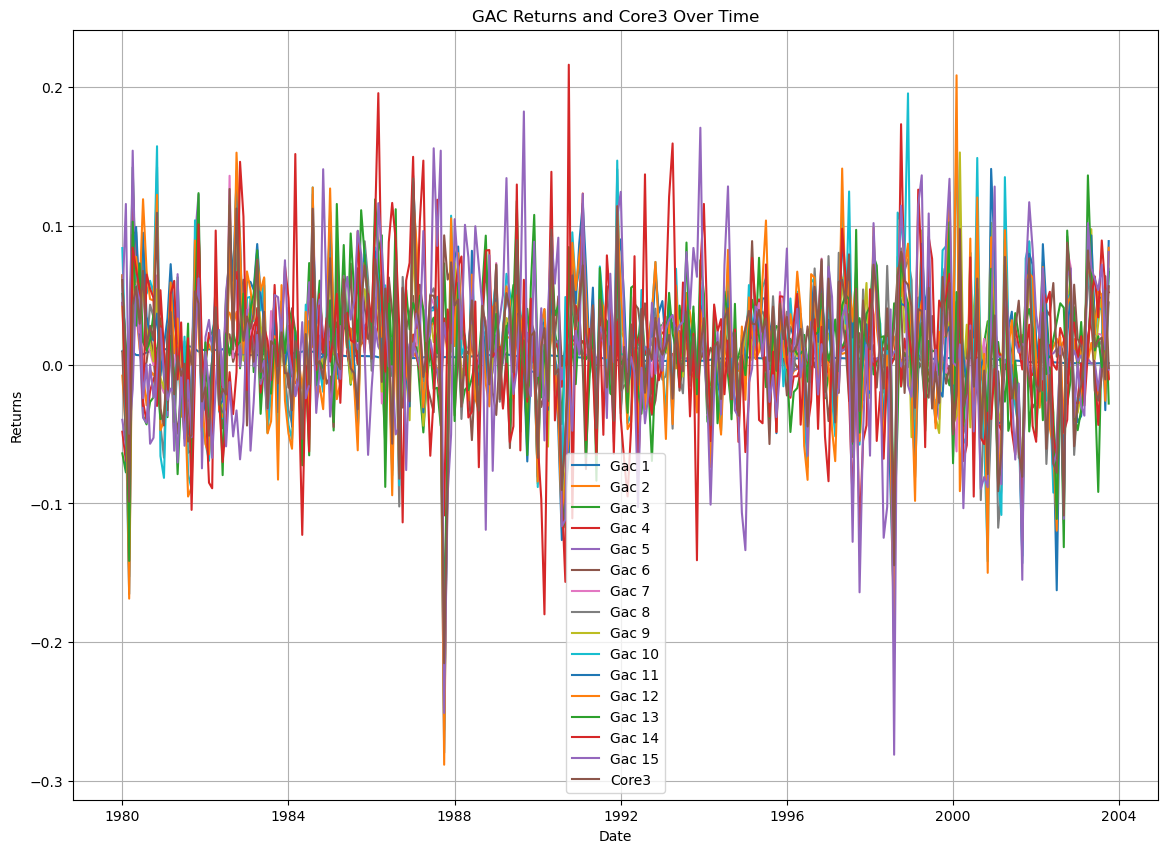

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the path to your CSV file
csv_file_path = 'Cleaned_GACs.csv'  # Update this to the path of your CSV file

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Display the DataFrame columns to verify the structure
print("Columns in DataFrame:")
print(df.columns)

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index
df.set_index('date', inplace=True)

# Convert GAC 1-15 and Core3 to float64
gac_columns = [f'Gac {i}' for i in range(1, 16)] + ['Core3']
for column in gac_columns:
    if column in df.columns:
        df[column] = df[column].astype('float64')

# Display the DataFrame types to verify changes
print("\nDataFrame dtypes after conversion:")
print(df.dtypes)

# Optional: Plotting to visualize the GAC columns and Core3
plt.figure(figsize=(14, 10))
for column in gac_columns:
    if column in df.columns:
        plt.plot(df.index, df[column], label=column)

plt.title('GAC Returns and Core3 Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid()
plt.show()


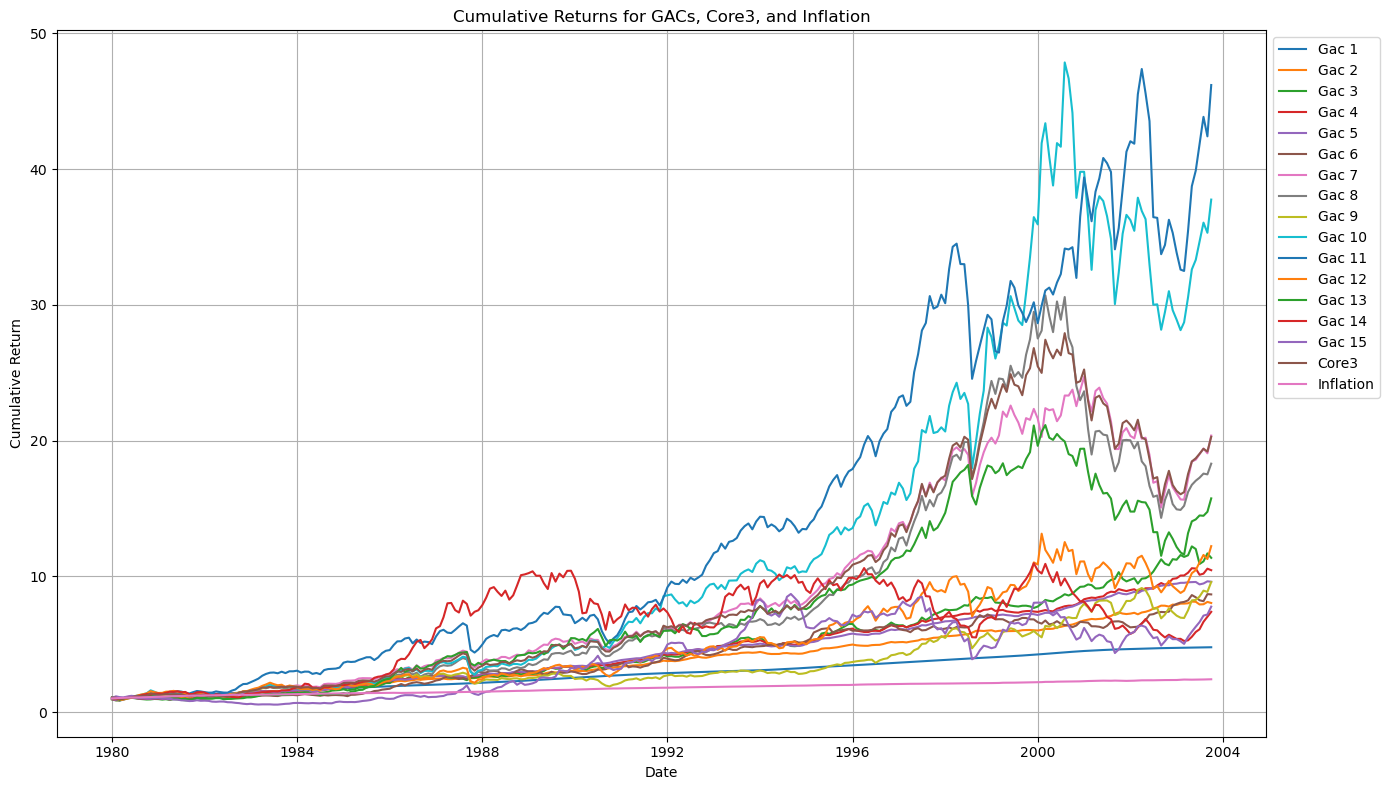

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the cleaned GACs data (assuming it's already preprocessed as described)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Sort the DataFrame by date
gacs_df = gacs_df.sort_index()

# Convert returns to numeric to handle any potential invalid entries
for col in gacs_df.columns:
    gacs_df[col] = pd.to_numeric(gacs_df[col], errors='coerce')

# Filter for GAC 1 to GAC 15, Core3, and Inflation
gac_columns = [f'Gac {i}' for i in range(1, 16)] + ['Core3', 'Inflation']
gacs_filtered = gacs_df[gac_columns]

# Calculate cumulative returns
cumulative_returns = (1 + gacs_filtered).cumprod()

# Plot cumulative returns
plt.figure(figsize=(14, 8))
for col in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[col], label=col)

# Set plot title and labels
plt.title("Cumulative Returns for GACs, Core3, and Inflation")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
# Assuming df is your DataFrame
pd.set_option('display.max_rows', None)  # Set max rows to None to display all rows
pd.set_option('display.max_columns', None)  # Set max columns to None to display all columns

# Now print the DataFrame
print(df)

# Optional: Reset the options to defaults after printing if needed
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

               Gac 1   Gac 2   Gac 3   Gac 4   Gac 5     Gac 6     Gac 7  \
date                                                                       
2003-10-01  0.001092 -0.0098 -0.0280 -0.0105 -0.0035 -0.002333  0.068355   
2003-09-01  0.000958  0.0217  0.0529  0.0358  0.0170  0.063833 -0.018104   
2003-08-01  0.001125  0.0018  0.0175  0.0083  0.0071 -0.008464  0.021639   
2003-07-01  0.001067 -0.0243 -0.0917 -0.0434 -0.0187 -0.025887  0.022203   
2003-06-01  0.000908 -0.0016 -0.0158 -0.0023  0.0016 -0.018812  0.007310   
2003-05-01  0.000942  0.0157  0.0570  0.0324  0.0008  0.047326  0.073614   
2003-04-01  0.001017  0.0028  0.0102  0.0200  0.0042  0.014059  0.098804   
2003-03-01  0.000992  0.0002 -0.0121  0.0004  0.0001  0.005147 -0.001230   
2003-02-01  0.001033  0.0113  0.0308  0.0205  0.0067  0.013093 -0.027242   
2003-01-01  0.001092 -0.0022 -0.0034  0.0042  0.0024  0.018652 -0.027364   
2002-12-01  0.001100  0.0185  0.0415  0.0305  0.0104  0.057709 -0.051954   
2002-11-01  

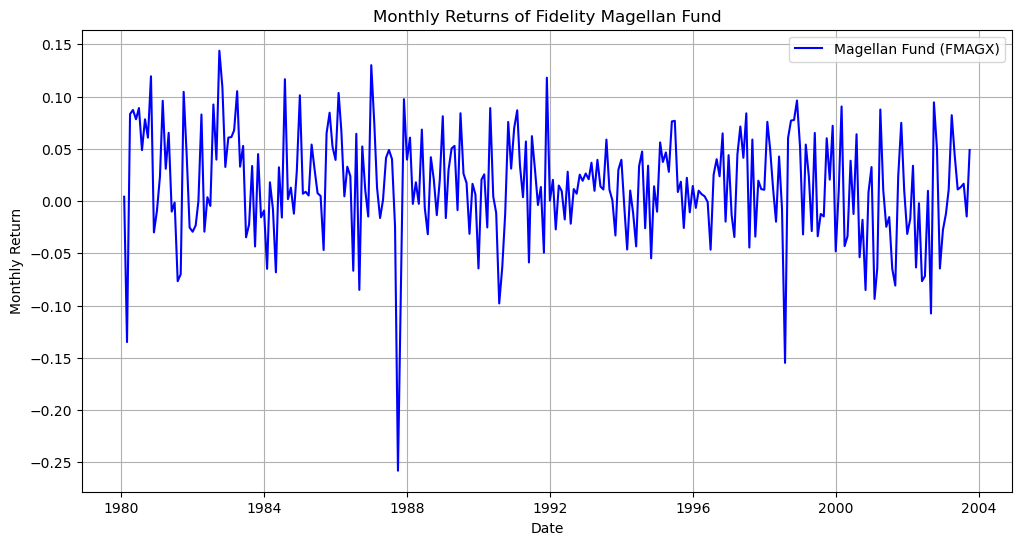

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Magellan data (make sure the file path is correct for your local environment)
magellan_data = pd.read_csv('Cleaned_FMAGX.csv', parse_dates=['date'])

# Drop any rows with missing values (if necessary)
magellan_data = magellan_data.dropna()

# Plot Magellan Fund's monthly returns
plt.figure(figsize=(12, 6))
plt.plot(magellan_data['date'], magellan_data['return'], label='Magellan Fund (FMAGX)', color='blue', linewidth=1.5)
plt.title('Monthly Returns of Fidelity Magellan Fund')
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.legend()
plt.grid(True)
plt.show()


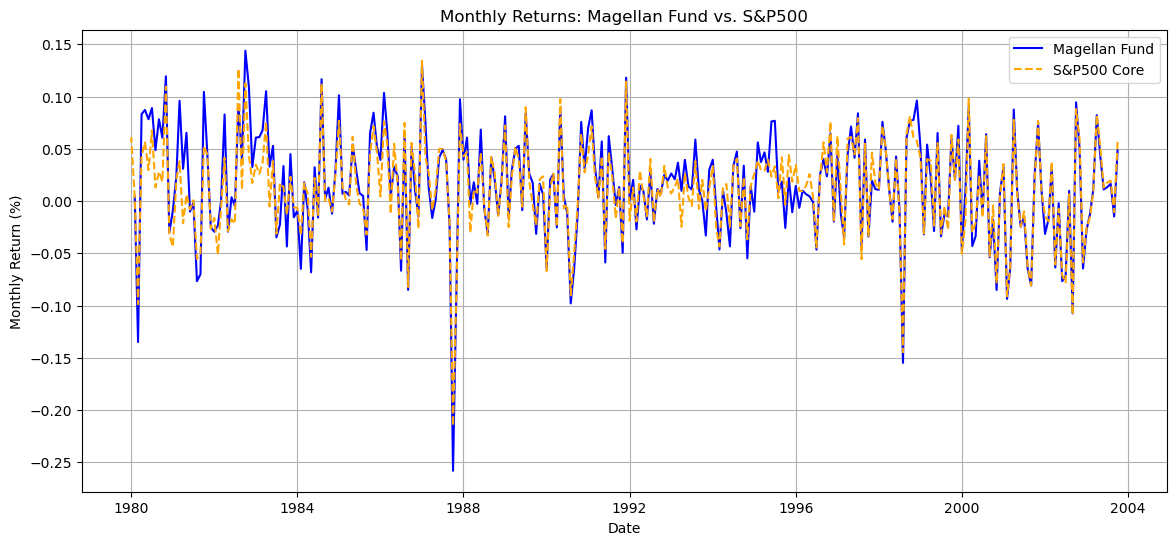

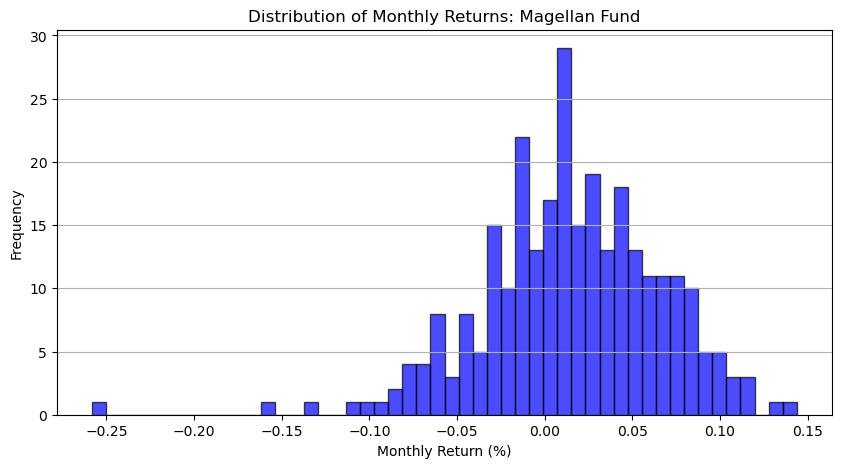

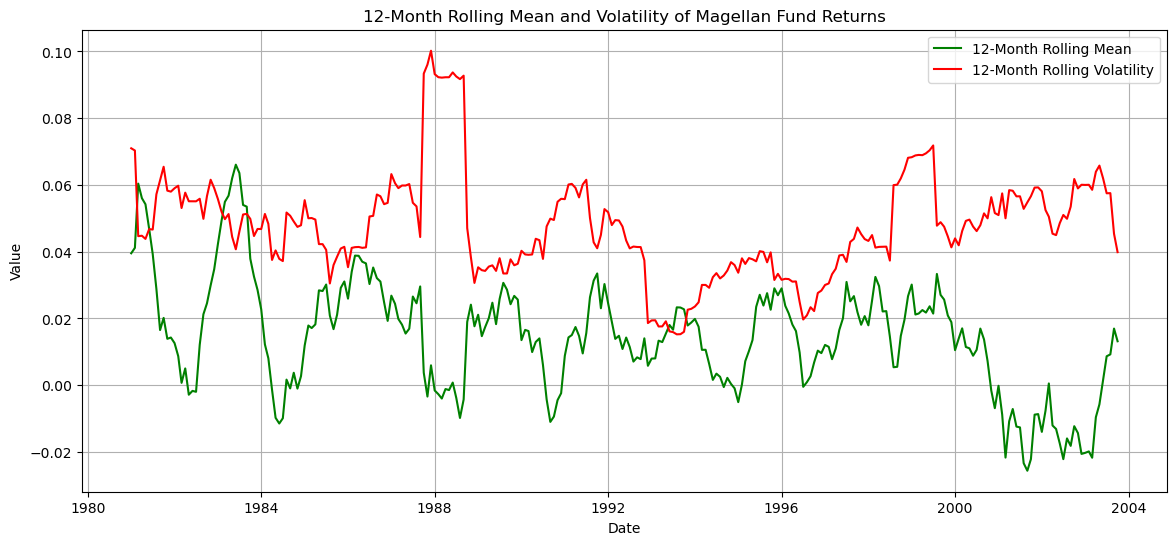

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col='date', parse_dates=True)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Visualize Monthly Returns of the Magellan Fund and S&P 500
plt.figure(figsize=(14, 6))
plt.plot(fmagx_df['return'], label='Magellan Fund', color='blue')
plt.plot(gacs_df['Core3'], label='S&P500 Core', color='orange', linestyle='--')
plt.title("Monthly Returns: Magellan Fund vs. S&P500")
plt.xlabel("Date")
plt.ylabel("Monthly Return (%)")
plt.legend()
plt.grid(True)
plt.show()

# Histogram of Monthly Returns for Magellan Fund
plt.figure(figsize=(10, 5))
plt.hist(fmagx_df['return'].dropna(), bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Monthly Returns: Magellan Fund")
plt.xlabel("Monthly Return (%)")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

# Optional: Rolling Mean and Volatility (e.g., 12-month rolling window)
fmagx_df['rolling_mean'] = fmagx_df['return'].rolling(window=12).mean()
fmagx_df['rolling_vol'] = fmagx_df['return'].rolling(window=12).std()

plt.figure(figsize=(14, 6))
plt.plot(fmagx_df['rolling_mean'], label='12-Month Rolling Mean', color='green')
plt.plot(fmagx_df['rolling_vol'], label='12-Month Rolling Volatility', color='red')
plt.title("12-Month Rolling Mean and Volatility of Magellan Fund Returns")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


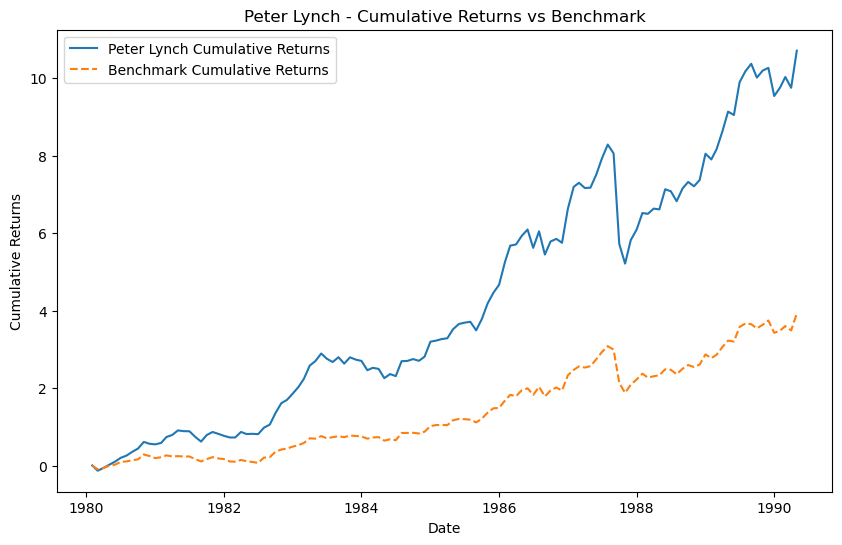

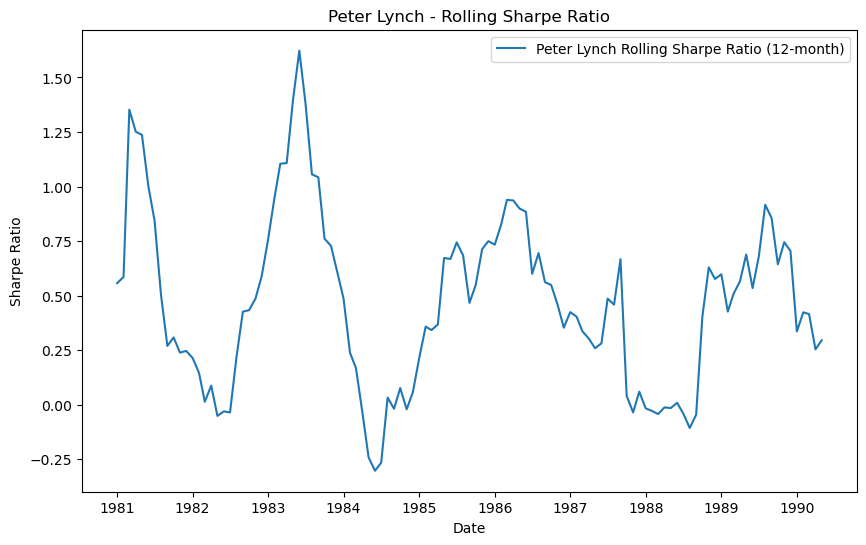

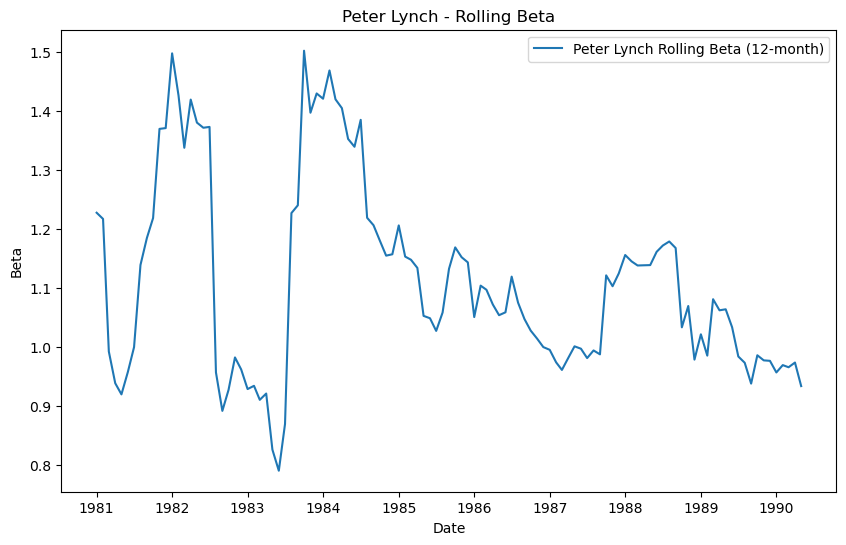

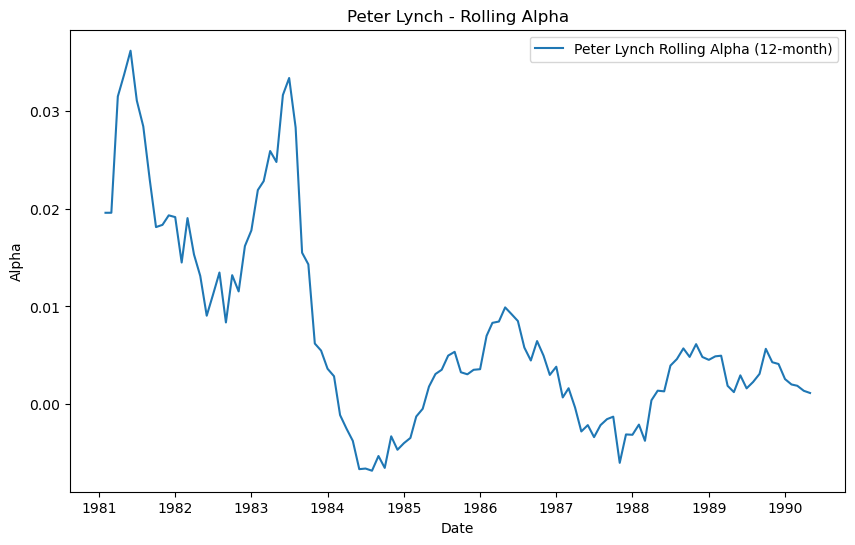

Peter Lynch metrics:
mean_return: 0.0217
volatility: 0.0568
sharpe_ratio: 0.1337
alpha: 1.1120
beta: 0.0060
utility: 0.0168




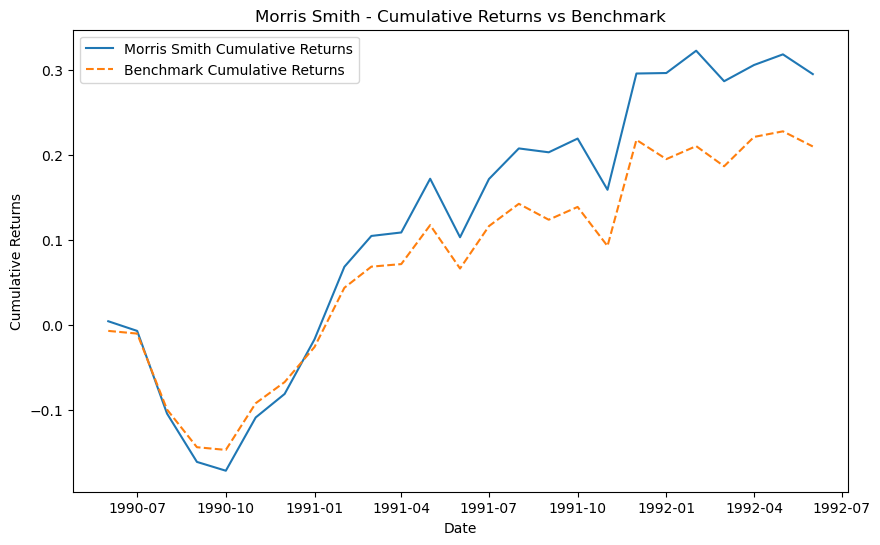

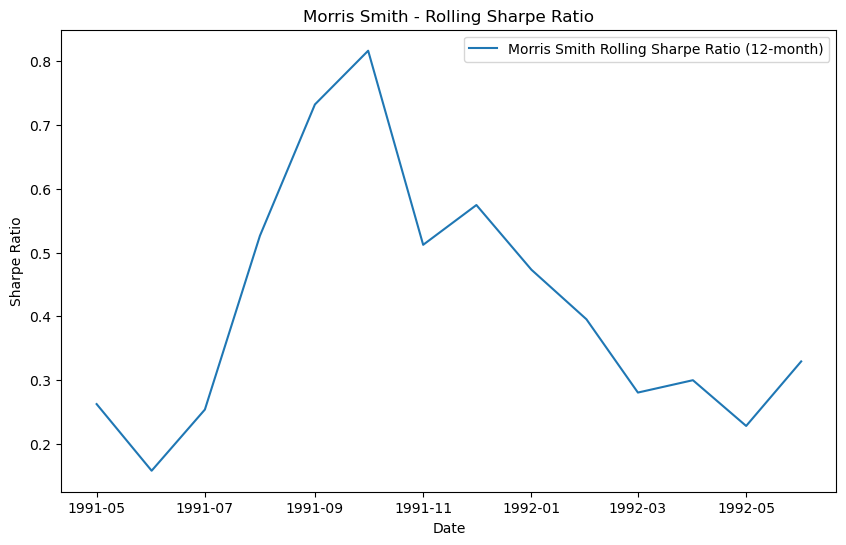

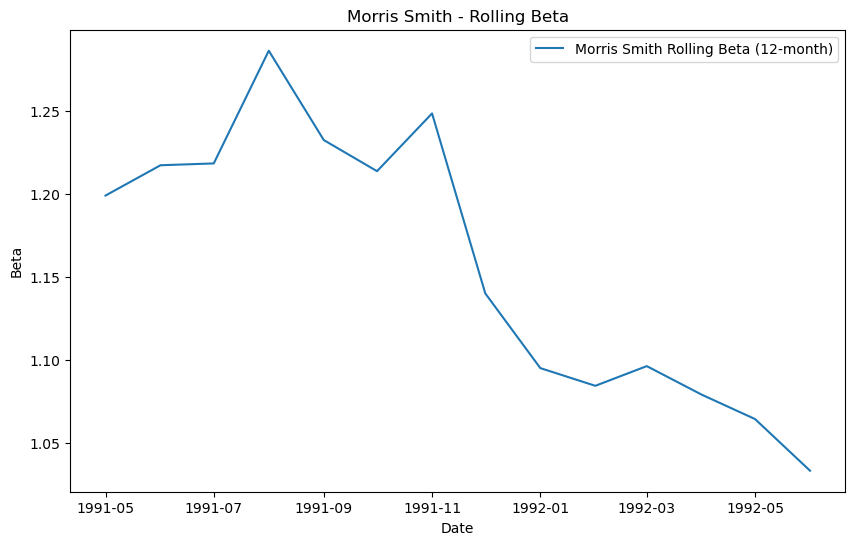

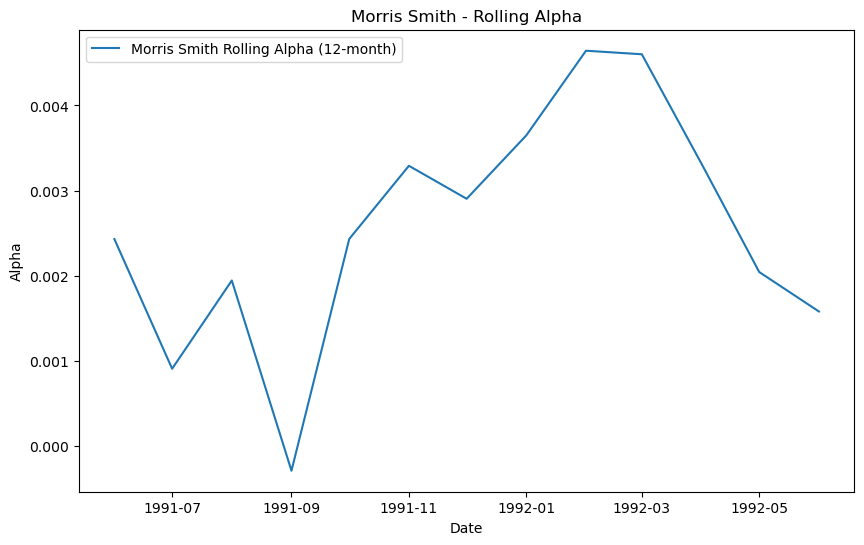

Morris Smith metrics:
mean_return: 0.0116
volatility: 0.0503
sharpe_ratio: 0.0607
alpha: 1.1380
beta: 0.0019
utility: 0.0078




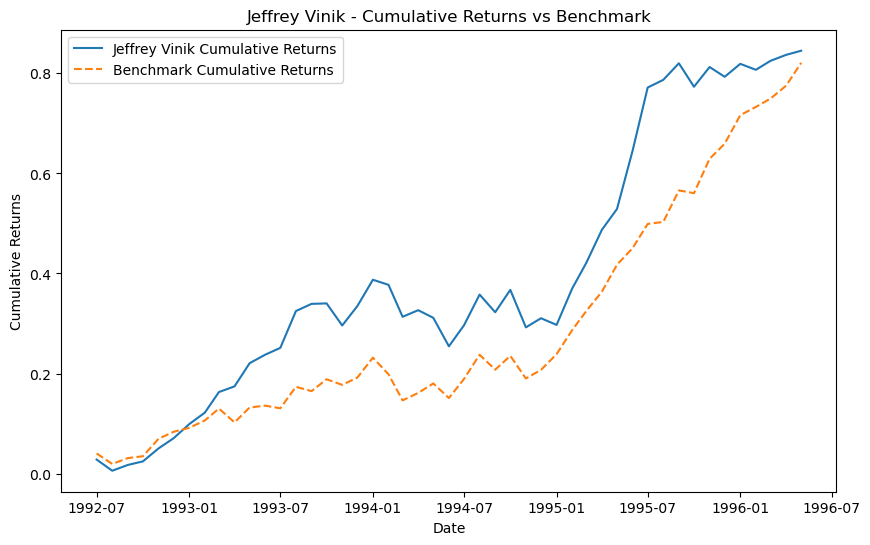

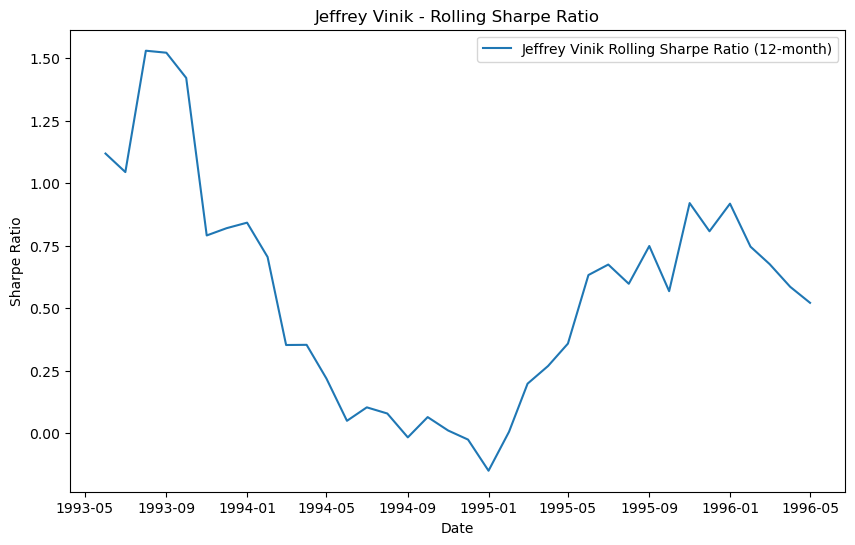

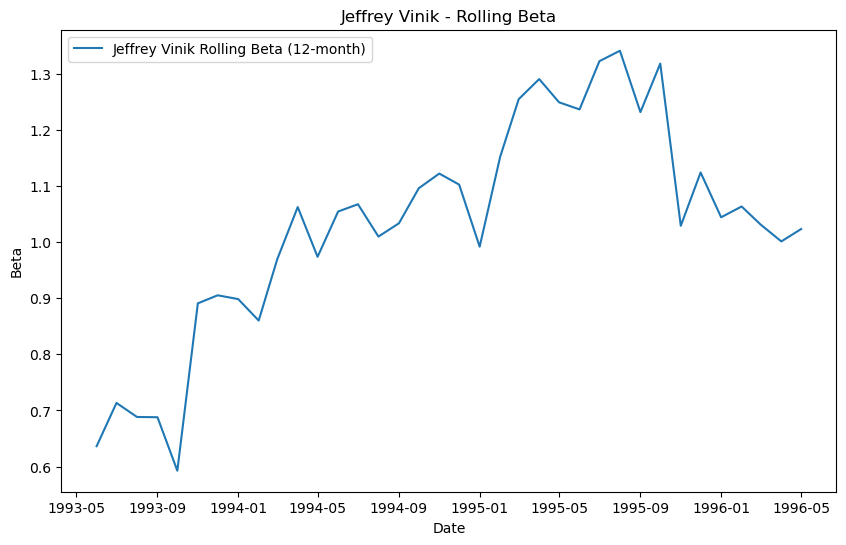

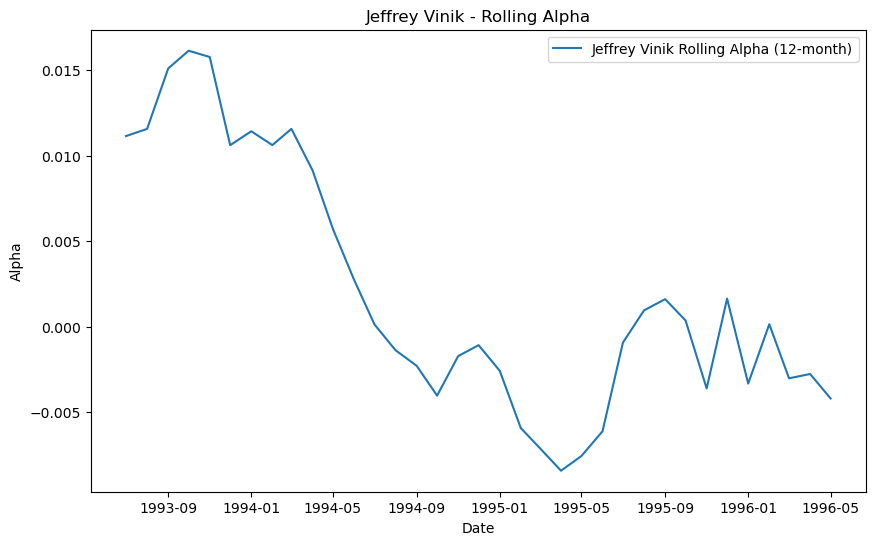

Jeffrey Vinik metrics:
mean_return: 0.0135
volatility: 0.0293
sharpe_ratio: 0.0155
alpha: 0.9823
beta: 0.0007
utility: 0.0122




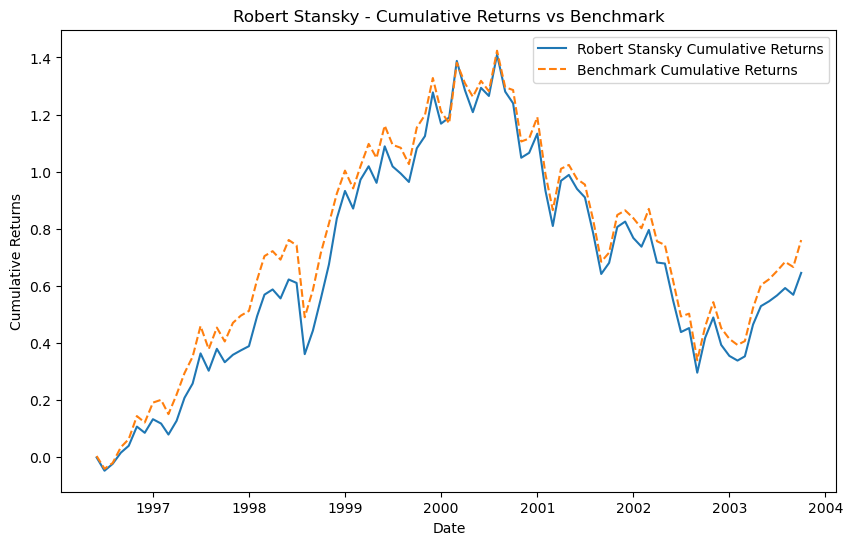

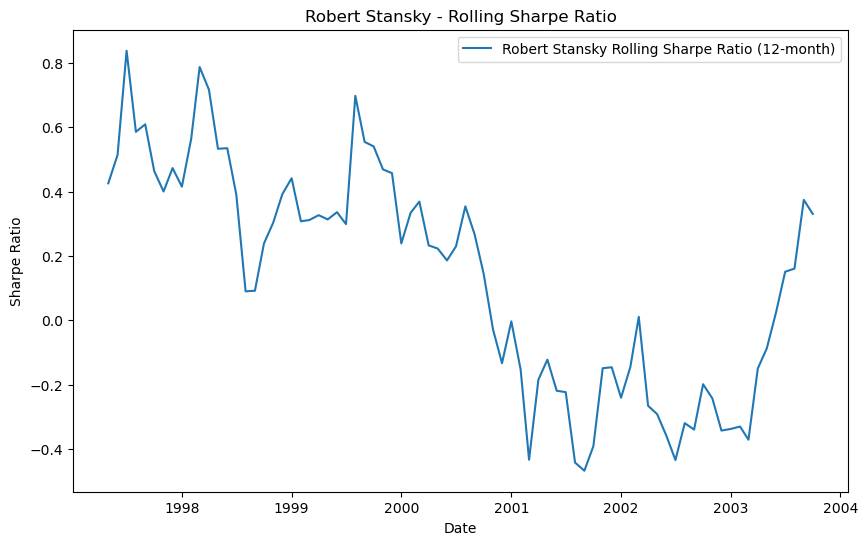

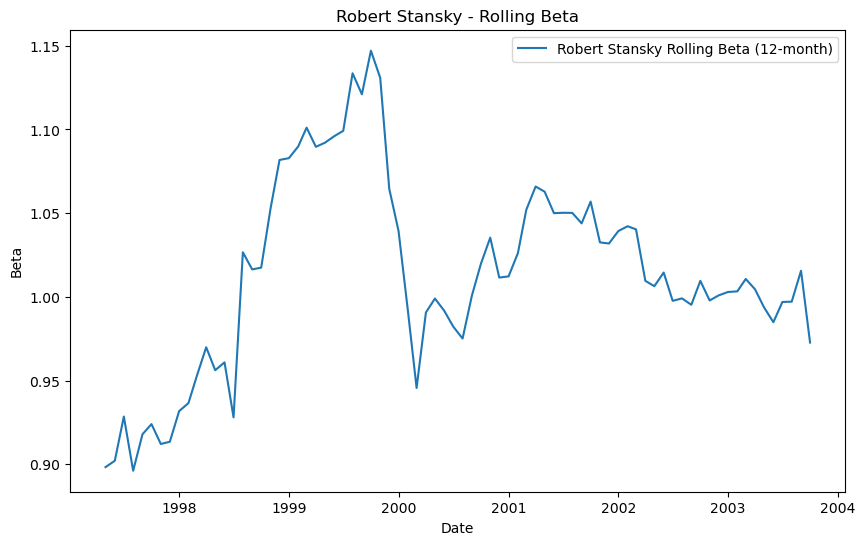

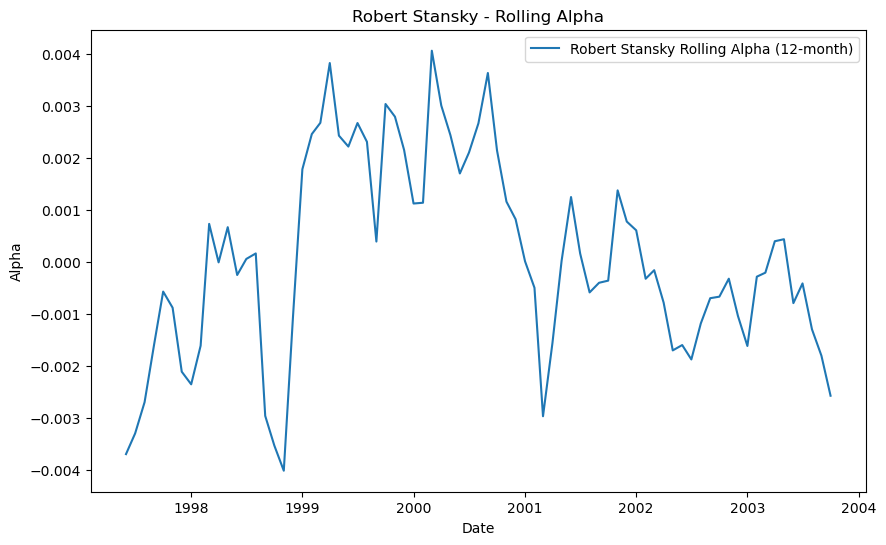

Robert Stansky metrics:
mean_return: 0.0070
volatility: 0.0524
sharpe_ratio: -0.0132
alpha: 1.0094
beta: -0.0008
utility: 0.0029




In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Sort dataframes by date (assuming `fmagx_df` and `gacs_df` are already cleaned and sorted)
fmagx_df = fmagx_df.sort_index()
gacs_df = gacs_df.sort_index()

# Define manager periods
manager_periods = {
    'Peter Lynch': ('1980-02-01', '1990-05-01'),
    'Morris Smith': ('1990-06-01', '1992-06-01'),
    'Jeffrey Vinik': ('1992-07-01', '1996-05-01'),
    'Robert Stansky': ('1996-06-01', '2003-10-01')
}

# Benchmark returns (Core3 from GACs)
benchmark_returns = gacs_df['Core3']

# Analysis Functions
def calculate_metrics(returns, benchmark):
    metrics = {}
    excess_returns = returns - benchmark.mean()
    
    # Mean return and volatility
    metrics['mean_return'] = returns.mean()
    metrics['volatility'] = returns.std()
    
    # Sharpe ratio
    metrics['sharpe_ratio'] = excess_returns.mean() / returns.std()
    
    # Alpha and beta
    metrics['alpha'], metrics['beta'] = stats.linregress(benchmark, returns)[:2]
    
    # Utility function with a risk aversion coefficient (assumed 3 here)
    risk_aversion = 3
    metrics['utility'] = returns.mean() - 0.5 * risk_aversion * returns.var()
    
    return metrics

# Rolling regression function to calculate rolling alpha and beta
def rolling_alpha_beta(returns, benchmark, window=12):
    rolling_alpha = []
    rolling_beta = []
    
    for i in range(window, len(returns)):
        y = returns[i-window:i]
        x = benchmark[i-window:i]
        if len(x) > 1:  # Ensure there is enough data
            beta, alpha, _, _, _ = stats.linregress(x, y)
            rolling_alpha.append(alpha)
            rolling_beta.append(beta)
        else:
            rolling_alpha.append(np.nan)
            rolling_beta.append(np.nan)
    
    # Pad with NaNs for alignment with original index
    return pd.Series(rolling_alpha, index=returns.index[window:]), pd.Series(rolling_beta, index=returns.index[window:])

# Calculate and visualize metrics for each manager
manager_metrics = {}
for manager, period in manager_periods.items():
    start, end = period
    returns = fmagx_df.loc[start:end, 'return']
    benchmark = benchmark_returns.loc[start:end]
    metrics = calculate_metrics(returns, benchmark)
    manager_metrics[manager] = metrics

    # Cumulative returns
    cumulative_returns = (1 + returns).cumprod() - 1
    cumulative_benchmark = (1 + benchmark).cumprod() - 1

    # Plot cumulative returns
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_returns, label=f"{manager} Cumulative Returns")
    plt.plot(cumulative_benchmark, label="Benchmark Cumulative Returns", linestyle="--")
    plt.title(f"{manager} - Cumulative Returns vs Benchmark")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Returns")
    plt.legend()
    plt.show()
    
    # Plot rolling Sharpe ratio
    rolling_sharpe = (returns.rolling(window=12).mean() / returns.rolling(window=12).std()).dropna()
    plt.figure(figsize=(10, 6))
    plt.plot(rolling_sharpe, label=f"{manager} Rolling Sharpe Ratio (12-month)")
    plt.title(f"{manager} - Rolling Sharpe Ratio")
    plt.xlabel("Date")
    plt.ylabel("Sharpe Ratio")
    plt.legend()
    plt.show()

    # Plot rolling beta
    rolling_beta = returns.rolling(window=12).cov(benchmark) / benchmark.rolling(window=12).var()
    plt.figure(figsize=(10, 6))
    plt.plot(rolling_beta, label=f"{manager} Rolling Beta (12-month)")
    plt.title(f"{manager} - Rolling Beta")
    plt.xlabel("Date")
    plt.ylabel("Beta")
    plt.legend()
    plt.show()

    # Calculate and plot rolling alpha
    rolling_alpha, rolling_beta = rolling_alpha_beta(returns, benchmark, window=12)
    plt.figure(figsize=(10, 6))
    plt.plot(rolling_alpha, label=f"{manager} Rolling Alpha (12-month)")
    plt.title(f"{manager} - Rolling Alpha")
    plt.xlabel("Date")
    plt.ylabel("Alpha")
    plt.legend()
    plt.show()

    # Print metrics
    print(f"{manager} metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("\n")


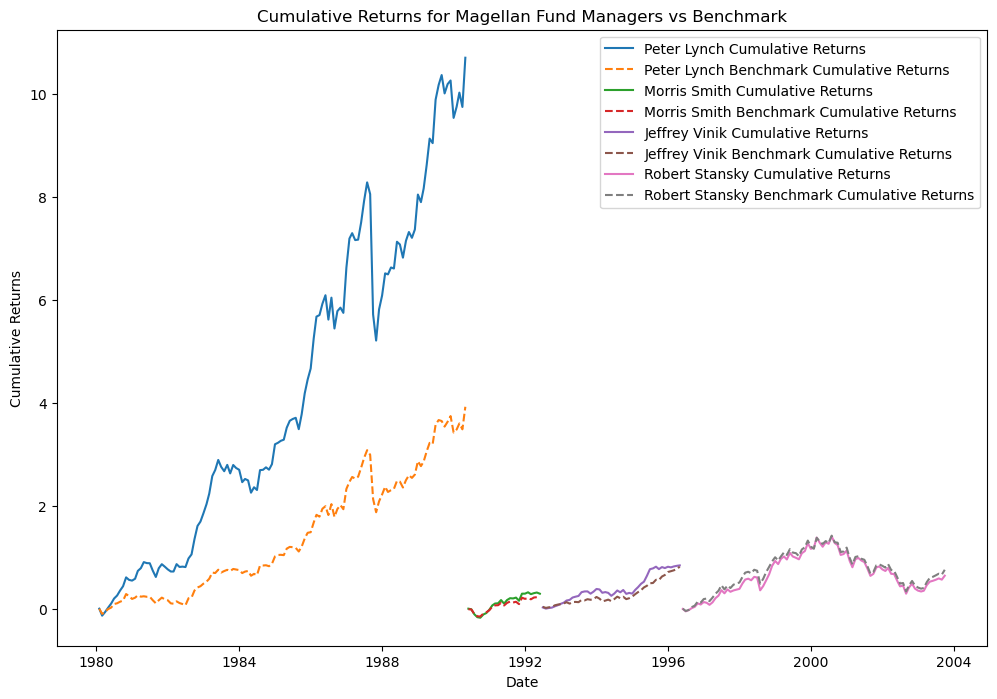

In [54]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt

# Initialize an empty dictionary to store cumulative returns for each manager and the benchmark
manager_cumulative_returns = {}
benchmark_cumulative_returns = {}

# Loop through each manager and period to calculate cumulative returns
for manager, period in manager_periods.items():
    start, end = period
    # Manager's returns
    manager_returns = fmagx_df.loc[start:end, 'return']
    # Benchmark's returns over the same period
    benchmark_returns = gacs_df['Core3'].loc[start:end]
    
    # Calculate cumulative returns for manager and benchmark
    manager_cumulative = (1 + manager_returns).cumprod() - 1
    benchmark_cumulative = (1 + benchmark_returns).cumprod() - 1
    
    # Store the results for later plotting
    manager_cumulative_returns[manager] = manager_cumulative
    benchmark_cumulative_returns[manager] = benchmark_cumulative

# Plot cumulative returns for each manager vs benchmark
plt.figure(figsize=(12, 8))

for manager in manager_cumulative_returns:
    plt.plot(manager_cumulative_returns[manager], label=f"{manager} Cumulative Returns")
    plt.plot(benchmark_cumulative_returns[manager], linestyle='--', label=f"{manager} Benchmark Cumulative Returns")

plt.title("Cumulative Returns for Magellan Fund Managers vs Benchmark")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()


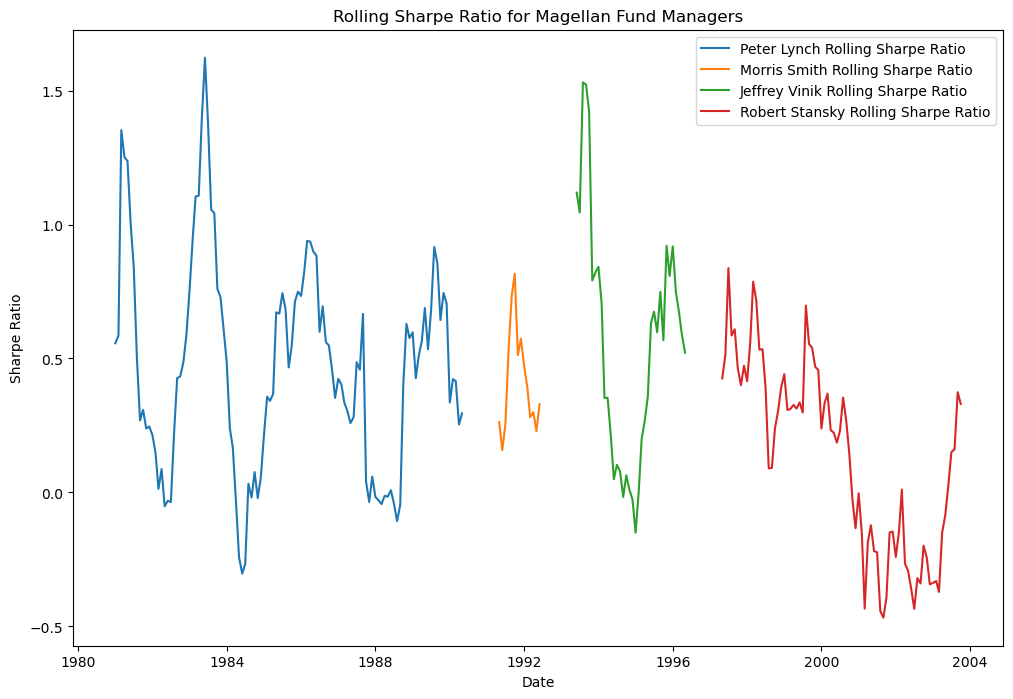

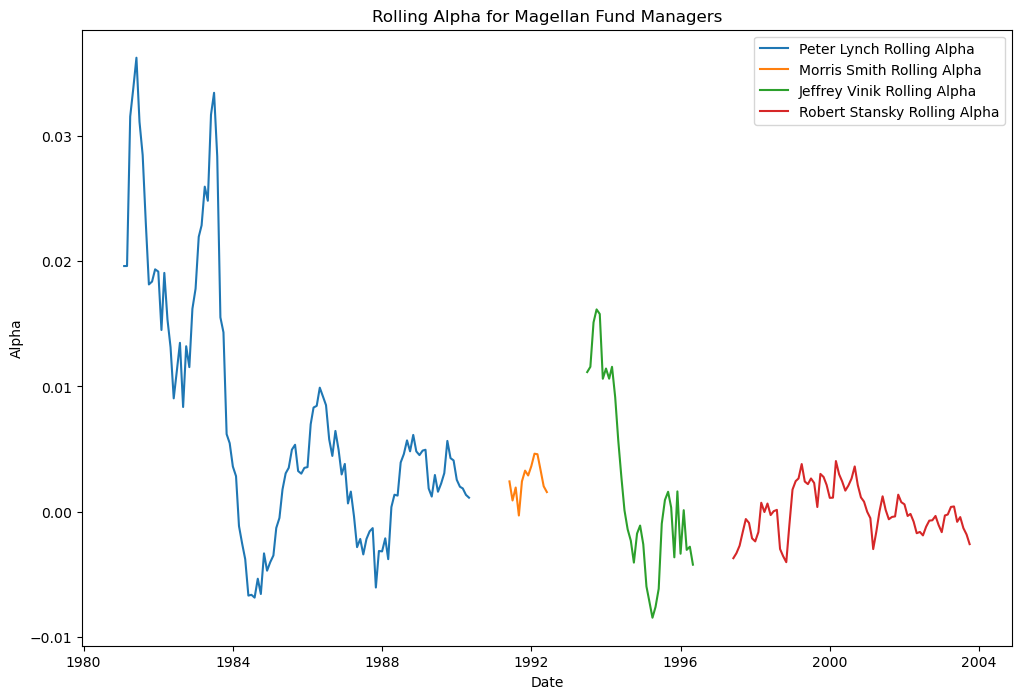

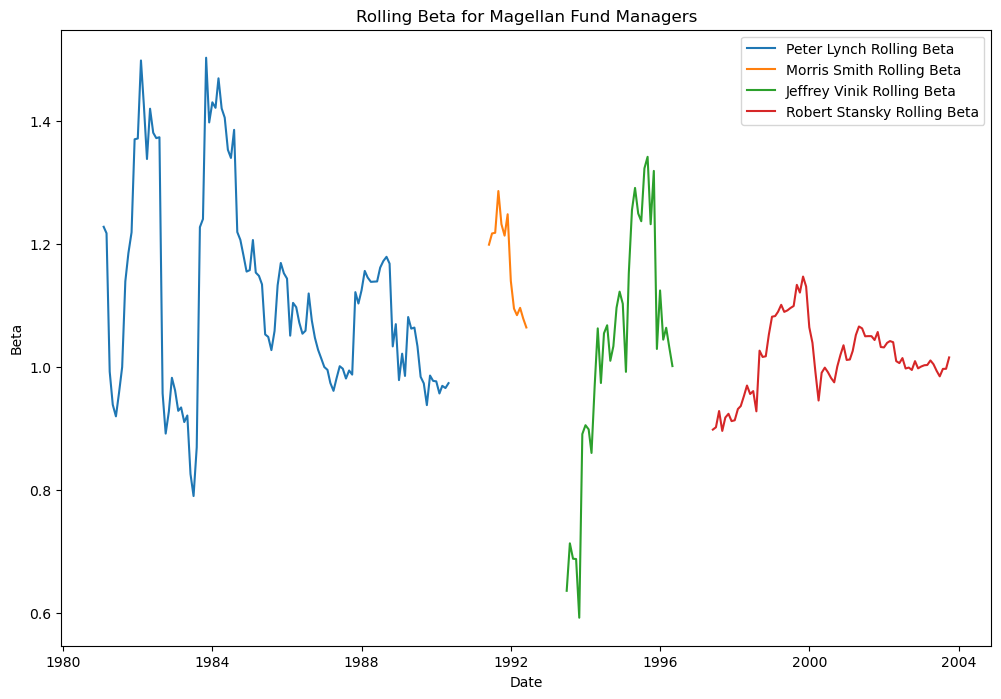

In [51]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt

# Define manager periods as per previous code
manager_periods = {
    'Peter Lynch': ('1980-02-01', '1990-05-01'),
    'Morris Smith': ('1990-06-01', '1992-06-01'),
    'Jeffrey Vinik': ('1992-07-01', '1996-05-01'),
    'Robert Stansky': ('1996-06-01', '2003-10-01')
}

# Calculate rolling Sharpe ratio, rolling alpha, and rolling beta for each manager
rolling_sharpe_data = {}
rolling_alpha_data = {}
rolling_beta_data = {}

for manager, period in manager_periods.items():
    start, end = period
    returns = fmagx_df.loc[start:end, 'return']
    benchmark = gacs_df['Core3'].loc[start:end]
    
    # Calculate rolling Sharpe ratio with a 12-month rolling window
    rolling_sharpe = (returns.rolling(window=12).mean() / returns.rolling(window=12).std()).dropna()
    rolling_sharpe_data[manager] = rolling_sharpe

    # Calculate rolling alpha and beta with a 12-month rolling window
    rolling_alpha, rolling_beta = rolling_alpha_beta(returns, benchmark, window=12)
    rolling_alpha_data[manager] = rolling_alpha
    rolling_beta_data[manager] = rolling_beta

# Plot Rolling Sharpe Ratios
plt.figure(figsize=(12, 8))
for manager, sharpe in rolling_sharpe_data.items():
    plt.plot(sharpe, label=f"{manager} Rolling Sharpe Ratio")
plt.title("Rolling Sharpe Ratio for Magellan Fund Managers")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.legend()
plt.show()

# Plot Rolling Alpha
plt.figure(figsize=(12, 8))
for manager, alpha in rolling_alpha_data.items():
    plt.plot(alpha, label=f"{manager} Rolling Alpha")
plt.title("Rolling Alpha for Magellan Fund Managers")
plt.xlabel("Date")
plt.ylabel("Alpha")
plt.legend()
plt.show()

# Plot Rolling Beta
plt.figure(figsize=(12, 8))
for manager, beta in rolling_beta_data.items():
    plt.plot(beta, label=f"{manager} Rolling Beta")
plt.title("Rolling Beta for Magellan Fund Managers")
plt.xlabel("Date")
plt.ylabel("Beta")
plt.legend()
plt.show()


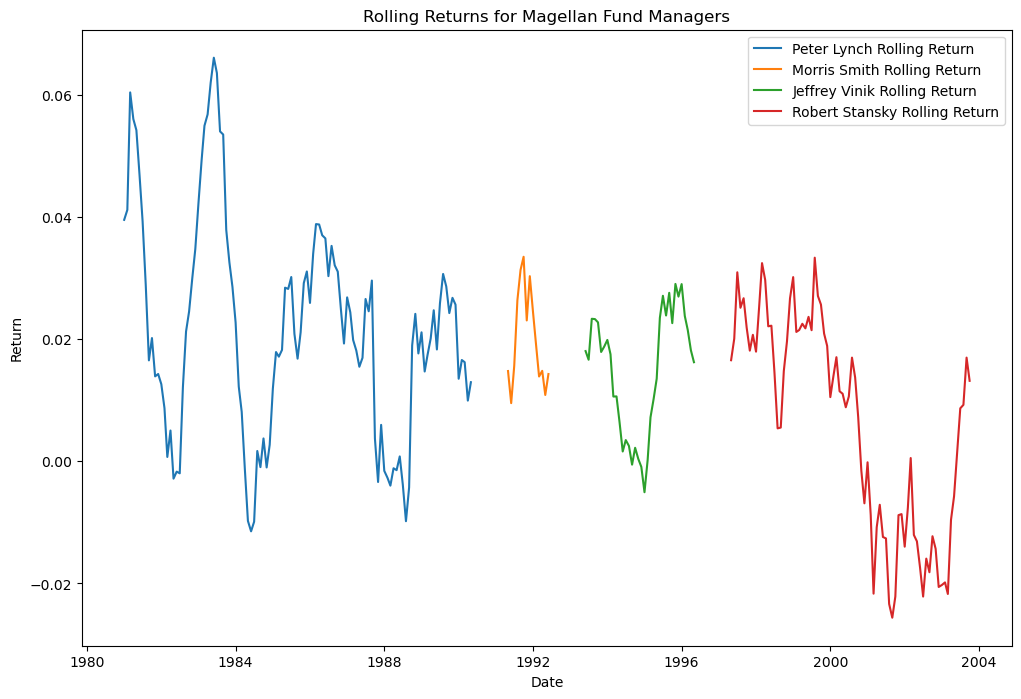

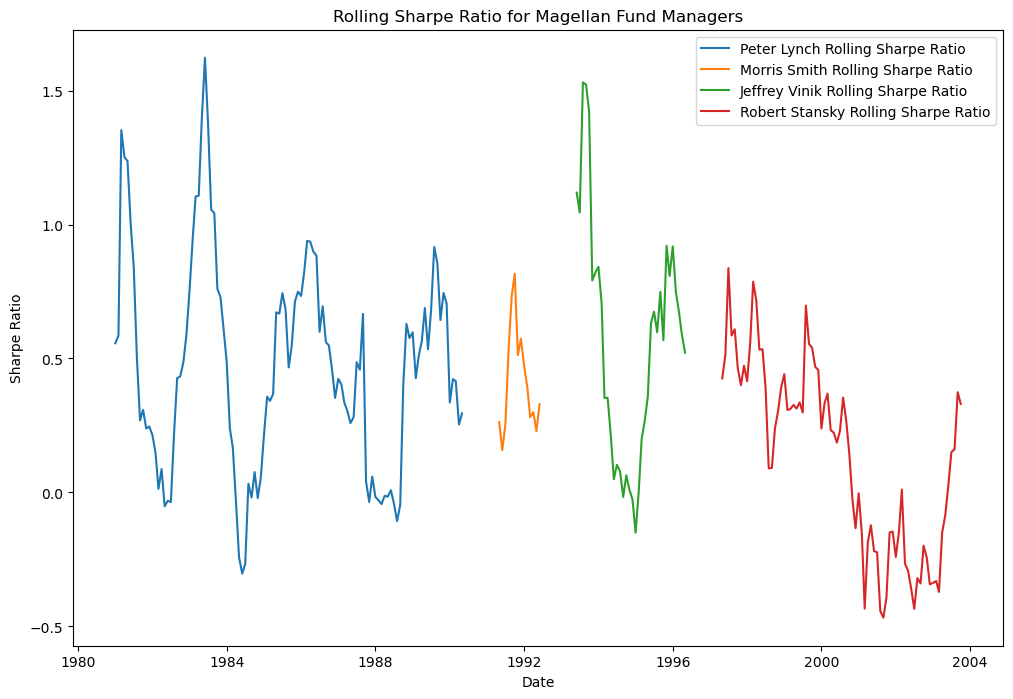

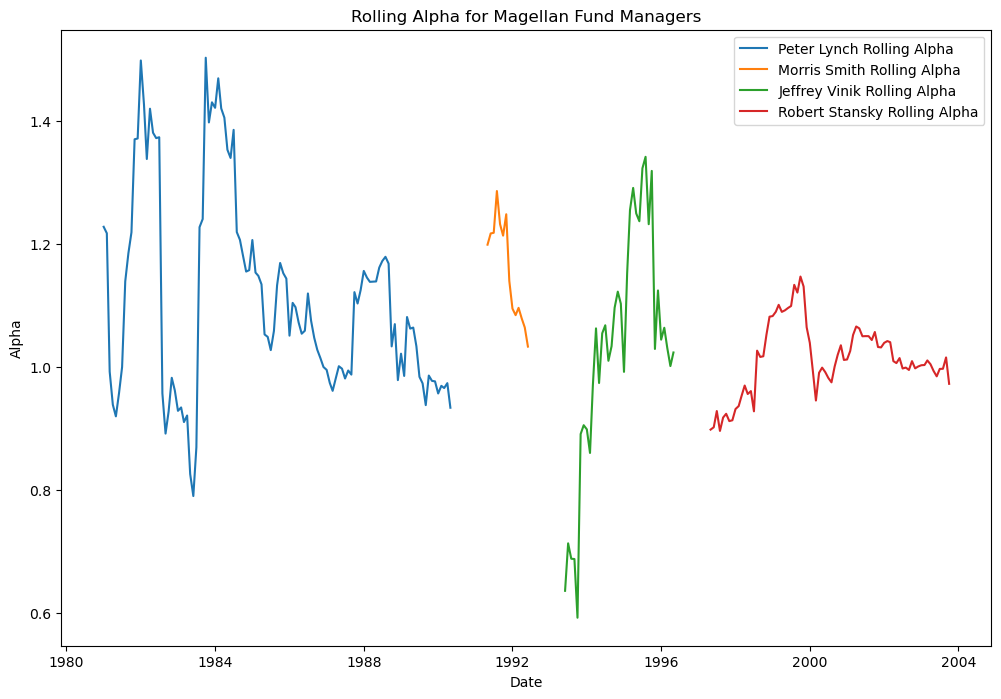

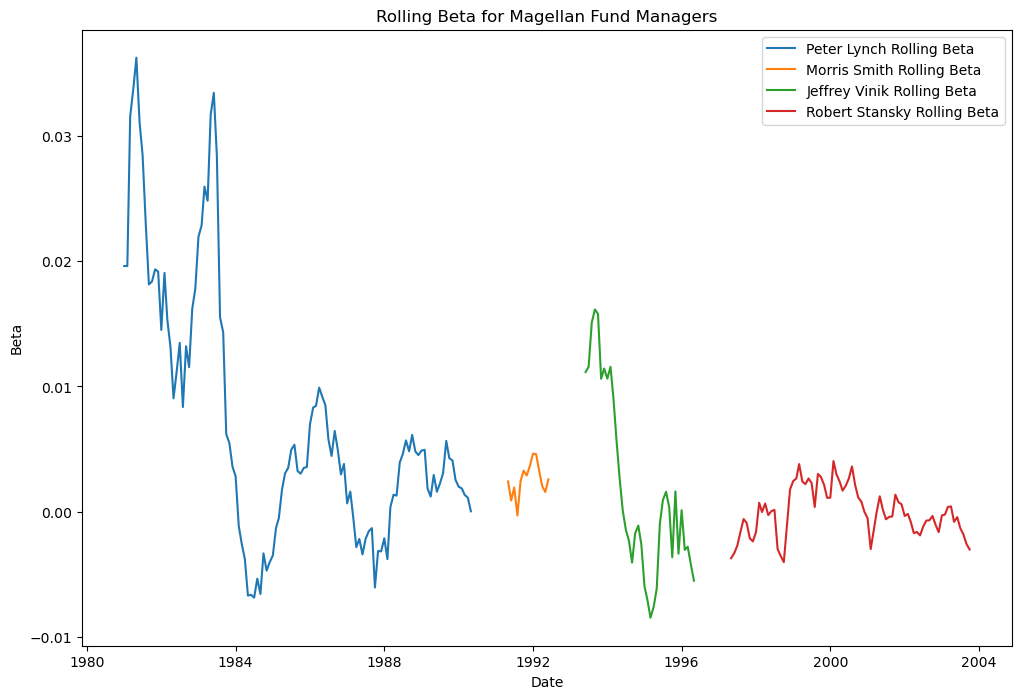

In [53]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt

# Define manager periods as per previous code
manager_periods = {
    'Peter Lynch': ('1980-02-01', '1990-05-01'),
    'Morris Smith': ('1990-06-01', '1992-06-01'),
    'Jeffrey Vinik': ('1992-07-01', '1996-05-01'),
    'Robert Stansky': ('1996-06-01', '2003-10-01')
}

# Dictionary to store rolling data
rolling_sharpe_data = {}
rolling_alpha_data = {}
rolling_beta_data = {}
rolling_return_data = {}

for manager, period in manager_periods.items():
    start, end = period
    returns = fmagx_df.loc[start:end, 'return']
    benchmark = gacs_df['Core3'].loc[start:end]
    
    # Calculate rolling Sharpe ratio with a 12-month rolling window
    rolling_sharpe = (returns.rolling(window=12).mean() / returns.rolling(window=12).std()).dropna()
    rolling_sharpe_data[manager] = rolling_sharpe

    # Calculate rolling alpha and beta with a 12-month rolling window
    rolling_alpha, rolling_beta = rolling_alpha_beta(returns, benchmark, window=12)
    rolling_alpha_data[manager] = rolling_alpha
    rolling_beta_data[manager] = rolling_beta
    
    # Calculate rolling returns with a 12-month rolling window
    rolling_return = returns.rolling(window=12).mean().dropna()
    rolling_return_data[manager] = rolling_return

# Plot Rolling Returns
plt.figure(figsize=(12, 8))
for manager, rolling_return in rolling_return_data.items():
    plt.plot(rolling_return, label=f"{manager} Rolling Return")
plt.title("Rolling Returns for Magellan Fund Managers")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend()
plt.show()

# Plot Rolling Sharpe Ratios
plt.figure(figsize=(12, 8))
for manager, sharpe in rolling_sharpe_data.items():
    plt.plot(sharpe, label=f"{manager} Rolling Sharpe Ratio")
plt.title("Rolling Sharpe Ratio for Magellan Fund Managers")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.legend()
plt.show()

# Plot Rolling Alpha
plt.figure(figsize=(12, 8))
for manager, alpha in rolling_alpha_data.items():
    plt.plot(alpha, label=f"{manager} Rolling Alpha")
plt.title("Rolling Alpha for Magellan Fund Managers")
plt.xlabel("Date")
plt.ylabel("Alpha")
plt.legend()
plt.show()

# Plot Rolling Beta
plt.figure(figsize=(12, 8))
for manager, beta in rolling_beta_data.items():
    plt.plot(beta, label=f"{manager} Rolling Beta")
plt.title("Rolling Beta for Magellan Fund Managers")
plt.xlabel("Date")
plt.ylabel("Beta")
plt.legend()
plt.show()


In [56]:
print("FMagX Dates:")
print(fmagx_df.index)
print("\nBenchmark Dates:")
print(benchmark_returns.index)


FMagX Dates:
DatetimeIndex(['1980-02-01', '1980-03-01', '1980-04-01', '1980-05-01',
               '1980-06-01', '1980-07-01', '1980-08-01', '1980-09-01',
               '1980-10-01', '1980-11-01',
               ...
               '2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01'],
              dtype='datetime64[ns]', name='date', length=285, freq=None)

Benchmark Dates:
DatetimeIndex(['2003-10-01', '2003-09-01', '2003-08-01', '2003-07-01',
               '2003-06-01', '2003-05-01', '2003-04-01', '2003-03-01',
               '2003-02-01', '2003-01-01',
               ...
               '1980-10-01', '1980-09-01', '1980-08-01', '1980-07-01',
               '1980-06-01', '1980-05-01', '1980-04-01', '1980-03-01',
               '1980-02-01', '1980-01-01'],
              dtype='datetime64[ns]', name='date', length=286, freq=None)


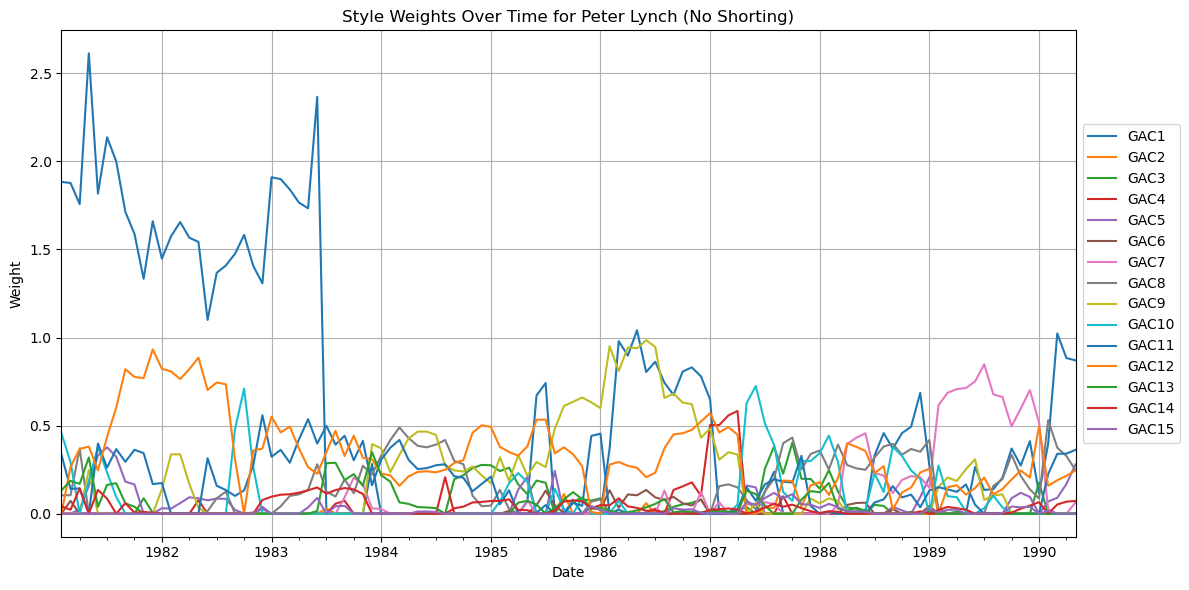

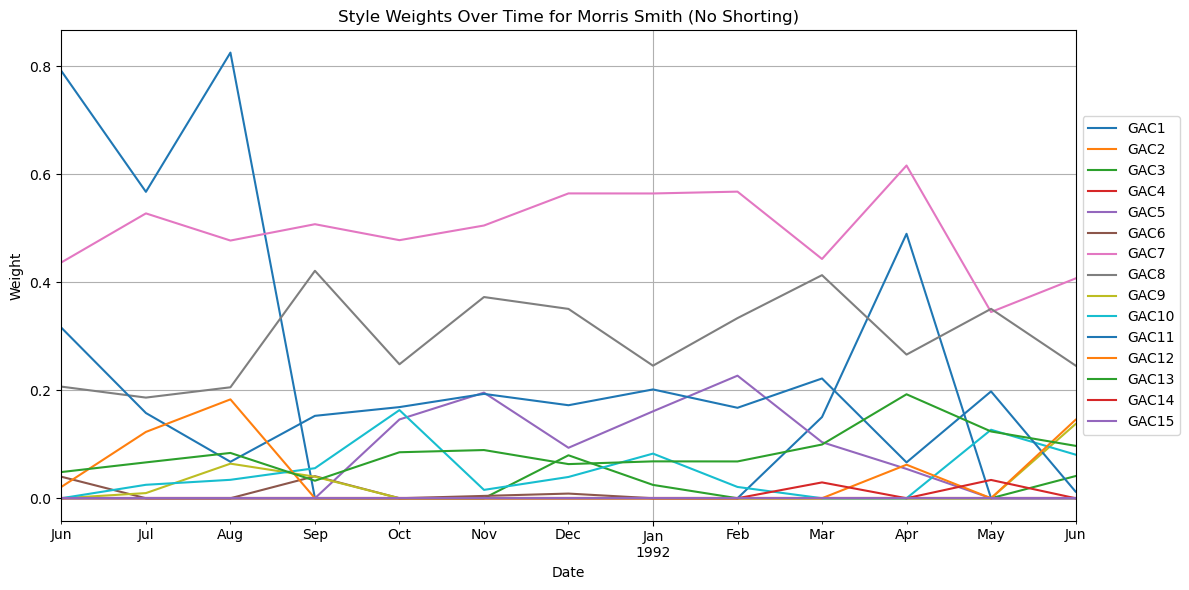

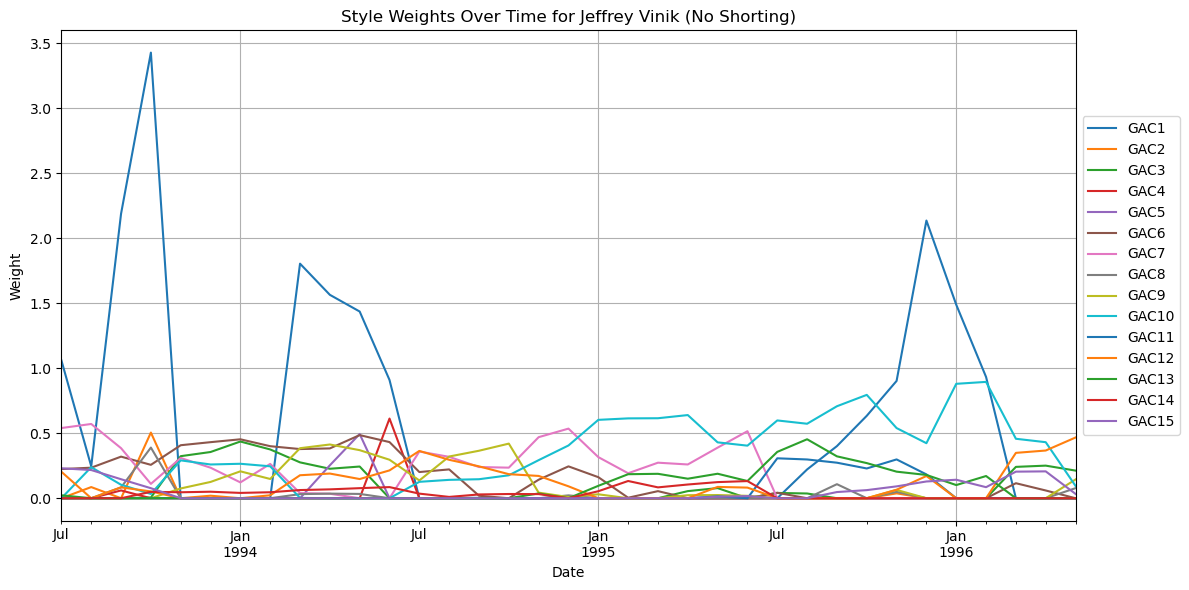

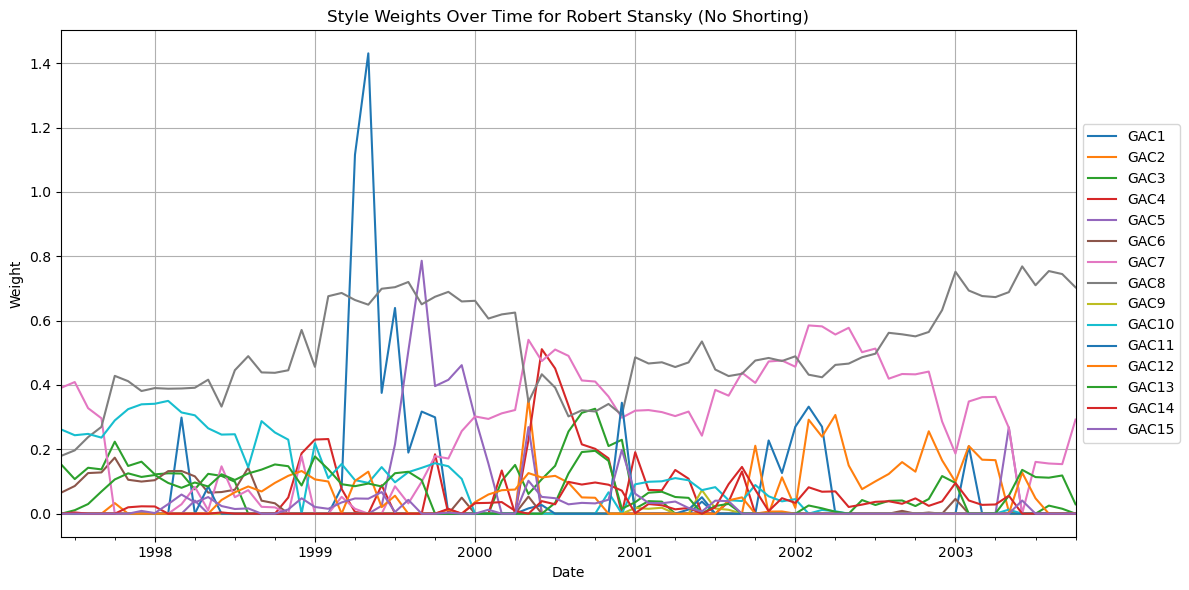

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import nnls  # Non-negative least squares

# Load cleaned data
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col='date', parse_dates=True)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Sort indices to ensure date-based slicing works
fmagx_df = fmagx_df.sort_index()
gacs_df = gacs_df.sort_index()

# Convert returns to numeric to handle any invalid values
fmagx_df['return'] = pd.to_numeric(fmagx_df['return'], errors='coerce')
for i in range(1, 16):
    gacs_df[f'Gac {i}'] = pd.to_numeric(gacs_df[f'Gac {i}'], errors='coerce')

# Define the periods for each manager
manager_periods = {
    'Peter Lynch': ('1977-05', '1990-05'),
    'Morris Smith': ('1990-06', '1992-06'),
    'Jeffrey Vinik': ('1992-07', '1996-05'),
    'Robert Stansky': ('1996-06', '2003-10')
}

# Set window size (e.g., 12 months for rolling analysis)
window_size = 12

# Initialize a dictionary to store weights
manager_weights = {}

for manager, (start, end) in manager_periods.items():
    # Filter data for each manager's period
    magellan_returns = fmagx_df[start:end]
    gac_returns = gacs_df[start:end].dropna()  # Ensure no NaNs for regression
    
    # Align dates between the two
    data = magellan_returns.join(gac_returns, how='inner')
    
    # Prepare results storage for rolling weights
    rolling_weights = pd.DataFrame(index=data.index, columns=[f'GAC{i}' for i in range(1, 16)])
    
    # Rolling regression for each window
    for i in range(window_size, len(data)):
        # Define the window of returns data
        window_data = data.iloc[i - window_size:i]
        y = window_data['return'].values  # Dependent variable as a numpy array
        X = window_data[[f'Gac {j}' for j in range(1, 16)]].values  # Independent variables as numpy array
        
        # Constrain regression to non-negative weights using nnls (non-negative least squares)
        weights, _ = nnls(X, y)
        
        # Store the non-negative weights
        rolling_weights.iloc[i] = weights
    
    # Store rolling weights in the dictionary for each manager
    manager_weights[manager] = rolling_weights.dropna()

# Plot the weights for each manager to visualize style changes
for manager, weights_df in manager_weights.items():
    weights_df.plot(figsize=(12, 6), title=f'Style Weights Over Time for {manager} (No Shorting)')
    plt.xlabel("Date")
    plt.ylabel("Weight")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Weights of each GAC style for each manager:
        Peter Lynch  Morris Smith  Jeffrey Vinik  Robert Stansky
Gac 1      1.134255      0.475726       0.000000        0.000000
Gac 2      0.000000      0.000000       0.125269        0.000000
Gac 3      0.072251      0.000000       0.000000        0.000000
Gac 4      0.000000      0.000000       0.167832        0.000000
Gac 5      0.000000      0.000000       0.000000        0.000000
Gac 6      0.000000      0.000000       0.133269        0.001168
Gac 7      0.000000      0.411459       0.069382        0.316580
Gac 8      0.231706      0.333533       0.000000        0.491329
Gac 9      0.251903      0.041738       0.387831        0.000000
Gac 10     0.000000      0.031260       0.134760        0.120717
Gac 11     0.065911      0.064493       0.000000        0.000000
Gac 12     0.468036      0.170221       0.204965        0.000000
Gac 13     0.021226      0.061105       0.095788        0.058332
Gac 14     0.035636      0.000000       0.0464

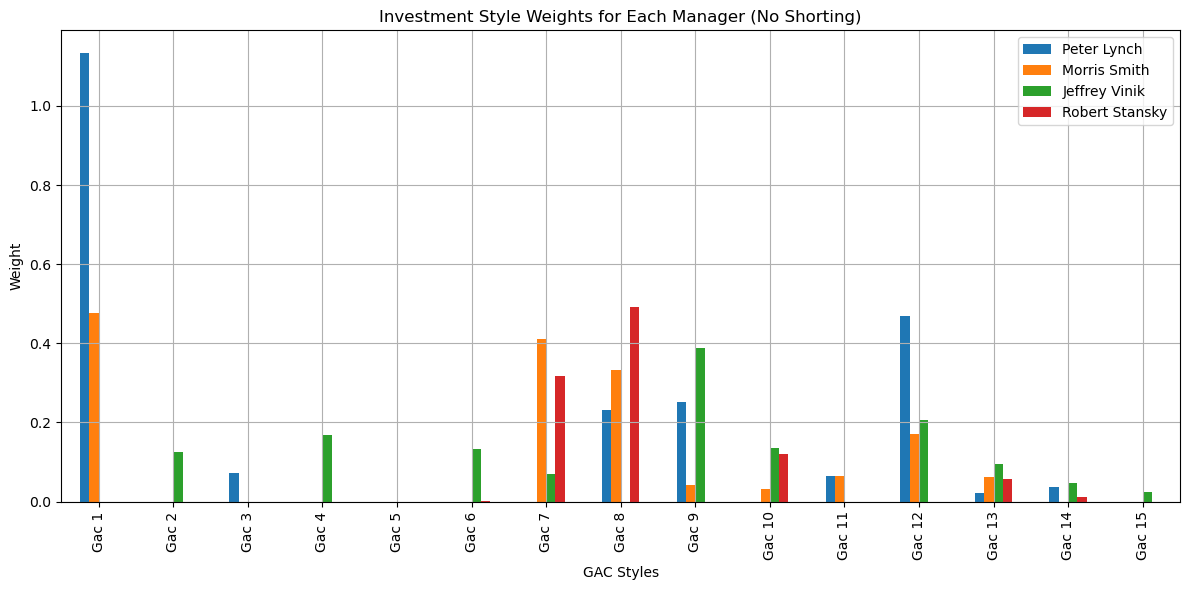

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import nnls  # Non-negative least squares

# Load cleaned data
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col='date', parse_dates=True)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Sort indices to ensure date-based slicing works
fmagx_df = fmagx_df.sort_index()
gacs_df = gacs_df.sort_index()

# Convert returns to numeric to handle any invalid values
fmagx_df['return'] = pd.to_numeric(fmagx_df['return'], errors='coerce')
for i in range(1, 16):
    gacs_df[f'Gac {i}'] = pd.to_numeric(gacs_df[f'Gac {i}'], errors='coerce')

# Define the periods for each manager
manager_periods = {
    'Peter Lynch': ('1977-05', '1990-05'),
    'Morris Smith': ('1990-06', '1992-06'),
    'Jeffrey Vinik': ('1992-07', '1996-05'),
    'Robert Stansky': ('1996-06', '2003-10')
}

# Initialize a dictionary to store weights
manager_weights = {}

for manager, (start, end) in manager_periods.items():
    # Filter data for each manager's period
    magellan_returns = fmagx_df[start:end]
    gac_returns = gacs_df[start:end].dropna()  # Ensure no NaNs for regression
    
    # Align dates between the two
    data = magellan_returns.join(gac_returns, how='inner')
    
    # Prepare the dependent variable (y) and independent variables (X)
    y = data['return'].values  # Dependent variable as a numpy array
    X = data[[f'Gac {j}' for j in range(1, 16)]].values  # Independent variables as numpy array
    
    # Constrain regression to non-negative weights using nnls (non-negative least squares)
    weights, _ = nnls(X, y)
    
    # Store the non-negative weights in the dictionary for each manager
    manager_weights[manager] = weights

# Convert manager_weights to a DataFrame for easier plotting
weights_df = pd.DataFrame(manager_weights, index=[f'Gac {i}' for i in range(1, 16)])

# Calculate percentages
weights_percentage_df = weights_df.div(weights_df.sum(axis=0), axis=1) * 100

# Print weights and percentages
print("Weights of each GAC style for each manager:")
print(weights_df)
print("\nPercentages of each GAC style for each manager:")
print(weights_percentage_df)

# Plot the weights for each manager to visualize their styles
weights_df.plot(kind='bar', figsize=(12, 6), title='Investment Style Weights for Each Manager (No Shorting)')
plt.xlabel("GAC Styles")
plt.ylabel("Weight")
plt.grid(True)
plt.tight_layout()
plt.show()


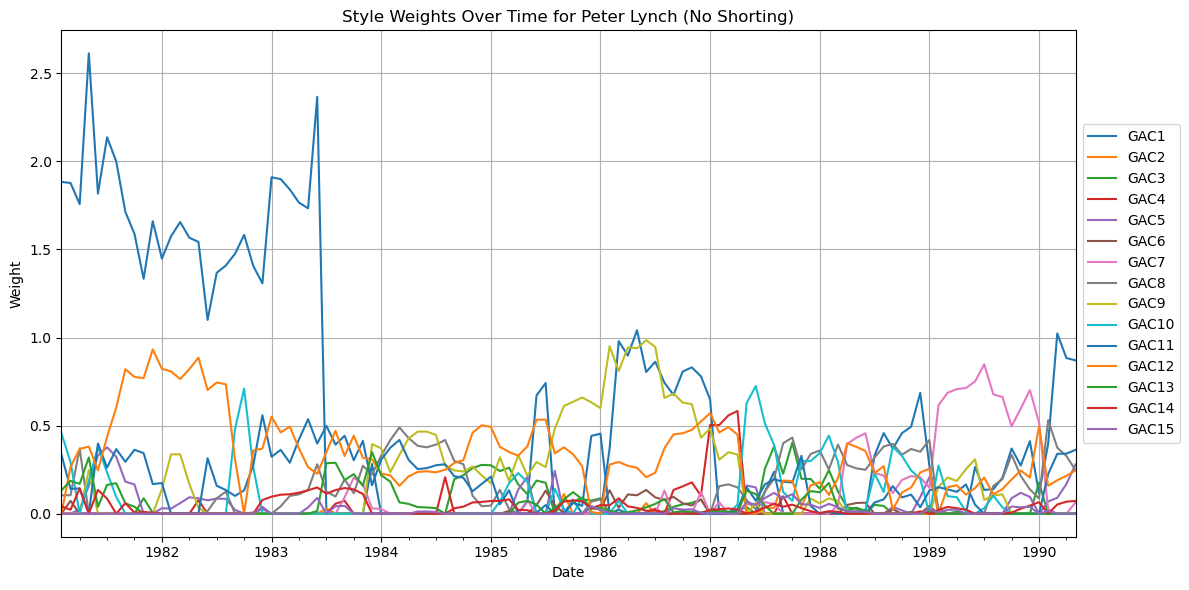

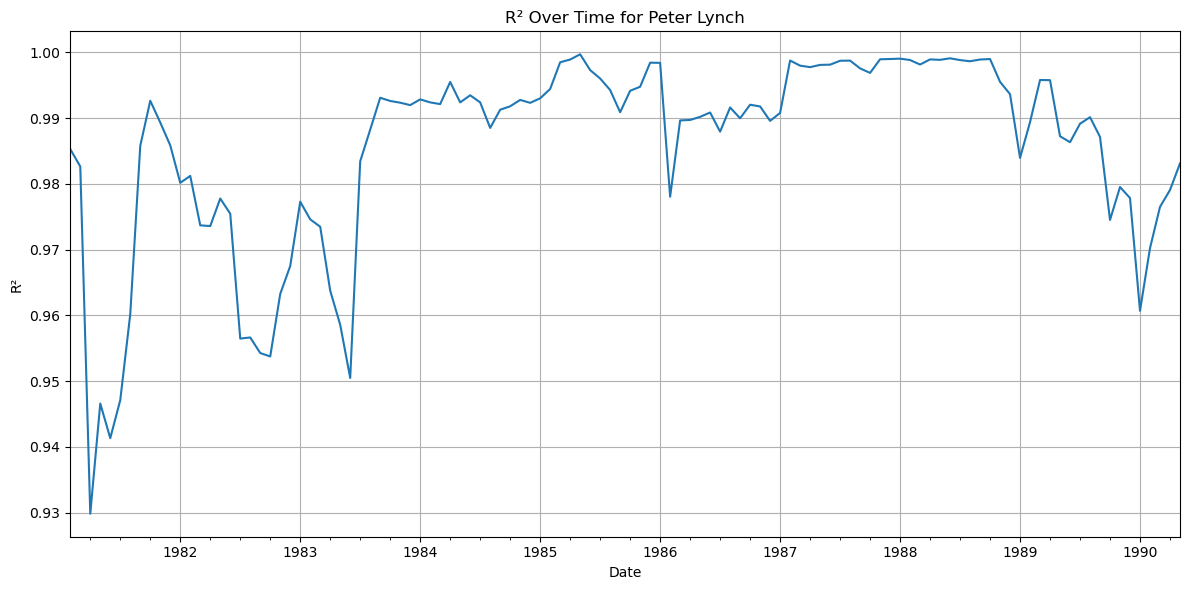

Final Weights for Peter Lynch:
                GAC1 GAC2 GAC3 GAC4      GAC5 GAC6      GAC7      GAC8 GAC9  \
date                                                                          
1990-05-01  0.870482  0.0  0.0  0.0  0.280093  0.0  0.064537  0.246344  0.0   

           GAC10     GAC11     GAC12 GAC13     GAC14 GAC15  
date                                                        
1990-05-01   0.0  0.362625  0.246082   0.0  0.072475   0.0  
Final R² for Peter Lynch:
date
1990-05-01    0.9831
Name: R2, dtype: float64


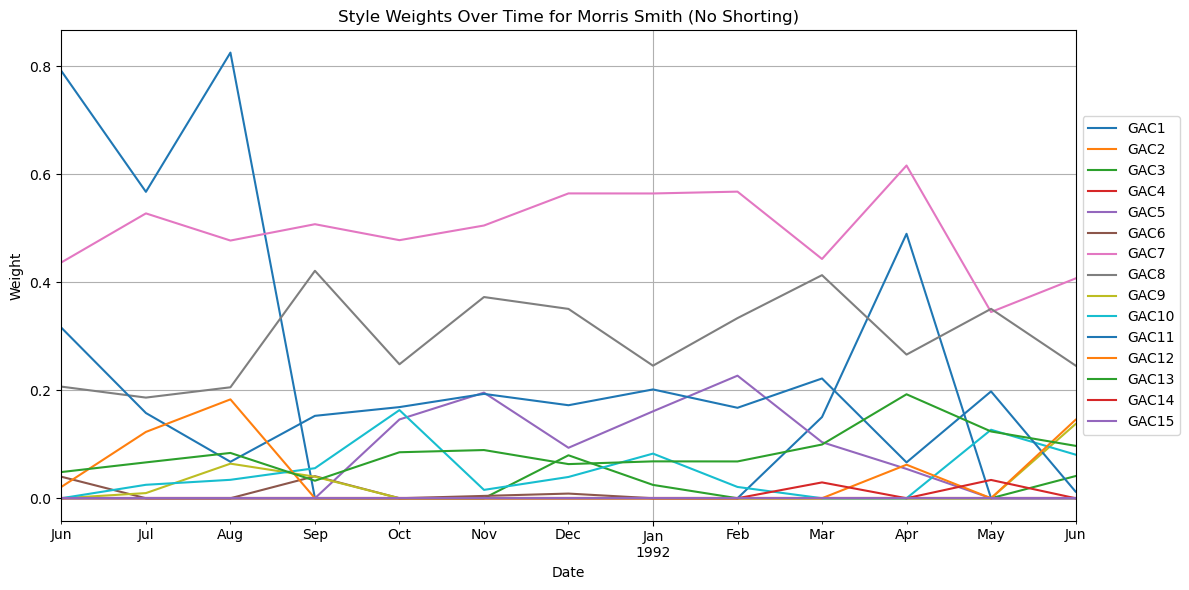

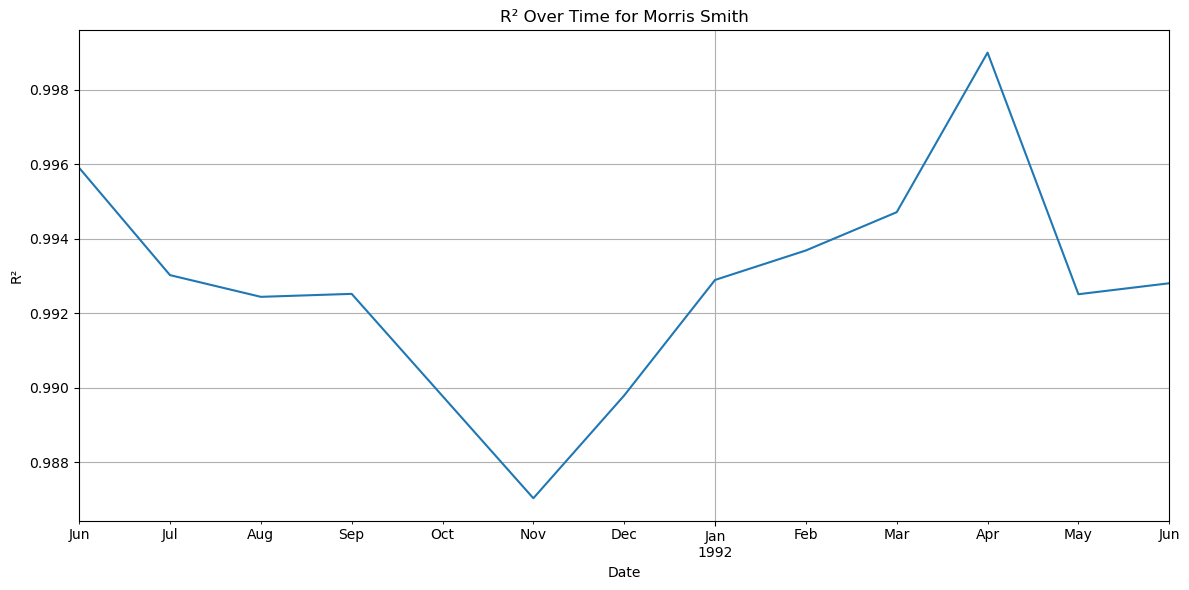

Final Weights for Morris Smith:
           GAC1 GAC2      GAC3 GAC4 GAC5 GAC6      GAC7      GAC8     GAC9  \
date                                                                         
1992-06-01  0.0  0.0  0.041064  0.0  0.0  0.0  0.407116  0.245783  0.13743   

               GAC10     GAC11     GAC12     GAC13 GAC14 GAC15  
date                                                            
1992-06-01  0.080763  0.012305  0.145297  0.097056   0.0   0.0  
Final R² for Morris Smith:
date
1992-06-01    0.992803
Name: R2, dtype: float64


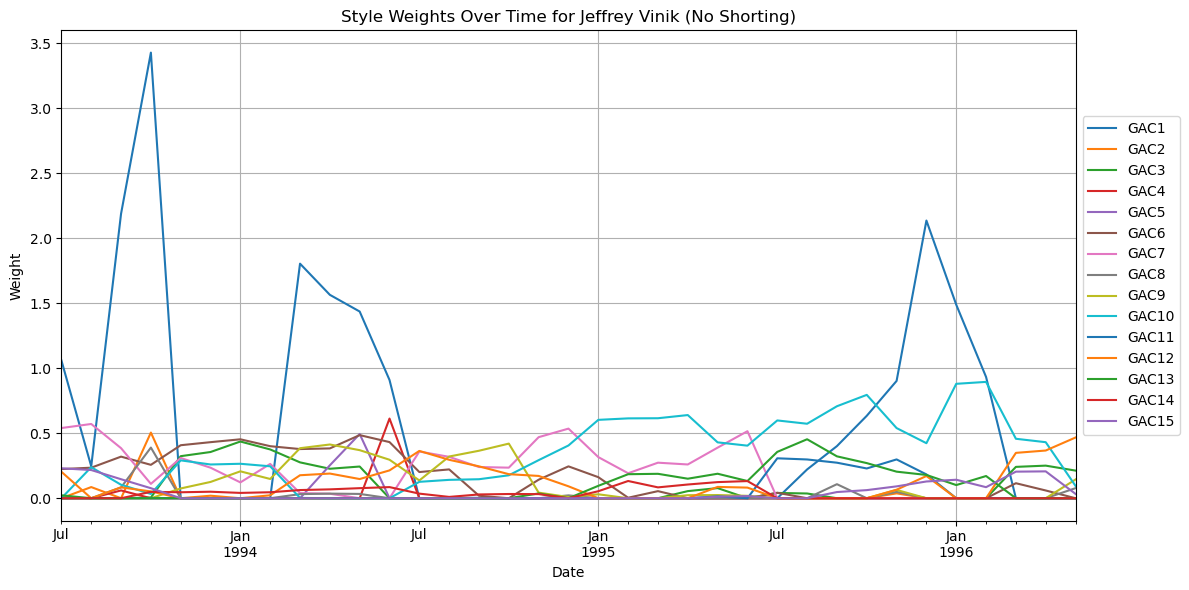

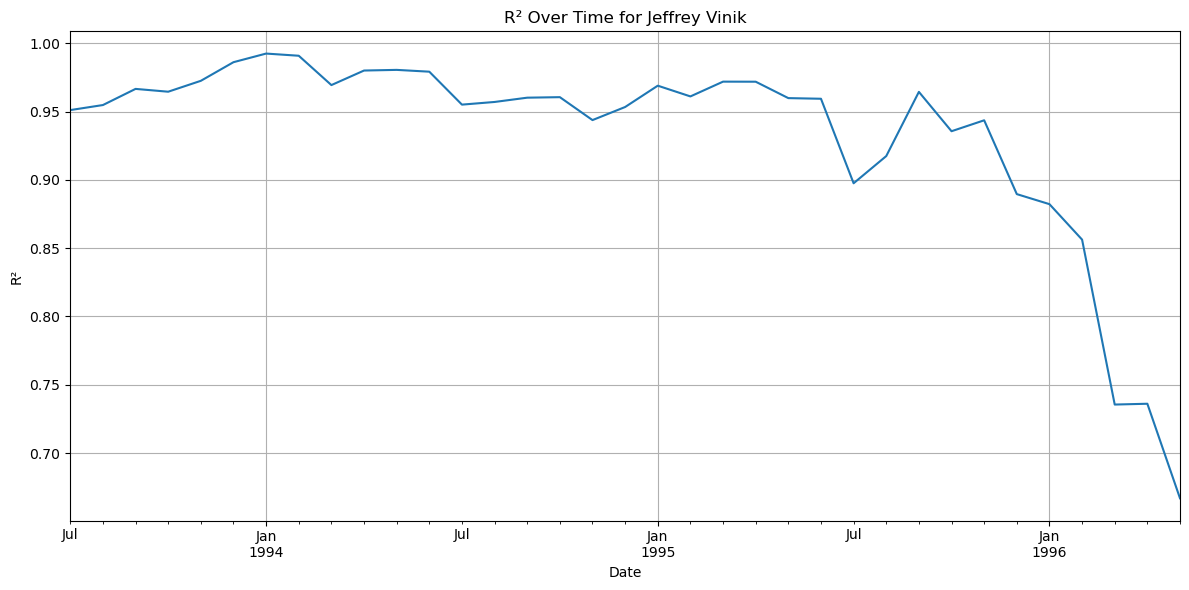

Final Weights for Jeffrey Vinik:
           GAC1 GAC2      GAC3 GAC4 GAC5 GAC6 GAC7      GAC8      GAC9  \
date                                                                     
1996-05-01  0.0  0.0  0.212672  0.0  0.0  0.0  0.0  0.077596  0.144429   

               GAC10 GAC11     GAC12 GAC13 GAC14     GAC15  
date                                                        
1996-05-01  0.094678   0.0  0.467354   0.0   0.0  0.033276  
Final R² for Jeffrey Vinik:
date
1996-05-01    0.666872
Name: R2, dtype: float64


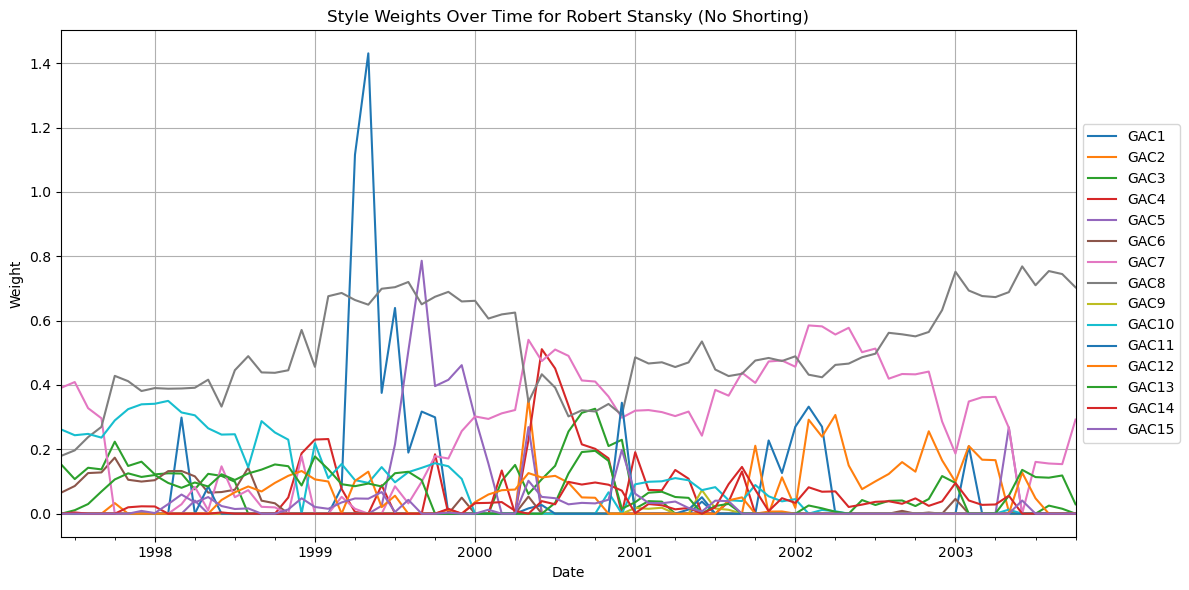

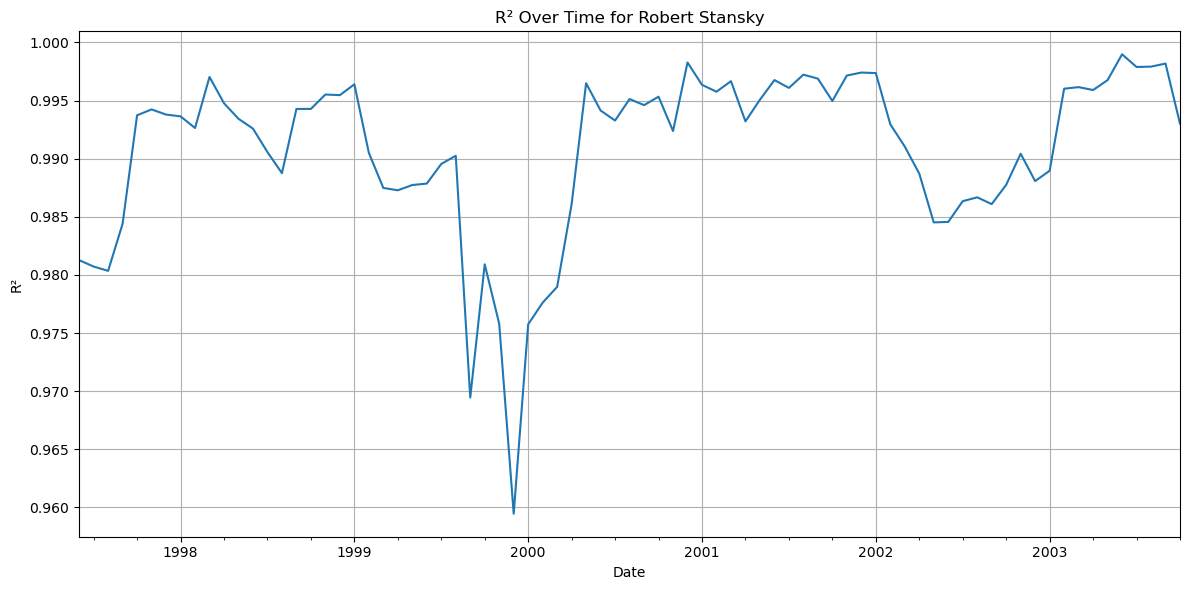

Final Weights for Robert Stansky:
           GAC1 GAC2 GAC3 GAC4 GAC5 GAC6      GAC7     GAC8 GAC9 GAC10 GAC11  \
date                                                                           
2003-10-01  0.0  0.0  0.0  0.0  0.0  0.0  0.292441  0.70336  0.0   0.0   0.0   

           GAC12     GAC13 GAC14 GAC15  
date                                    
2003-10-01   0.0  0.029238   0.0   0.0  
Final R² for Robert Stansky:
date
2003-10-01    0.993012
Name: R2, dtype: float64


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import nnls  # Non-negative least squares

# Load cleaned data
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col='date', parse_dates=True)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Sort indices to ensure date-based slicing works
fmagx_df = fmagx_df.sort_index()
gacs_df = gacs_df.sort_index()

# Convert returns to numeric to handle any invalid values
fmagx_df['return'] = pd.to_numeric(fmagx_df['return'], errors='coerce')
for i in range(1, 16):
    gacs_df[f'Gac {i}'] = pd.to_numeric(gacs_df[f'Gac {i}'], errors='coerce')

# Define the periods for each manager
manager_periods = {
    'Peter Lynch': ('1977-05', '1990-05'),
    'Morris Smith': ('1990-06', '1992-06'),
    'Jeffrey Vinik': ('1992-07', '1996-05'),
    'Robert Stansky': ('1996-06', '2003-10')
}

# Set window size (e.g., 12 months for rolling analysis)
window_size = 12

# Initialize a dictionary to store results
manager_results = {}

for manager, (start, end) in manager_periods.items():
    # Filter data for each manager's period
    magellan_returns = fmagx_df[start:end]
    gac_returns = gacs_df[start:end].dropna()  # Ensure no NaNs for regression
    
    # Align dates between the two
    data = magellan_returns.join(gac_returns, how='inner')
    
    # Prepare results storage for rolling weights and R²
    rolling_weights = pd.DataFrame(index=data.index, columns=[f'GAC{i}' for i in range(1, 16)])
    rolling_r2 = pd.Series(index=data.index, name='R2')
    
    # Rolling regression for each window
    for i in range(window_size, len(data)):
        # Define the window of returns data
        window_data = data.iloc[i - window_size:i]
        y = window_data['return'].values  # Dependent variable as a numpy array
        X = window_data[[f'Gac {j}' for j in range(1, 16)]].values  # Independent variables as numpy array
        
        # Constrain regression to non-negative weights using nnls (non-negative least squares)
        weights, _ = nnls(X, y)
        rolling_weights.iloc[i] = weights
        
        # Calculate R² (explanatory power)
        residuals = y - np.dot(X, weights)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r2 = 1 - (ss_res / ss_tot)
        rolling_r2.iloc[i] = r2
    
    # Store results for the manager
    manager_results[manager] = {
        'weights': rolling_weights.dropna(),
        'R2': rolling_r2.dropna()
    }

# Plot the rolling weights for each manager to visualize style changes
for manager, results in manager_results.items():
    weights_df = results['weights']
    r2_series = results['R2']
    
    # Plot style weights
    weights_df.plot(figsize=(12, 6), title=f'Style Weights Over Time for {manager} (No Shorting)')
    plt.xlabel("Date")
    plt.ylabel("Weight")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot R² to assess how much of the return is explained by the style factors
    r2_series.plot(figsize=(12, 6), title=f'R² Over Time for {manager}')
    plt.xlabel("Date")
    plt.ylabel("R²")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print out final weights and R²
    print(f"Final Weights for {manager}:")
    print(weights_df.tail(1))
    print(f"Final R² for {manager}:")
    print(r2_series.tail(1))

# Optionally, you can calculate the percentage of each weight as shown in previous steps


Results for Peter Lynch:
  Style Weights: [2.45184234e-18 4.38802292e-18 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.29257571e-20 1.17738952e-01 1.53370190e-01
 1.25182974e-01 1.88573676e-01 1.58963067e-01 2.01521457e-01
 4.76560372e-02 6.99364574e-03 3.18895117e-18]
  Alpha (Selection Return): 0.008282429018254395
  R²: 0.9213305916870073
  t-Statistic for Alpha: 6.818364209649279
--------------------------------------------------
Results for Morris Smith:
  Style Weights: [1.58632336e-18 2.08367555e-03 3.09957522e-03 0.00000000e+00
 0.00000000e+00 1.23935098e-02 1.44890269e-01 1.60499695e-01
 1.35767162e-01 1.50365136e-01 1.44190684e-01 1.55960459e-01
 9.07498341e-02 0.00000000e+00 6.61718895e-18]
  Alpha (Selection Return): 0.0018696355213866235
  R²: 0.96833770500328
  t-Statistic for Alpha: 1.0914169763579014
--------------------------------------------------
Results for Jeffrey Vinik:
  Style Weights: [0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666

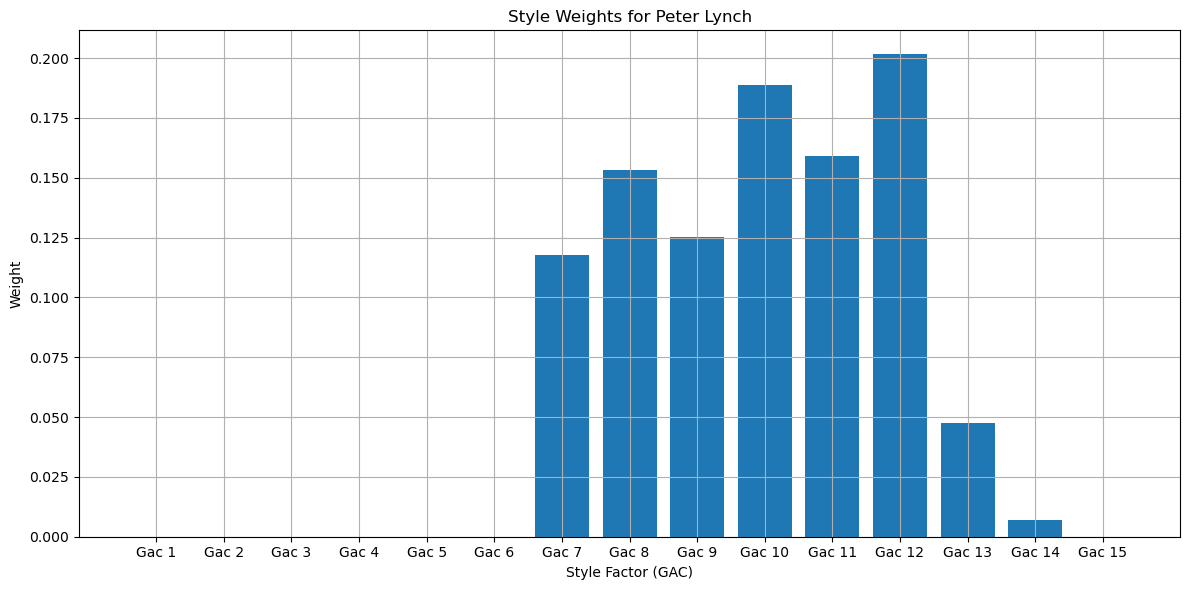

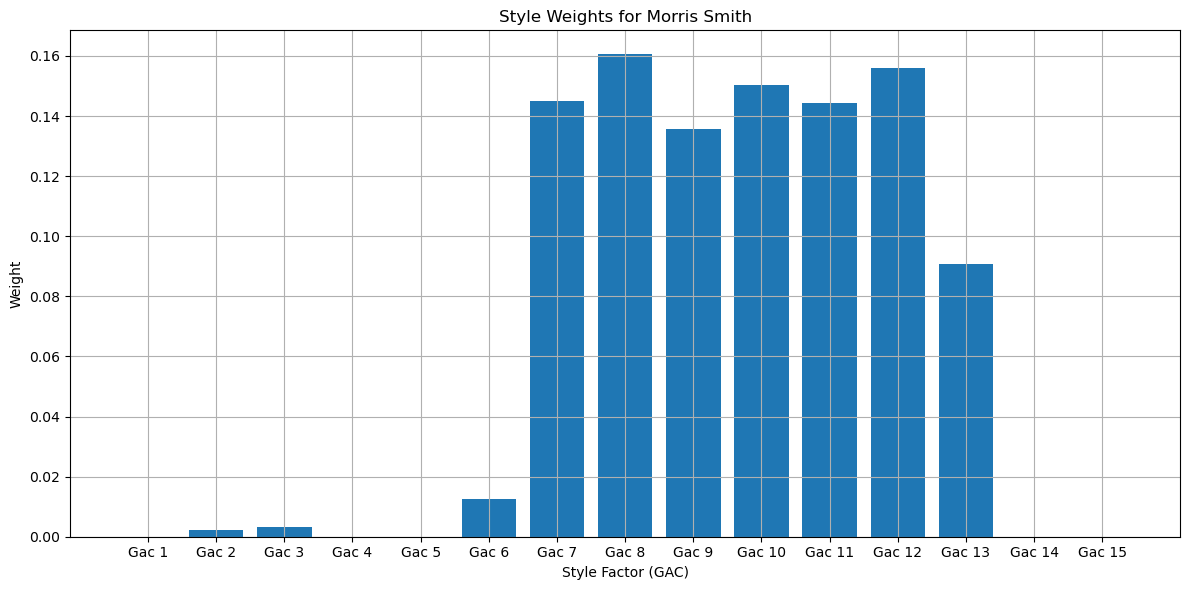

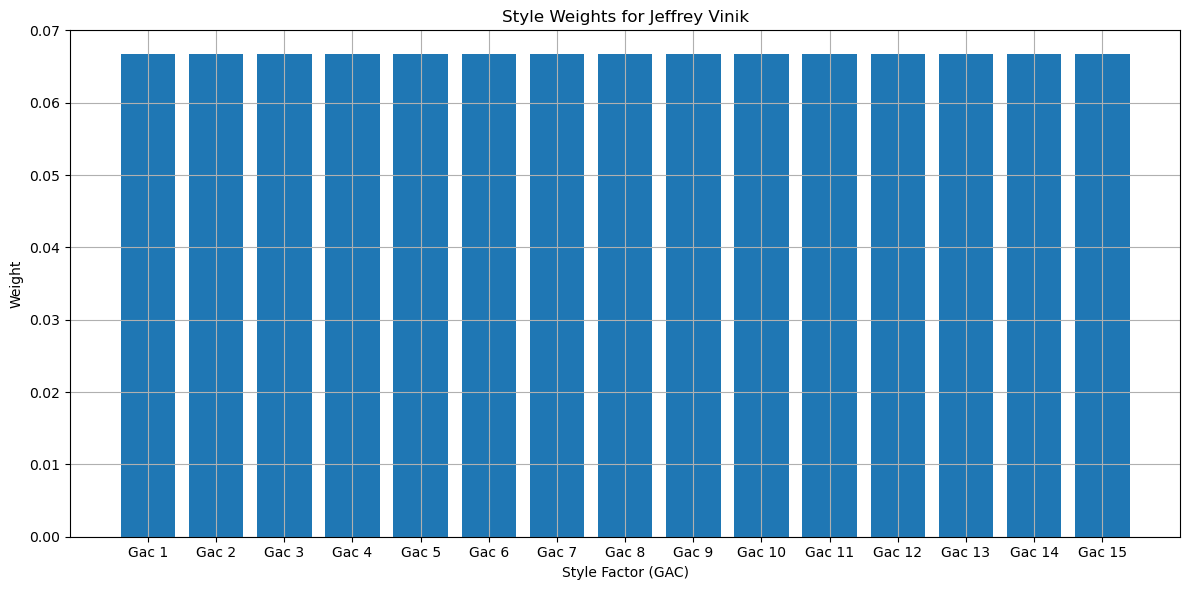

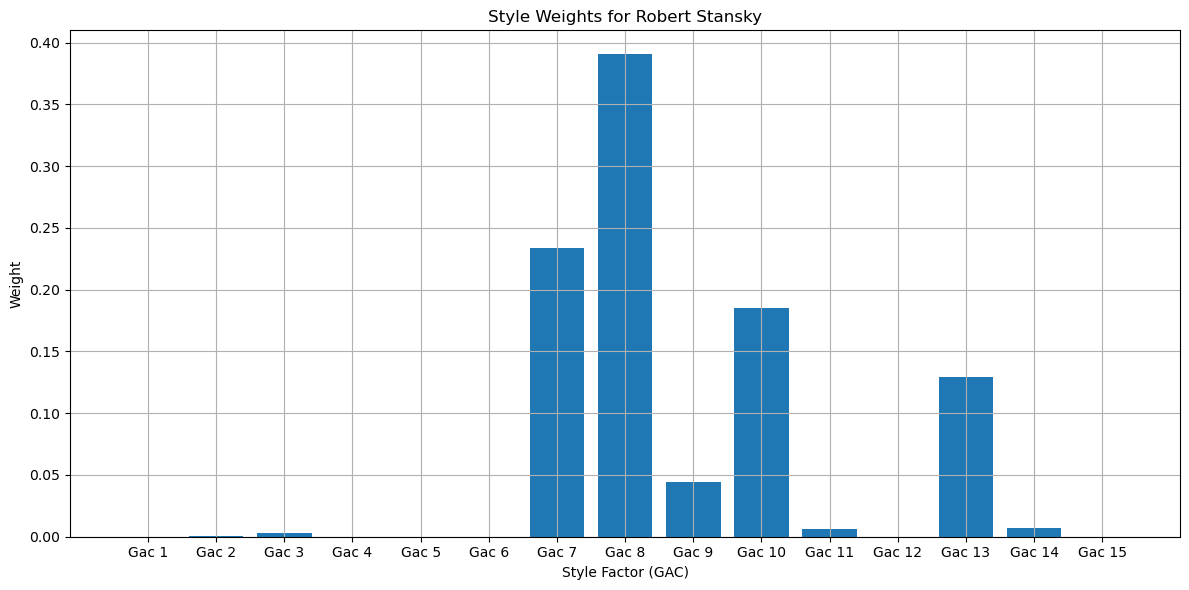

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load cleaned data
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col='date', parse_dates=True)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Sort indices to ensure date-based slicing works
fmagx_df = fmagx_df.sort_index()
gacs_df = gacs_df.sort_index()

# Convert returns to numeric to handle any invalid values
fmagx_df['return'] = pd.to_numeric(fmagx_df['return'], errors='coerce')
for i in range(1, 16):
    gacs_df[f'Gac {i}'] = pd.to_numeric(gacs_df[f'Gac {i}'], errors='coerce')

# Define the periods for each manager
manager_periods = {
    'Peter Lynch': ('1977-05', '1990-05'),
    'Morris Smith': ('1990-06', '1992-06'),
    'Jeffrey Vinik': ('1992-07', '1996-05'),
    'Robert Stansky': ('1996-06', '2003-10')
}

# Set window size (e.g., 12 months for rolling analysis)
window_size = 12

# Initialize a dictionary to store results
manager_results = {}

for manager, (start, end) in manager_periods.items():
    # Filter data for each manager's period
    magellan_returns = fmagx_df[start:end]
    gac_returns = gacs_df[start:end].dropna()  # Ensure no NaNs for regression
    
    # Align dates between the two
    data = magellan_returns.join(gac_returns, how='inner')
    
    # Prepare the dependent variable (fund returns) and independent variables (style factors)
    y = data['return'].values  # Fund returns (dependent variable)
    X = data[[f'Gac {j}' for j in range(1, 16)]].values  # Style factors (independent variables)
    
    # Number of style factors (assets) K
    K = X.shape[1]
    
    # Define the constraint matrix for the weights
    def constraint(weights):
        return np.sum(weights) - 1  # Weights should sum to 1
    
    # Define the objective function to minimize (tracking error variance)
    def objective(weights):
        # Calculate style return as the linear combination of style factors
        style_return = np.dot(X, weights)
        # Calculate tracking error (residual)
        tracking_error = y - style_return
        return np.var(tracking_error)  # Minimize the variance of the tracking error
    
    # Initial guess for the weights (uniform distribution)
    initial_guess = np.ones(K) / K
    
    # Constraints: sum of weights = 1, all weights >= 0
    constraints = ({'type': 'eq', 'fun': constraint})
    bounds = [(0, None)] * K  # Non-negative weights
    
    # Solve using minimize (quadratic programming)
    result = minimize(objective, initial_guess, bounds=bounds, constraints=constraints)
    
    # Optimal weights (style allocations)
    optimal_weights = result.x
    
    # Calculate style return (expected return based on optimal weights)
    style_return = np.dot(X, optimal_weights)
    
    # Calculate tracking error (selection return)
    tracking_error = y - style_return
    
    # Calculate alpha (mean of tracking error)
    alpha = np.mean(tracking_error)
    
    # Calculate R² (explanatory power of the style)
    ss_res = np.sum(tracking_error**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    # Calculate the t-statistic for alpha (historical appraisal ratio)
    t_statistic = alpha / (np.std(tracking_error) / np.sqrt(len(tracking_error)))
    
    # Store results for the manager
    manager_results[manager] = {
        'weights': optimal_weights,
        'tracking_error': tracking_error,
        'alpha': alpha,
        'r_squared': r_squared,
        't_statistic': t_statistic
    }

# Print out results for each manager
for manager, results in manager_results.items():
    print(f"Results for {manager}:")
    print(f"  Style Weights: {results['weights']}")
    print(f"  Alpha (Selection Return): {results['alpha']}")
    print(f"  R²: {results['r_squared']}")
    print(f"  t-Statistic for Alpha: {results['t_statistic']}")
    print("-" * 50)

# Plot the style weights for each manager
for manager, results in manager_results.items():
    plt.figure(figsize=(12, 6))
    plt.bar([f'Gac {i+1}' for i in range(len(results['weights']))], results['weights'])
    plt.title(f'Style Weights for {manager}')
    plt.xlabel('Style Factor (GAC)')
    plt.ylabel('Weight')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Performance Metrics for Each Manager:
                   Alpha        R²  t-Statistic  Style Weight Gac 1  \
Peter Lynch     0.008282  0.921331     6.818364        2.451842e-18   
Morris Smith    0.001870  0.968338     1.091417        1.586323e-18   
Jeffrey Vinik   0.003482  0.632281     1.385581        6.666667e-02   
Robert Stansky -0.001572  0.969671    -1.660820        0.000000e+00   

                Style Weight Gac 2  Style Weight Gac 3  Style Weight Gac 4  \
Peter Lynch           4.388023e-18            0.000000            0.000000   
Morris Smith          2.083676e-03            0.003100            0.000000   
Jeffrey Vinik         6.666667e-02            0.066667            0.066667   
Robert Stansky        7.128133e-04            0.003027            0.000000   

                Style Weight Gac 5  Style Weight Gac 6  Style Weight Gac 7  \
Peter Lynch               0.000000        7.292576e-20            0.117739   
Morris Smith              0.000000        1.239351e-02     

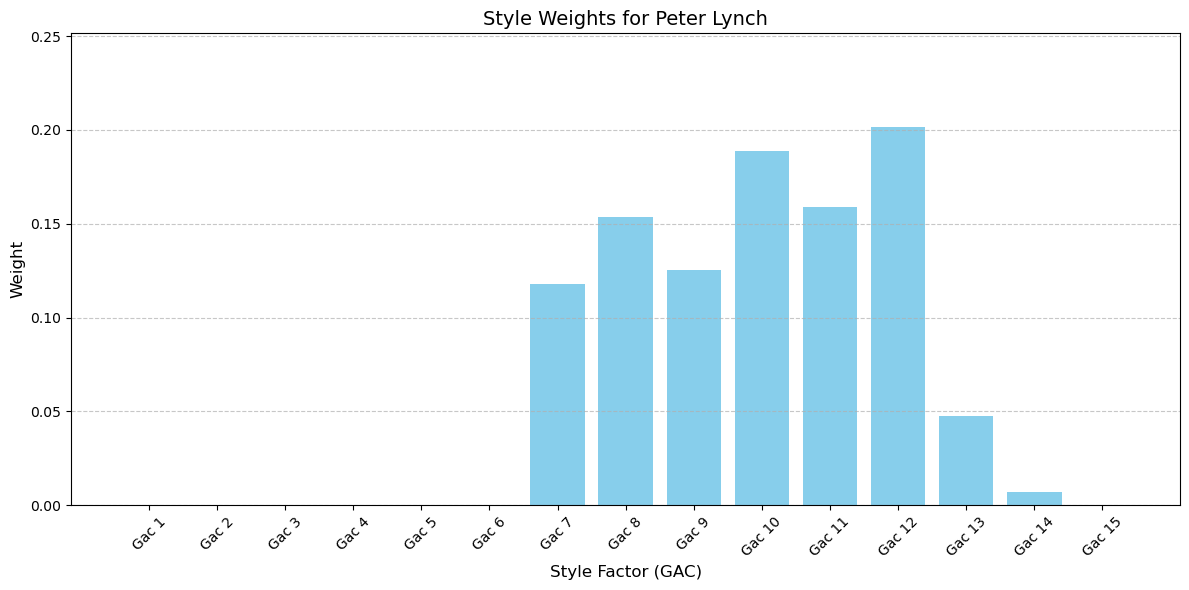

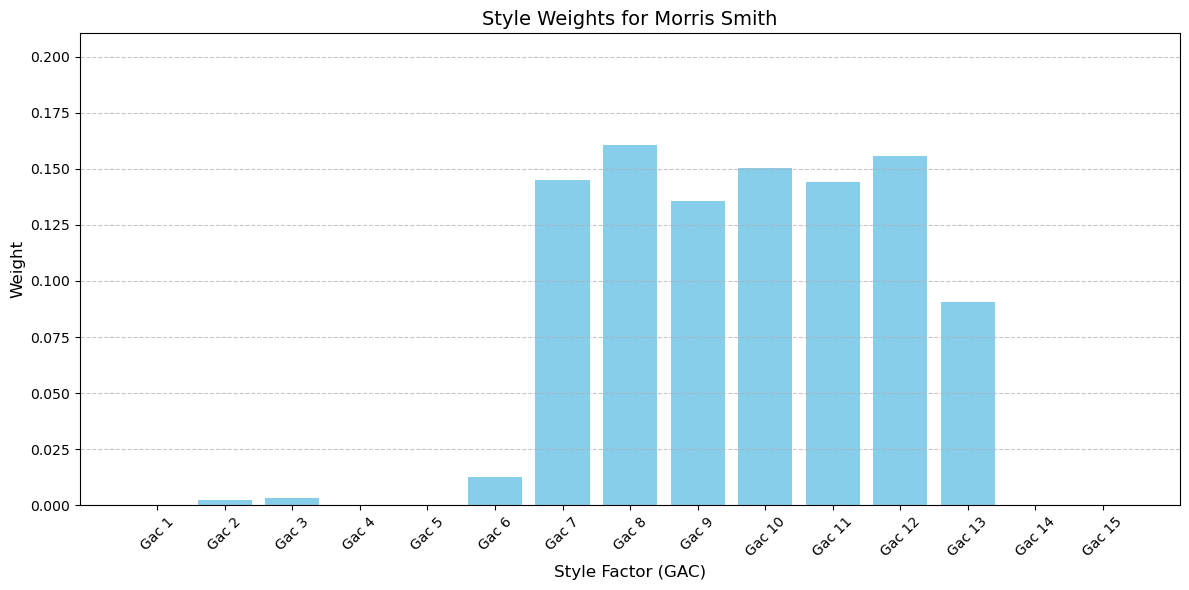

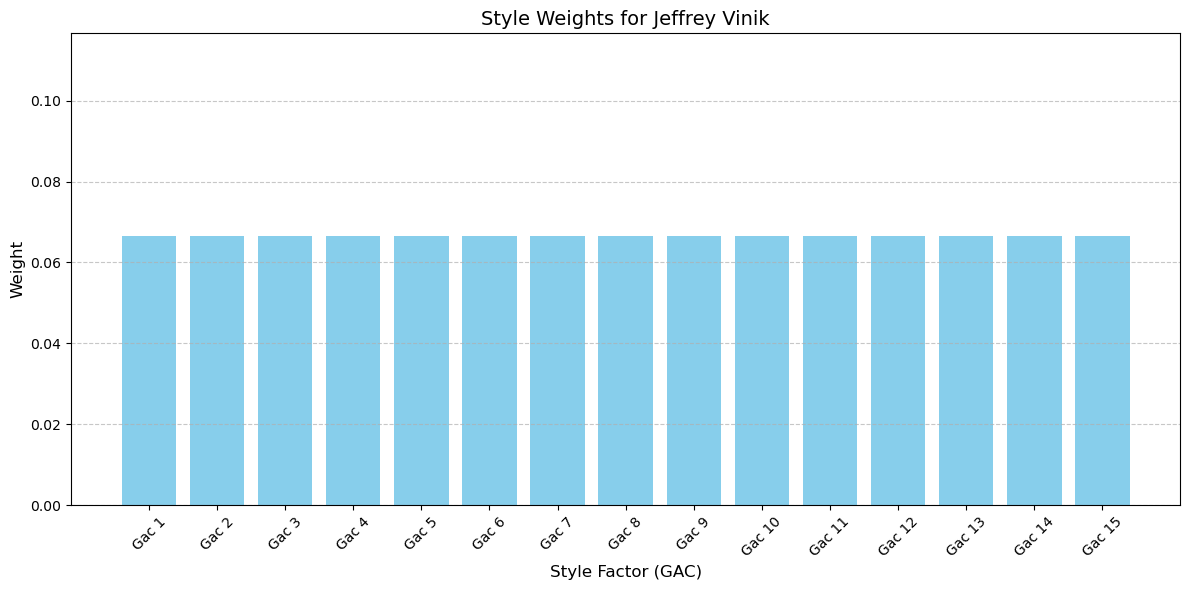

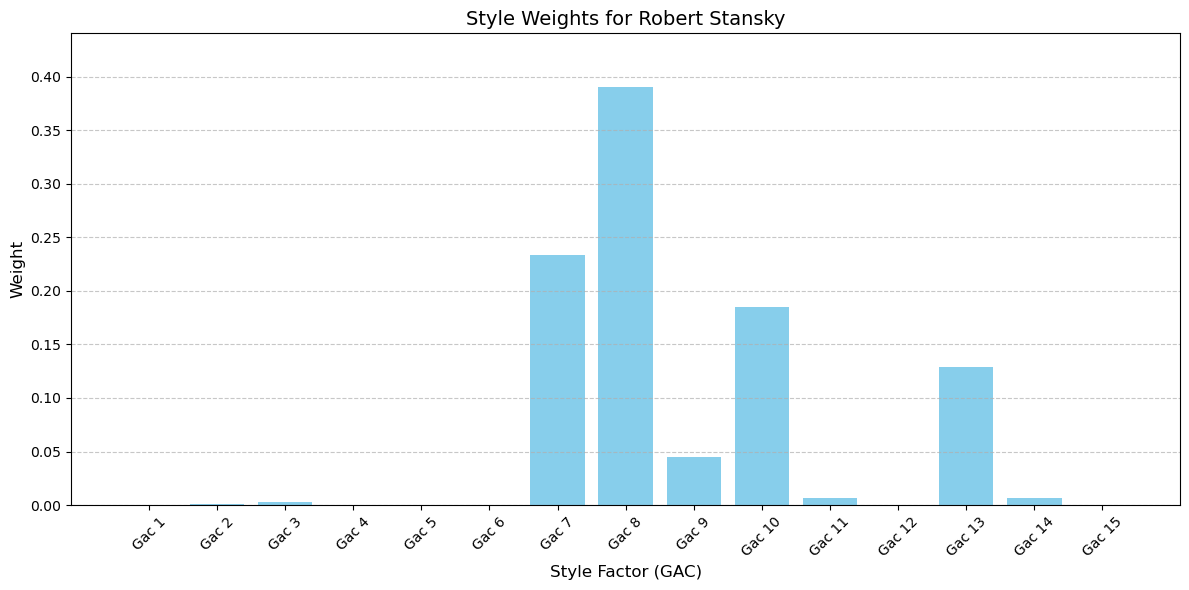

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load cleaned data
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col='date', parse_dates=True)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Sort indices to ensure date-based slicing works
fmagx_df = fmagx_df.sort_index()
gacs_df = gacs_df.sort_index()

# Convert returns to numeric to handle any invalid values
fmagx_df['return'] = pd.to_numeric(fmagx_df['return'], errors='coerce')
for i in range(1, 16):
    gacs_df[f'Gac {i}'] = pd.to_numeric(gacs_df[f'Gac {i}'], errors='coerce')

# Define the periods for each manager
manager_periods = {
    'Peter Lynch': ('1977-05', '1990-05'),
    'Morris Smith': ('1990-06', '1992-06'),
    'Jeffrey Vinik': ('1992-07', '1996-05'),
    'Robert Stansky': ('1996-06', '2003-10')
}

# Initialize a dictionary to store results
manager_results = {}

for manager, (start, end) in manager_periods.items():
    # Filter data for each manager's period
    magellan_returns = fmagx_df[start:end]
    gac_returns = gacs_df[start:end].dropna()  # Ensure no NaNs for regression
    
    # Align dates between the two
    data = magellan_returns.join(gac_returns, how='inner')
    
    # Prepare the dependent variable (fund returns) and independent variables (style factors)
    y = data['return'].values  # Fund returns (dependent variable)
    X = data[[f'Gac {j}' for j in range(1, 16)]].values  # Style factors (independent variables)
    
    # Number of style factors (assets) K
    K = X.shape[1]
    
    # Define the constraint matrix for the weights
    def constraint(weights):
        return np.sum(weights) - 1  # Weights should sum to 1
    
    # Define the objective function to minimize (tracking error variance)
    def objective(weights):
        # Calculate style return as the linear combination of style factors
        style_return = np.dot(X, weights)
        # Calculate tracking error (residual)
        tracking_error = y - style_return
        return np.var(tracking_error)  # Minimize the variance of the tracking error
    
    # Initial guess for the weights (uniform distribution)
    initial_guess = np.ones(K) / K
    
    # Constraints: sum of weights = 1, all weights >= 0
    constraints = ({'type': 'eq', 'fun': constraint})
    bounds = [(0, None)] * K  # Non-negative weights
    
    # Solve using minimize (quadratic programming)
    result = minimize(objective, initial_guess, bounds=bounds, constraints=constraints)
    
    # Optimal weights (style allocations)
    optimal_weights = result.x
    
    # Calculate style return (expected return based on optimal weights)
    style_return = np.dot(X, optimal_weights)
    
    # Calculate tracking error (selection return)
    tracking_error = y - style_return
    
    # Calculate alpha (mean of tracking error)
    alpha = np.mean(tracking_error)
    
    # Calculate R² (explanatory power of the style)
    ss_res = np.sum(tracking_error**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    # Calculate the t-statistic for alpha (historical appraisal ratio)
    t_statistic = alpha / (np.std(tracking_error) / np.sqrt(len(tracking_error)))
    
    # Store results for the manager
    manager_results[manager] = {
        'weights': optimal_weights,
        'tracking_error': tracking_error,
        'alpha': alpha,
        'r_squared': r_squared,
        't_statistic': t_statistic
    }

# Convert manager results to a DataFrame for better organization
results_df = pd.DataFrame()

# Extracting and organizing results
for manager, results in manager_results.items():
    results_df.loc[manager, 'Alpha'] = results['alpha']
    results_df.loc[manager, 'R²'] = results['r_squared']
    results_df.loc[manager, 't-Statistic'] = results['t_statistic']
    for i, weight in enumerate(results['weights']):
        results_df.loc[manager, f'Style Weight Gac {i + 1}'] = weight

# Display the results DataFrame
print("Performance Metrics for Each Manager:")
print(results_df)

# Plot the style weights for each manager
for manager, results in manager_results.items():
    plt.figure(figsize=(12, 6))
    plt.bar([f'Gac {i+1}' for i in range(len(results['weights']))], results['weights'], color='skyblue')
    plt.title(f'Style Weights for {manager}', fontsize=14)
    plt.xlabel('Style Factor (GAC)', fontsize=12)
    plt.ylabel('Weight', fontsize=12)
    plt.xticks(rotation=45)
    plt.ylim(0, max(results['weights']) + 0.05)  # Adjust y-limits for better visualization
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


Performance Metrics for Each Manager:
                   Alpha        R²  t-Statistic  Style Weight Gac 1  \
Peter Lynch     0.008282  0.921331     6.818364        2.451842e-18   
Morris Smith    0.001870  0.968338     1.091417        1.586323e-18   
Jeffrey Vinik   0.003482  0.632281     1.385581        6.666667e-02   
Robert Stansky -0.001572  0.969671    -1.660820        0.000000e+00   

                Style Weight Gac 2  Style Weight Gac 3  Style Weight Gac 4  \
Peter Lynch           4.388023e-18            0.000000            0.000000   
Morris Smith          2.083676e-03            0.003100            0.000000   
Jeffrey Vinik         6.666667e-02            0.066667            0.066667   
Robert Stansky        7.128133e-04            0.003027            0.000000   

                Style Weight Gac 5  Style Weight Gac 6  Style Weight Gac 7  \
Peter Lynch               0.000000        7.292576e-20            0.117739   
Morris Smith              0.000000        1.239351e-02     

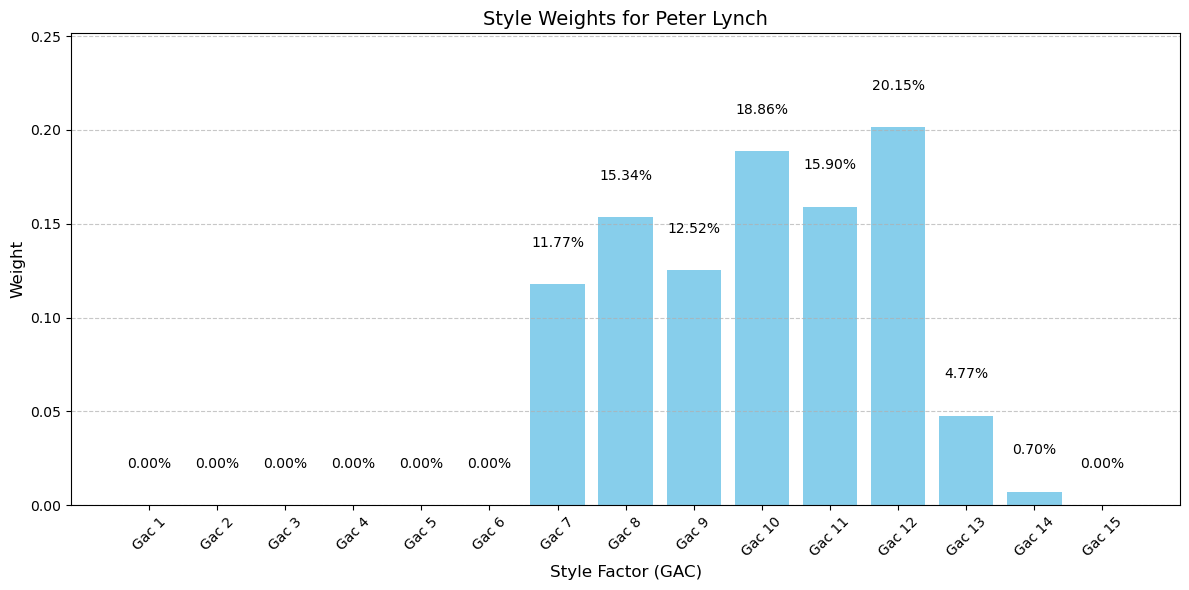

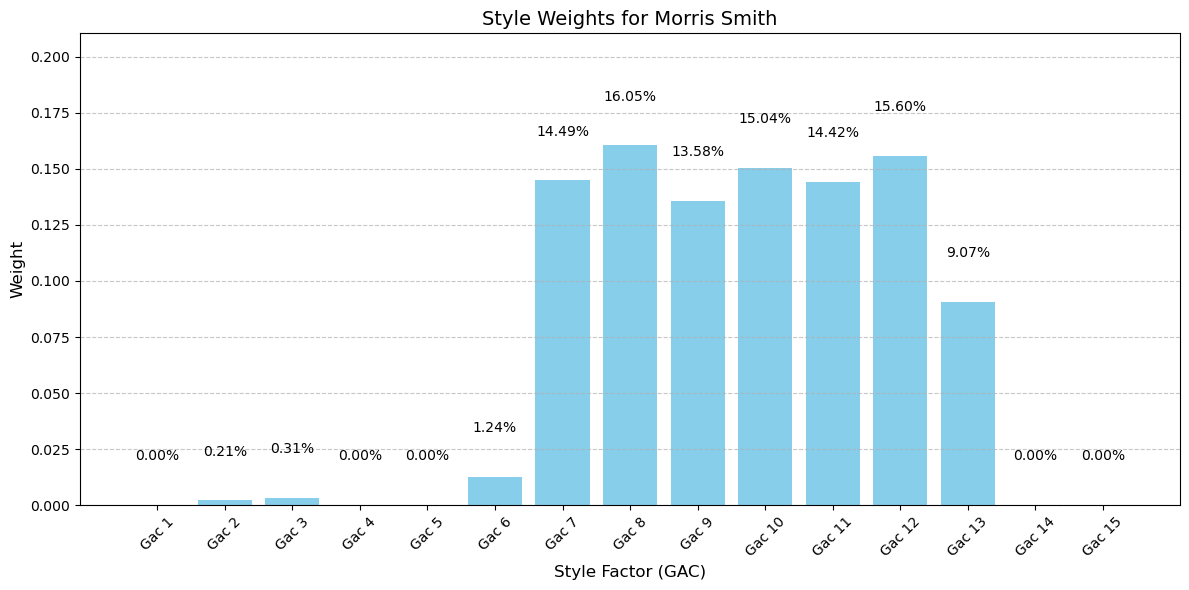

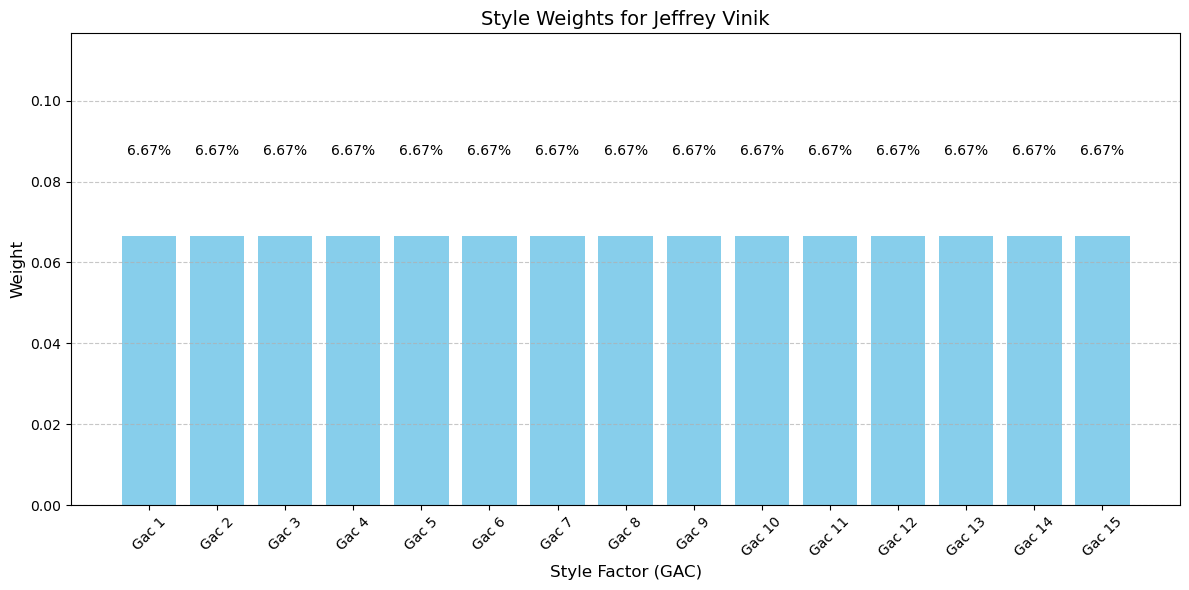

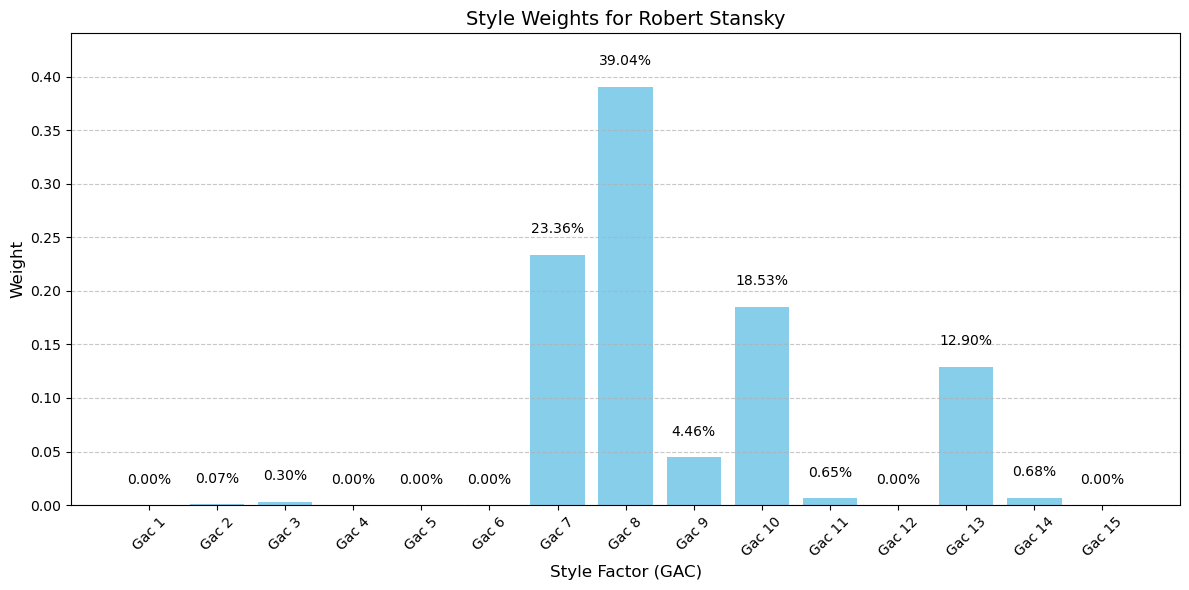

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load cleaned data
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col='date', parse_dates=True)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Sort indices to ensure date-based slicing works
fmagx_df = fmagx_df.sort_index()
gacs_df = gacs_df.sort_index()

# Convert returns to numeric to handle any invalid values
fmagx_df['return'] = pd.to_numeric(fmagx_df['return'], errors='coerce')
for i in range(1, 16):
    gacs_df[f'Gac {i}'] = pd.to_numeric(gacs_df[f'Gac {i}'], errors='coerce')

# Define the periods for each manager
manager_periods = {
    'Peter Lynch': ('1977-05', '1990-05'),
    'Morris Smith': ('1990-06', '1992-06'),
    'Jeffrey Vinik': ('1992-07', '1996-05'),
    'Robert Stansky': ('1996-06', '2003-10')
}

# Initialize a dictionary to store results
manager_results = {}

for manager, (start, end) in manager_periods.items():
    # Filter data for each manager's period
    magellan_returns = fmagx_df[start:end]
    gac_returns = gacs_df[start:end].dropna()  # Ensure no NaNs for regression
    
    # Align dates between the two
    data = magellan_returns.join(gac_returns, how='inner')
    
    # Prepare the dependent variable (fund returns) and independent variables (style factors)
    y = data['return'].values  # Fund returns (dependent variable)
    X = data[[f'Gac {j}' for j in range(1, 16)]].values  # Style factors (independent variables)
    
    # Number of style factors (assets) K
    K = X.shape[1]
    
    # Define the constraint matrix for the weights
    def constraint(weights):
        return np.sum(weights) - 1  # Weights should sum to 1
    
    # Define the objective function to minimize (tracking error variance)
    def objective(weights):
        # Calculate style return as the linear combination of style factors
        style_return = np.dot(X, weights)
        # Calculate tracking error (residual)
        tracking_error = y - style_return
        return np.var(tracking_error)  # Minimize the variance of the tracking error
    
    # Initial guess for the weights (uniform distribution)
    initial_guess = np.ones(K) / K
    
    # Constraints: sum of weights = 1, all weights >= 0
    constraints = ({'type': 'eq', 'fun': constraint})
    bounds = [(0, None)] * K  # Non-negative weights
    
    # Solve using minimize (quadratic programming)
    result = minimize(objective, initial_guess, bounds=bounds, constraints=constraints)
    
    # Optimal weights (style allocations)
    optimal_weights = result.x
    
    # Calculate style return (expected return based on optimal weights)
    style_return = np.dot(X, optimal_weights)
    
    # Calculate tracking error (selection return)
    tracking_error = y - style_return
    
    # Calculate alpha (mean of tracking error)
    alpha = np.mean(tracking_error)
    
    # Calculate R² (explanatory power of the style)
    ss_res = np.sum(tracking_error**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    # Calculate the t-statistic for alpha (historical appraisal ratio)
    t_statistic = alpha / (np.std(tracking_error) / np.sqrt(len(tracking_error)))
    
    # Store results for the manager
    manager_results[manager] = {
        'weights': optimal_weights,
        'tracking_error': tracking_error,
        'alpha': alpha,
        'r_squared': r_squared,
        't_statistic': t_statistic
    }

# Convert manager results to a DataFrame for better organization
results_df = pd.DataFrame()

# Extracting and organizing results
for manager, results in manager_results.items():
    results_df.loc[manager, 'Alpha'] = results['alpha']
    results_df.loc[manager, 'R²'] = results['r_squared']
    results_df.loc[manager, 't-Statistic'] = results['t_statistic']
    for i, weight in enumerate(results['weights']):
        results_df.loc[manager, f'Style Weight Gac {i + 1}'] = weight

# Display the results DataFrame
print("Performance Metrics for Each Manager:")
print(results_df)

# Plot the style weights for each manager with percentage labels
for manager, results in manager_results.items():
    plt.figure(figsize=(12, 6))
    plt.bar([f'Gac {i+1}' for i in range(len(results['weights']))], results['weights'], color='skyblue')
    
    # Add percentage labels on top of the bars
    for i, weight in enumerate(results['weights']):
        plt.text(i, weight + 0.02, f'{weight*100:.2f}%', ha='center', fontsize=10)
    
    plt.title(f'Style Weights for {manager}', fontsize=14)
    plt.xlabel('Style Factor (GAC)', fontsize=12)
    plt.ylabel('Weight', fontsize=12)
    plt.xticks(rotation=45)
    plt.ylim(0, max(results['weights']) + 0.05)  # Adjust y-limits for better visualization
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



Processing Peter Lynch
Period: 1977-05 to 1990-05
Fund returns (first 5): [ 0.00413993 -0.13495608  0.08320483  0.08715502  0.07826766]
Style factors (first 5 rows):
 [[ 1.18887237e-02 -4.67000008e-02 -7.76000023e-02 -6.93999976e-02
  -5.84000014e-02 -5.43714583e-02  6.80000009e-03  9.99999975e-05
  -3.64134420e-02 -2.98598433e-03 -3.92400242e-02 -9.95158934e-03
   1.36639997e-02 -2.63250005e-02  1.15890000e-01]
 [ 1.22698296e-02  8.79999995e-03  1.39999995e-03 -8.20000004e-03
  -8.39999970e-03 -6.18802844e-02 -1.05300002e-01 -9.17999968e-02
  -1.26482156e-01 -1.52787011e-01 -1.65336042e-01 -1.68614448e-01
  -1.41443998e-01 -5.98939992e-02 -4.98000000e-02]
 [ 8.89855592e-03  8.79999995e-02  1.42299995e-01  1.28900006e-01
   1.54300004e-01  9.39280924e-02  5.77000007e-02  2.92000007e-02
   8.16714386e-02  6.04148429e-02  7.88569480e-02  5.65926556e-02
   1.03127003e-01  8.44089985e-02 -1.76800000e-02]
 [ 7.03239639e-03  3.95999998e-02  4.60000001e-02  5.77999987e-02
   4.03999984e-02  

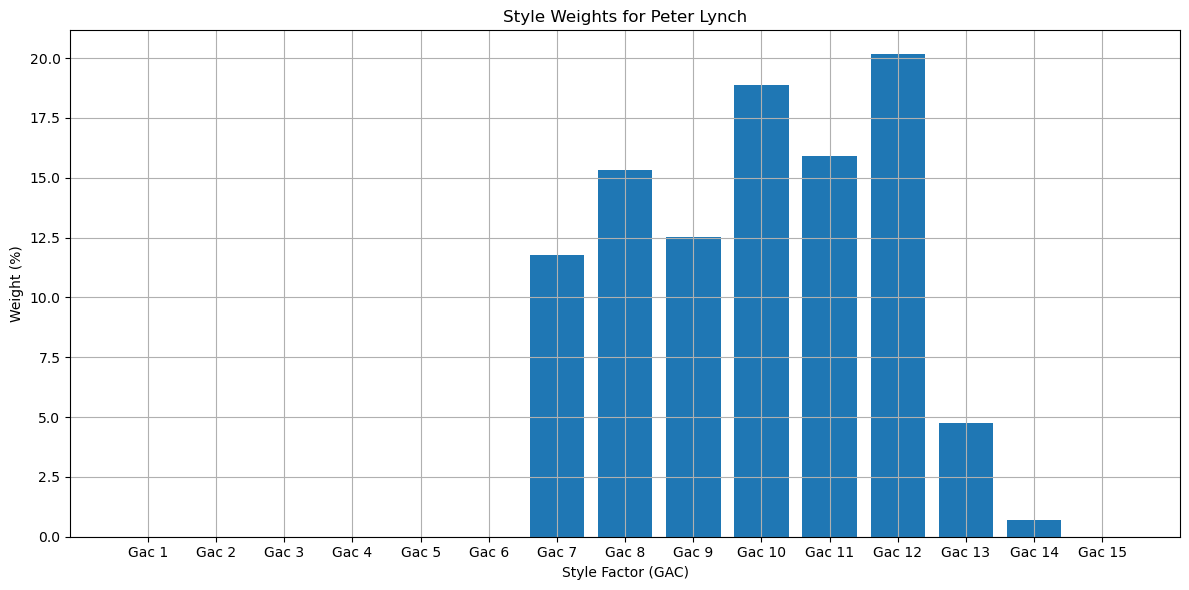

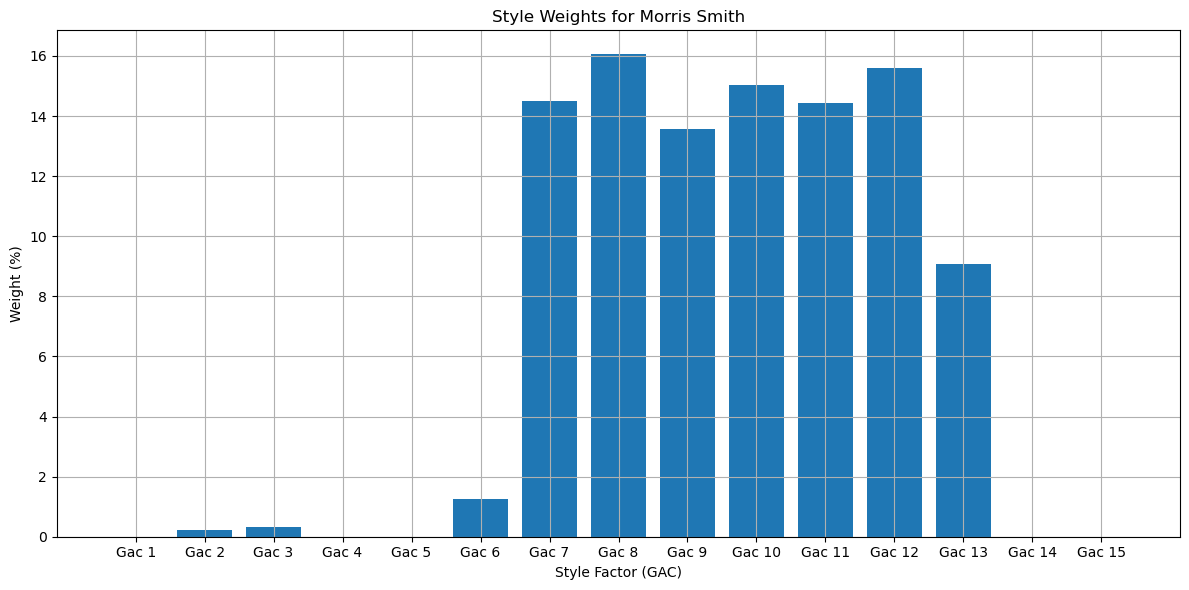

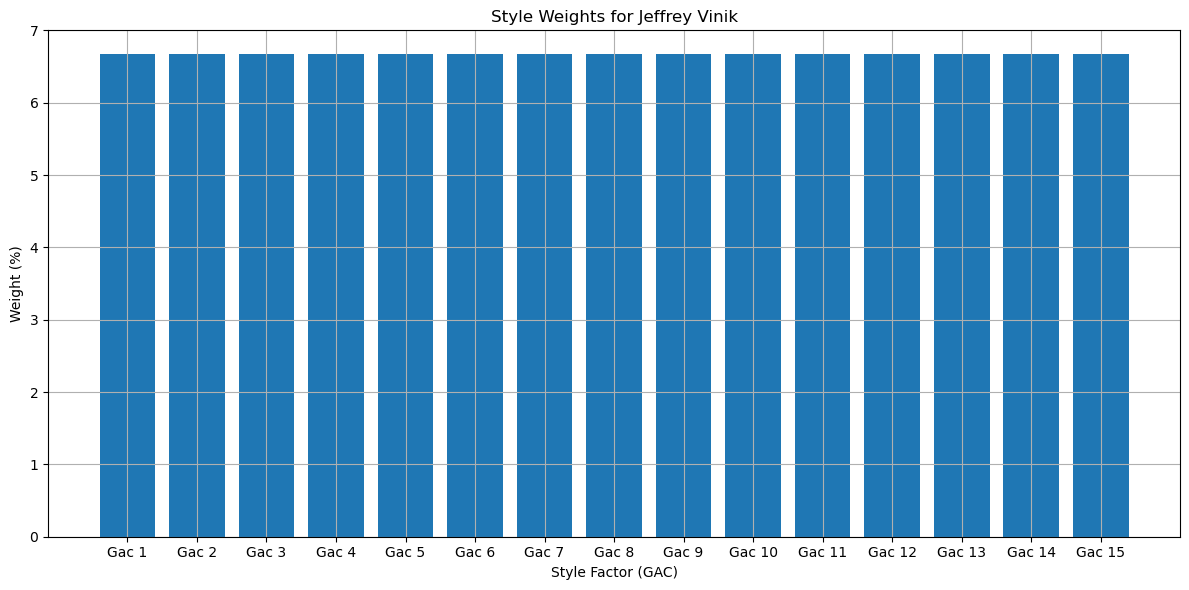

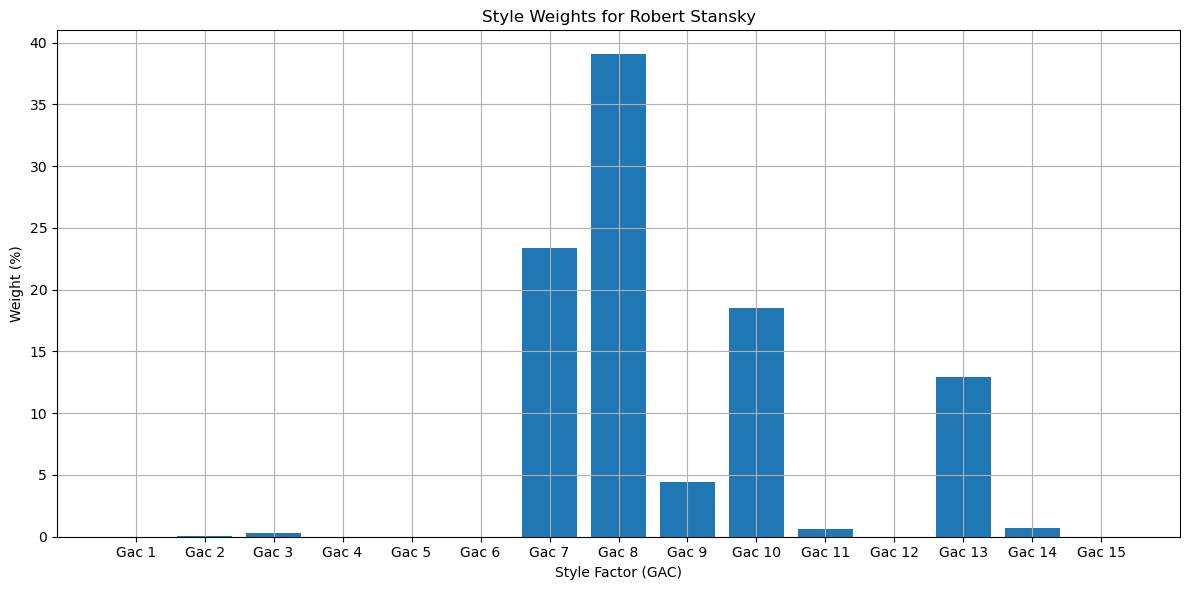

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load cleaned data
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col='date', parse_dates=True)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Sort indices to ensure date-based slicing works
fmagx_df = fmagx_df.sort_index()
gacs_df = gacs_df.sort_index()

# Convert returns to numeric to handle any invalid values
fmagx_df['return'] = pd.to_numeric(fmagx_df['return'], errors='coerce')
for i in range(1, 16):
    gacs_df[f'Gac {i}'] = pd.to_numeric(gacs_df[f'Gac {i}'], errors='coerce')

# Define the periods for each manager
manager_periods = {
    'Peter Lynch': ('1977-05', '1990-05'),
    'Morris Smith': ('1990-06', '1992-06'),
    'Jeffrey Vinik': ('1992-07', '1996-05'),
    'Robert Stansky': ('1996-06', '2003-10')
}

# Initialize a dictionary to store results
manager_results = {}

for manager, (start, end) in manager_periods.items():
    # Filter data for each manager's period
    magellan_returns = fmagx_df[start:end]
    gac_returns = gacs_df[start:end].dropna()  # Ensure no NaNs for regression
    
    # Align dates between the two
    data = magellan_returns.join(gac_returns, how='inner')
    
    # Prepare the dependent variable (fund returns) and independent variables (style factors)
    y = data['return'].values  # Fund returns (dependent variable)
    X = data[[f'Gac {j}' for j in range(1, 16)]].values  # Style factors (independent variables)
    
    # Number of style factors (assets) K
    K = X.shape[1]
    
    print(f"\nProcessing {manager}")
    print(f"Period: {start} to {end}")
    print("Fund returns (first 5):", y[:5])
    print("Style factors (first 5 rows):\n", X[:5, :])

    # Define the constraint matrix for the weights
    def constraint(weights):
        return np.sum(weights) - 1  # Weights should sum to 1
    
    # Define the objective function to minimize (tracking error variance)
    def objective(weights):
        # Calculate style return as the linear combination of style factors
        style_return = np.dot(X, weights)
        # Calculate tracking error (residual)
        tracking_error = y - style_return
        return np.var(tracking_error)  # Minimize the variance of the tracking error
    
    # Initial guess for the weights (uniform distribution)
    initial_guess = np.ones(K) / K
    print("Initial weights (uniform):", initial_guess)

    # Constraints: sum of weights = 1, all weights >= 0
    constraints = ({'type': 'eq', 'fun': constraint})
    bounds = [(0, None)] * K  # Non-negative weights
    
    # Solve using minimize (quadratic programming)
    result = minimize(objective, initial_guess, bounds=bounds, constraints=constraints)
    
    # Optimal weights (style allocations)
    optimal_weights = result.x
    print("Optimal weights:", optimal_weights)

    # Calculate style return (expected return based on optimal weights)
    style_return = np.dot(X, optimal_weights)
    print("Calculated style returns (first 5):", style_return[:5])
    
    # Calculate tracking error (selection return)
    tracking_error = y - style_return
    print("Tracking error (first 5):", tracking_error[:5])
    
    # Calculate alpha (mean of tracking error)
    alpha = np.mean(tracking_error)
    print("Alpha (Selection Return):", alpha)
    
    # Calculate R² (explanatory power of the style)
    ss_res = np.sum(tracking_error**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    print("R²:", r_squared)
    
    # Calculate the t-statistic for alpha (historical appraisal ratio)
    t_statistic = alpha / (np.std(tracking_error) / np.sqrt(len(tracking_error)))
    print("t-Statistic for Alpha:", t_statistic)
    
    # Store results for the manager
    manager_results[manager] = {
        'weights': optimal_weights,
        'tracking_error': tracking_error,
        'alpha': alpha,
        'r_squared': r_squared,
        't_statistic': t_statistic
    }

# Print out summary results for each manager
for manager, results in manager_results.items():
    print(f"\nSummary Results for {manager}:")
    print(f"  Style Weights: {results['weights']}")
    print(f"  Alpha (Selection Return): {results['alpha']}")
    print(f"  R²: {results['r_squared']}")
    print(f"  t-Statistic for Alpha: {results['t_statistic']}")
    print("-" * 50)

# Plot the style weights for each manager
for manager, results in manager_results.items():
    plt.figure(figsize=(12, 6))
    plt.bar([f'Gac {i+1}' for i in range(len(results['weights']))], results['weights'] * 100)  # Show percentages
    plt.title(f'Style Weights for {manager}')
    plt.xlabel('Style Factor (GAC)')
    plt.ylabel('Weight (%)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



Processing Lynch

Matrix P (2 * style_factors.T @ style_factors):
 [[ 0.01577312  0.01670991  0.01632086  0.01696219  0.0176559   0.01142098
   0.02289092  0.02103054  0.0127299   0.02224964  0.02917843  0.0168193
   0.02002814  0.02580263  0.01454712]
 [ 0.01670991  0.09462658  0.178611    0.13996114  0.14971442  0.09212962
   0.08192976  0.07752768  0.08440543  0.07786689  0.09524509  0.06289944
   0.09052502  0.07593371 -0.00942179]
 [ 0.01632086  0.178611    0.4073566   0.28783926  0.3023071   0.17425518
   0.1701272   0.17659178  0.18333848  0.17719937  0.17971242  0.146856
   0.1796658   0.12551542 -0.06337824]
 [ 0.01696219  0.13996114  0.28783926  0.22966112  0.24230958  0.1342658
   0.14146118  0.13630806  0.14999187  0.14506499  0.1645002   0.12656915
   0.14214459  0.10481565 -0.02058778]
 [ 0.0176559   0.14971442  0.3023071   0.24230958  0.2765285   0.13889507
   0.13561932  0.1305123   0.14257175  0.13824088  0.15029893  0.11553452
   0.14306588  0.09191539 -0.00722741]
 

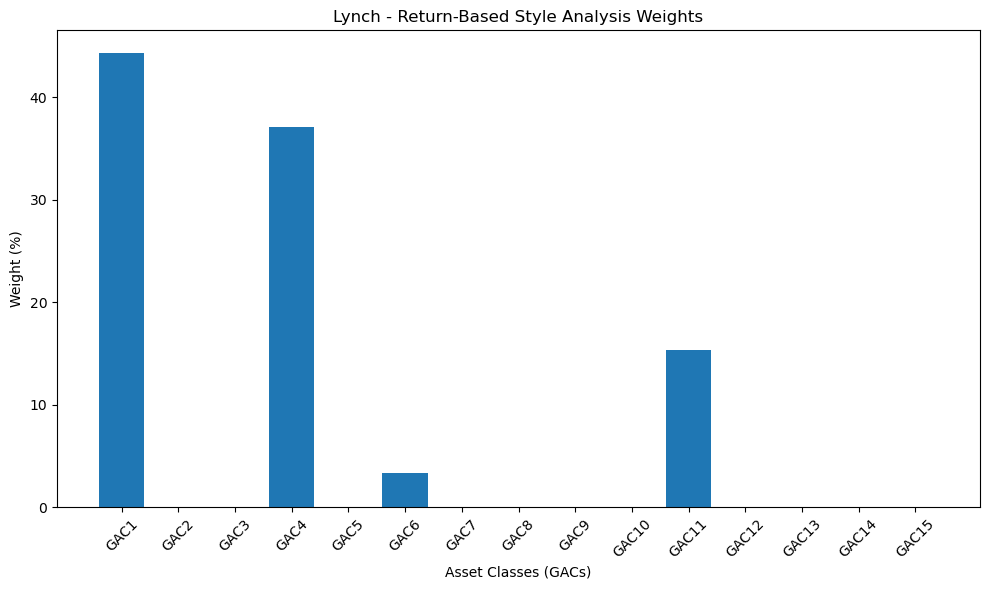


Processing Smith

Matrix P (2 * style_factors.T @ style_factors):
 [[ 0.00129688  0.00266363  0.00338948  0.0030376   0.0029641   0.00421355
   0.00258595  0.00374535  0.00124194  0.00575912  0.00330367  0.00279907
   0.00185863 -0.00074158  0.00338587]
 [ 0.00266363  0.00892886  0.01586466  0.01090188  0.00958498  0.0177217
   0.01407714  0.0205407   0.01111443  0.02391506  0.01250564  0.01529342
   0.01475813  0.01063162  0.01005176]
 [ 0.00338948  0.01586466  0.03592594  0.02125     0.01733552  0.032675
   0.03654136  0.05234258  0.0337685   0.05847118  0.03498813  0.0442372
   0.03730493  0.03168429  0.0217375 ]
 [ 0.0030376   0.01090188  0.02125     0.01469178  0.01210766  0.01912701
   0.02364766  0.0327502   0.0219574   0.03750888  0.02725325  0.02956945
   0.0221541   0.01574646  0.01936689]
 [ 0.0029641   0.00958498  0.01733552  0.01210766  0.0113102   0.01829031
   0.01897218  0.0252826   0.01579656  0.02982196  0.01875125  0.02160928
   0.02046366  0.01540497  0.01539692]
 

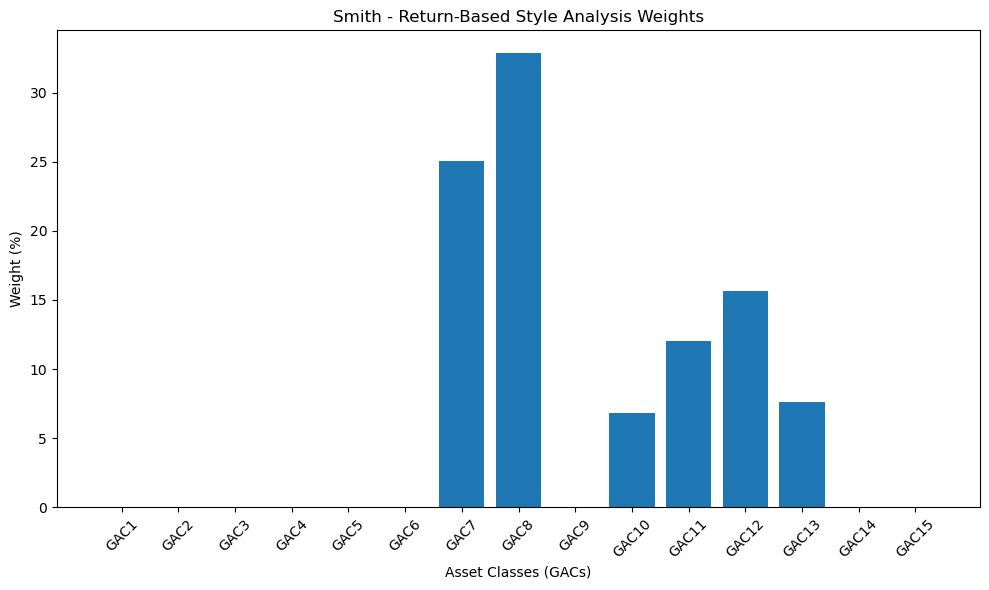


Processing Vinik

Matrix P (2 * style_factors.T @ style_factors):
 [[ 0.00150886  0.00173972  0.00259989  0.00226407  0.00190085  0.00306942
   0.00505533  0.00514813  0.00322699  0.00542328  0.00582839  0.00529595
   0.00357488  0.00361876  0.00243201]
 [ 0.00173972  0.01057372  0.02346172  0.01616724  0.01008508  0.00886642
   0.01868127  0.01277054  0.01368462  0.010059    0.01377573  0.00677997
   0.01285908  0.00869469  0.00938732]
 [ 0.00259989  0.02346172  0.06217326  0.03946804  0.02283402  0.01306123
   0.04077508  0.02666746  0.02989352  0.01802491  0.02790417  0.01191228
   0.02645196  0.01214812  0.01722856]
 [ 0.00226407  0.01616724  0.03946804  0.0263317   0.01606056  0.01096179
   0.0301656   0.0205832   0.0226827   0.01672027  0.02271777  0.01225561
   0.02120595  0.01277987  0.0155731 ]
 [ 0.00190085  0.01008508  0.02283402  0.01606056  0.01151036  0.00729321
   0.01998559  0.01560905  0.01570869  0.01381366  0.01634953  0.01052073
   0.01417476  0.01075367  0.0105025

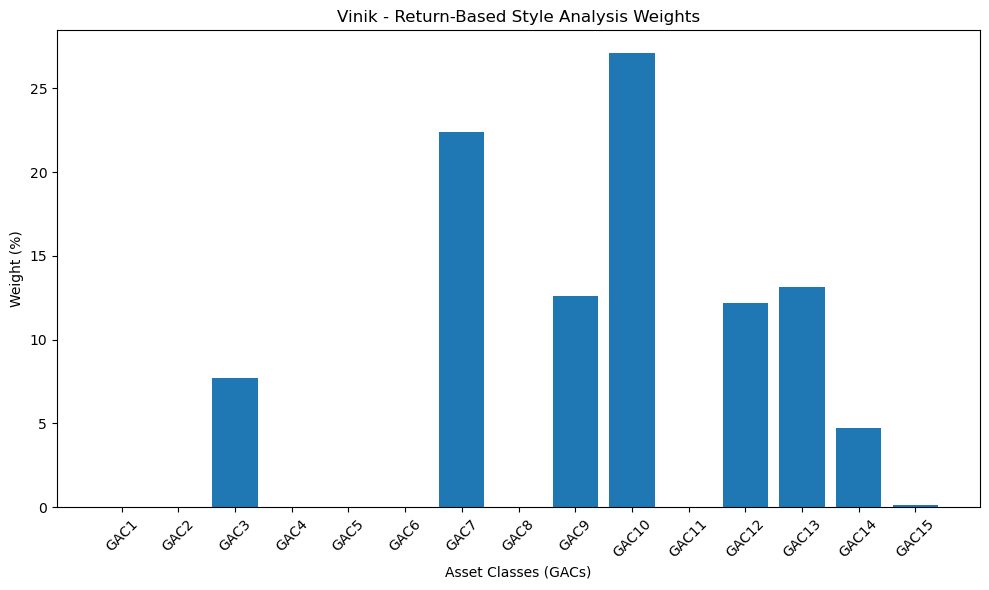


Processing Stansky

Matrix P (2 * style_factors.T @ style_factors):
 [[ 2.53632416e-03  3.60386976e-03  4.93530447e-03  3.86660705e-03
   3.89584926e-03  1.45298150e-03  5.65751890e-03  6.05178063e-03
   7.66027507e-03  8.77731448e-03  7.15352888e-03  4.52955281e-03
   4.93488312e-03 -3.27657825e-03 -9.88258655e-04]
 [ 3.60386976e-03  1.97645202e-02  4.36681201e-02  2.40277003e-02
   1.66540402e-02  2.33516826e-02 -1.37948058e-02 -7.61380424e-03
  -6.18808455e-03 -1.17317511e-02 -1.10107348e-02 -1.85022640e-02
  -1.50991413e-02 -1.57732024e-02 -3.95088382e-02]
 [ 4.93530447e-03  4.36681201e-02  1.25714860e-01  6.33955005e-02
   3.53802000e-02  5.11233030e-02 -3.22916637e-02 -1.57276549e-02
  -1.71351679e-02 -2.62396308e-02 -2.52233251e-02 -3.82475902e-02
  -3.22760892e-02 -3.36998165e-02 -1.00081607e-01]
 [ 3.86660705e-03  2.40277003e-02  6.33955005e-02  4.23035204e-02
   2.19150601e-02  2.90683063e-02  1.71889528e-02  2.35687477e-02
   2.15343242e-02  2.68289393e-02  2.52683565e-02  

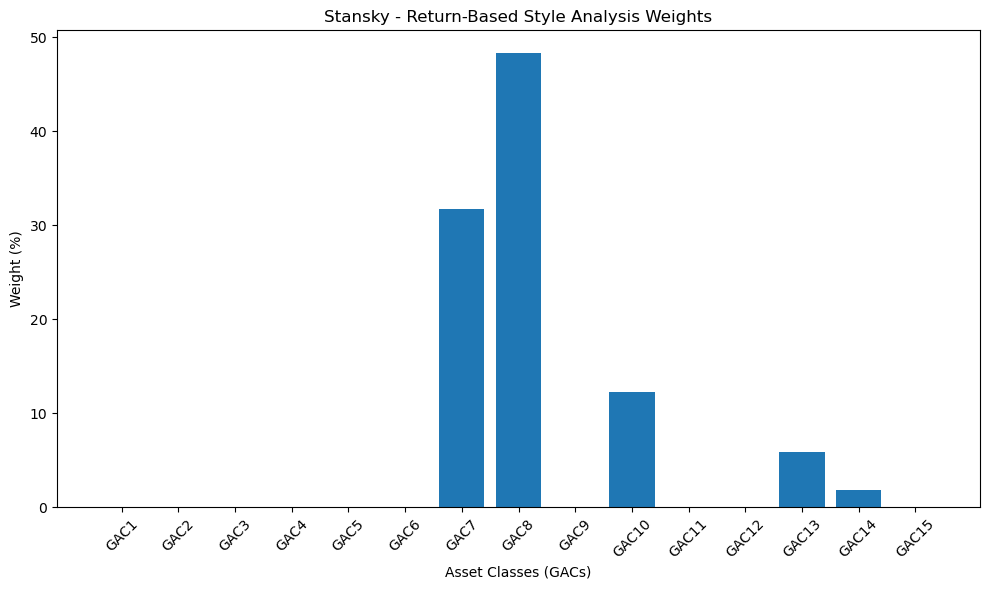

In [43]:
import numpy as np
import pandas as pd
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

# Load the data
gac_df = pd.read_csv('Cleaned_GACs.csv', index_col=0, parse_dates=True).iloc[:, :15]  # Use only GAC 1-15
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col=0, parse_dates=True)

# Set managers' tenures
tenures = {
    'Lynch': ('1977-05', '1990-05'),
    'Smith': ('1990-05', '1992-07'),
    'Vinik': ('1992-07', '1996-05'),
    'Stansky': ('1996-05', '2003-10')
}

# Initialize cvxopt solver
solvers.options['show_progress'] = False

# Define a function to perform return-based style analysis using cvxopt
def return_based_style_analysis(fund_returns, style_factors):
    # Ensure fund_returns and style_factors have the same length
    min_len = min(len(fund_returns), len(style_factors))
    fund_returns = fund_returns[:min_len]
    style_factors = style_factors[:min_len]

    # Number of asset classes
    n = style_factors.shape[1]

    # Calculate matrices for the quadratic programming solver
    # Minimize (1/2)*x^T*P*x + q^T*x
    P = matrix(2 * np.dot(style_factors.T, style_factors))
    q = matrix(-2 * np.dot(style_factors.T, fund_returns))

    # Print intermediate calculations
    print("\nMatrix P (2 * style_factors.T @ style_factors):\n", np.array(P))
    print("\nVector q (-2 * style_factors.T @ fund_returns):\n", np.array(q))

    # Constraints G*x <= h, where G ensures weights are non-negative
    G = matrix(-np.identity(n))
    h = matrix(0.0, (n, 1))

    # Constraints A*x = b, where A ensures weights sum to 1
    A = matrix(1.0, (1, n))
    b = matrix(1.0)

    # Solve the quadratic program
    sol = solvers.qp(P, q, G, h, A, b)
    weights = np.array(sol['x']).flatten()

    # Calculate style benchmark returns and tracking error
    style_returns = style_factors @ weights
    tracking_error = fund_returns - style_returns

    # Calculate Alpha (Selection Return) and R-squared
    alpha = np.mean(tracking_error)
    r_squared = 1 - np.var(tracking_error) / np.var(fund_returns)

    # Print additional intermediate results
    print("\nStyle returns (first 5):", style_returns[:5])
    print("Tracking error (first 5):", tracking_error[:5])
    print("Alpha:", alpha)
    print("R-squared:", r_squared)

    return weights, style_returns, tracking_error, alpha, r_squared

# Perform analysis for each manager
results = {}
for manager, (start, end) in tenures.items():
    print(f"\nProcessing {manager}")
    
    # Get the subset of data for the manager's tenure
    fund_returns = fmagx_df[start:end].values.flatten()
    style_factors = gac_df[start:end].values

    # Perform return-based style analysis
    weights, style_returns, tracking_error, alpha, r_squared = return_based_style_analysis(fund_returns, style_factors)

    # Store results
    results[manager] = {
        'weights': weights,
        'style_returns': style_returns,
        'tracking_error': tracking_error,
        'alpha': alpha,
        'r_squared': r_squared
    }
    
    # Convert weights to percentages
    weights_percentage = weights * 100

    # Plot the weights as percentages
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(weights_percentage)), weights_percentage)
    plt.xlabel('Asset Classes (GACs)')
    plt.ylabel('Weight (%)')
    plt.title(f'{manager} - Return-Based Style Analysis Weights')
    plt.xticks(range(len(weights_percentage)), [f'GAC{i+1}' for i in range(len(weights_percentage))], rotation=45)
    plt.tight_layout()
    plt.show()


Peter Lynch Style Weights (Percentages):
  GAC 1: 0.29%
  GAC 2: 0.26%
  GAC 3: 2.31%
  GAC 4: 0.85%
  GAC 5: 0.82%
  GAC 6: 0.12%
  GAC 7: 10.51%
  GAC 8: 14.25%
  GAC 9: 11.02%
  GAC 10: 18.81%
  GAC 11: 14.34%
  GAC 12: 21.02%
  GAC 13: 3.18%
  GAC 14: 2.10%
  GAC 15: 0.14%
  Tracking Errors: date
1990-01-01   -0.006285
1990-02-01    0.008547
1990-03-01    0.004373
1990-04-01    0.009559
1990-05-01    0.002675
dtype: float64
  Alphas (last 5 periods): date
1990-01-01    0.006806
1990-02-01    0.004897
1990-03-01    0.005801
1990-04-01    0.005685
1990-05-01    0.005564
dtype: float64

Morris Smith Style Weights (Percentages):
  GAC 1: 0.00%
  GAC 2: 0.03%
  GAC 3: 0.30%
  GAC 4: 0.26%
  GAC 5: 0.16%
  GAC 6: 0.01%
  GAC 7: 13.74%
  GAC 8: 15.76%
  GAC 9: 12.14%
  GAC 10: 16.53%
  GAC 11: 13.31%
  GAC 12: 14.83%
  GAC 13: 10.09%
  GAC 14: 0.07%
  GAC 15: 2.79%
  Tracking Errors: date
1992-02-01   -0.011300
1992-03-01    0.006396
1992-04-01    0.004280
1992-05-01    0.005686
1992-06-0

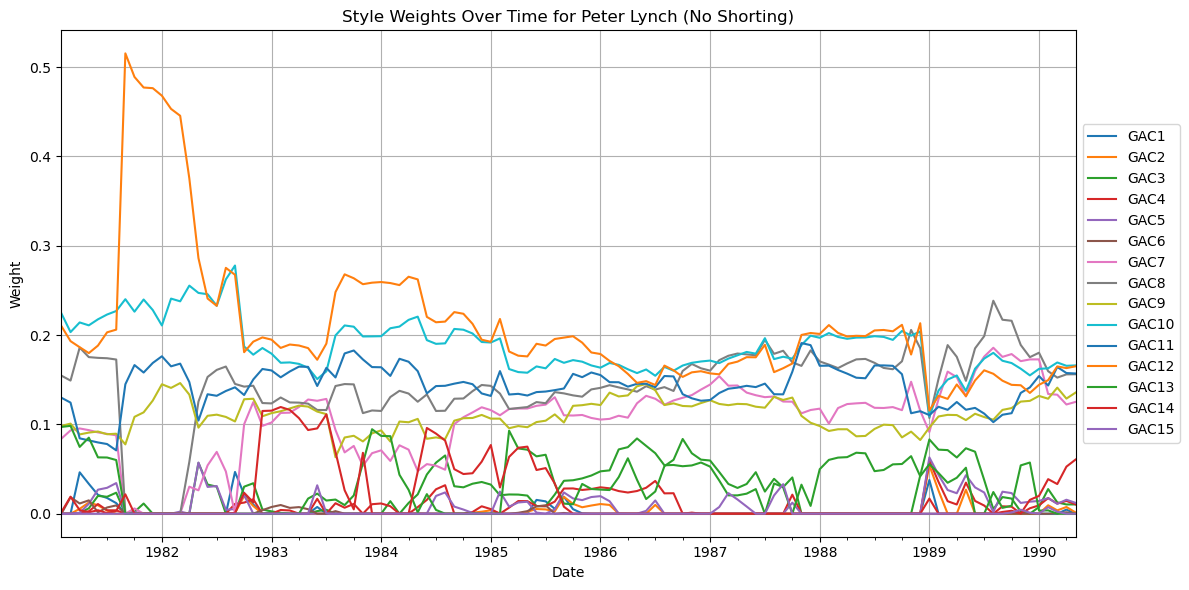

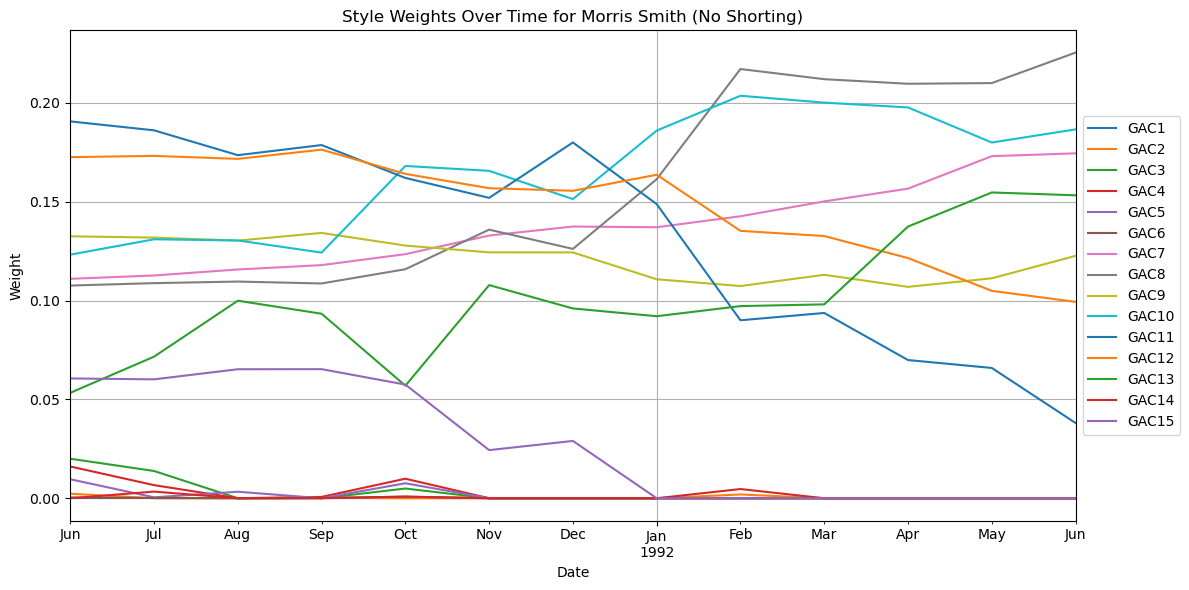

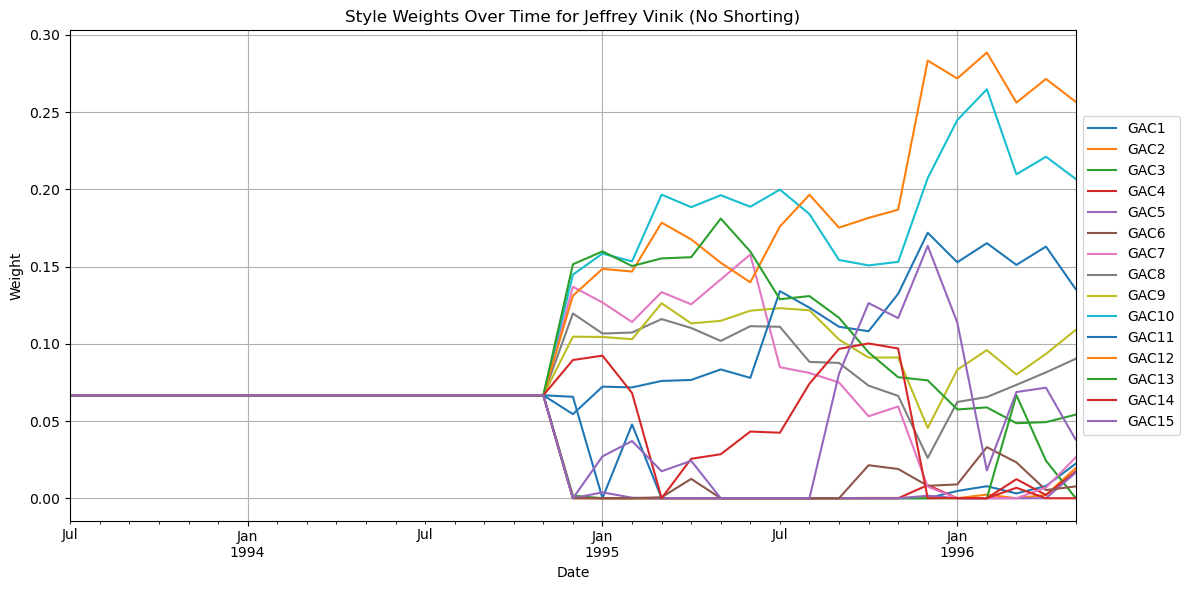

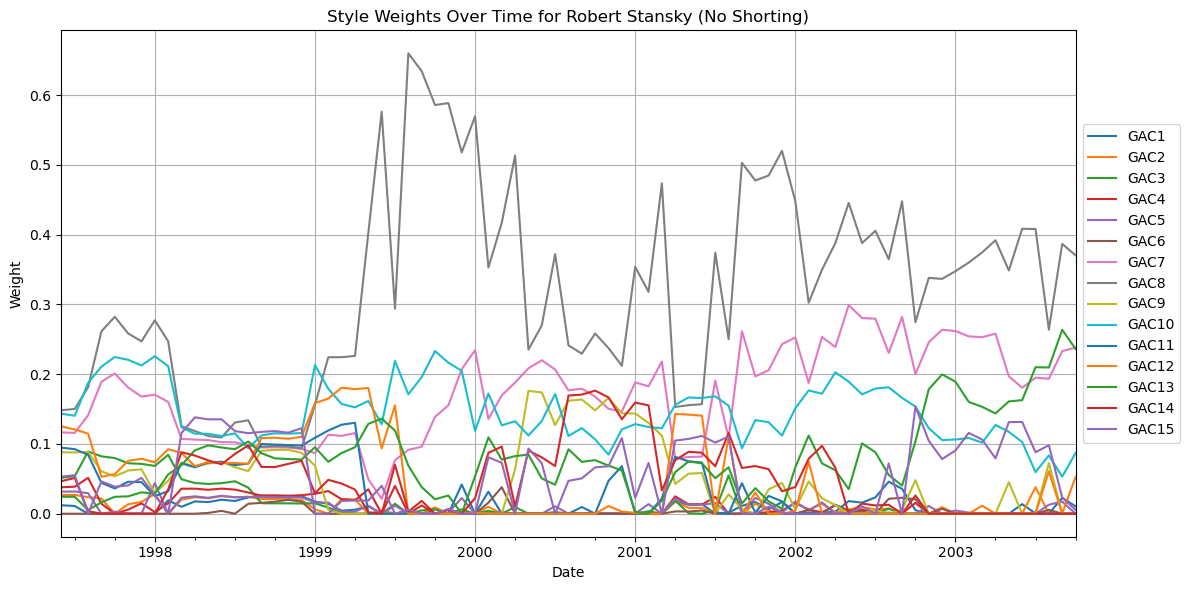

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load cleaned data
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col='date', parse_dates=True)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Sort indices to ensure date-based slicing works
fmagx_df = fmagx_df.sort_index()
gacs_df = gacs_df.sort_index()

# Convert returns to numeric to handle any invalid values
fmagx_df['return'] = pd.to_numeric(fmagx_df['return'], errors='coerce')
for i in range(1, 16):
    gacs_df[f'Gac {i}'] = pd.to_numeric(gacs_df[f'Gac {i}'], errors='coerce')

# Define the periods for each manager
manager_periods = {
    'Peter Lynch': ('1977-05', '1990-05'),
    'Morris Smith': ('1990-06', '1992-06'),
    'Jeffrey Vinik': ('1992-07', '1996-05'),
    'Robert Stansky': ('1996-06', '2003-10')
}

# Set window size (e.g., 12 months for rolling analysis)
window_size = 12

# Initialize a dictionary to store weights and tracking errors
manager_results = {}

# Quadratic programming function for style weights
def quadratic_programming(weights, y, F):
    tracking_errors = y - F @ weights
    return np.var(tracking_errors)  # Minimize variance of tracking errors

for manager, (start, end) in manager_periods.items():
    # Filter data for each manager's period
    magellan_returns = fmagx_df[start:end]
    gac_returns = gacs_df[start:end].dropna()  # Ensure no NaNs for regression
    
    # Align dates between the two
    data = magellan_returns.join(gac_returns, how='inner')
    
    # Prepare DataFrames for results storage
    weights_df = pd.DataFrame(index=data.index, columns=[f'GAC{i}' for i in range(1, 16)])
    tracking_errors = pd.Series(index=data.index)

    # Rolling regression for each window
    for i in range(window_size, len(data)):
        # Define the window of returns data
        window_data = data.iloc[i - window_size:i]
        y = window_data['return'].values  # Dependent variable as a numpy array
        F = window_data[[f'Gac {j}' for j in range(1, 16)]].values  # Independent variables as numpy array

        # Initial guess for weights
        initial_weights = np.ones(F.shape[1]) / F.shape[1]

        # Define constraints
        constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}  # sum(weights) = 1
        bounds = [(0, None) for _ in range(F.shape[1])]  # weights >= 0

        # Minimize the variance of tracking errors using quadratic programming
        result = minimize(quadratic_programming, initial_weights, args=(y, F), 
                          method='SLSQP', bounds=bounds, constraints=constraints)

        # Store the optimal weights
        weights_df.iloc[i] = result.x

        # Calculate tracking errors for this period and ensure it's a single scalar
        tracking_error = y[-1] - np.dot(F[-1], result.x)  # Using the last value
        tracking_errors.iloc[i] = tracking_error  # Store the tracking error for the current index

    # Calculate the mean weights over the manager's period
    mean_weights = weights_df.mean().values
    percentage_weights = mean_weights / mean_weights.sum() * 100  # Convert to percentage

    # Store results in the dictionary
    manager_results[manager] = {
        'weights': weights_df.dropna(),
        'mean_weights': mean_weights,
        'percentage_weights': percentage_weights,
        'tracking_errors': tracking_errors.dropna(),
        'alphas': tracking_errors.rolling(window=window_size).mean()  # Mean tracking error as alpha
    }

# Print out the results for each manager
for manager, results in manager_results.items():
    print(f"{manager} Style Weights (Percentages):")
    for i, weight in enumerate(results['percentage_weights']):
        print(f"  GAC {i + 1}: {weight:.2f}%")
    print(f"  Tracking Errors: {results['tracking_errors'].tail(5)}")
    print(f"  Alphas (last 5 periods): {results['alphas'].tail(5)}\n")

# Plot the weights for each manager to visualize style changes
for manager, results in manager_results.items():
    results['weights'].plot(figsize=(12, 6), title=f'Style Weights Over Time for {manager} (No Shorting)')
    plt.xlabel("Date")
    plt.ylabel("Weight")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Results for Peter Lynch:
  Month 1: Alpha = -0.09351312359195764, t-Statistic = nan
  Month 2: Alpha = -0.05331021597864103, t-Statistic = -1.875288005911805
  Month 3: Alpha = -0.0313355648006914, t-Statistic = -1.2006972822108373
  Month 4: Alpha = -0.00871687998594569, t-Statistic = -0.31478525665489954
  Month 5: Alpha = -0.010534082945395904, t-Statistic = -0.4742357577804218
  Month 6: Alpha = -0.010942274408511208, t-Statistic = -0.5910149053424868
  Month 7: Alpha = -0.010134775591104025, t-Statistic = -0.6379261156664306
  Month 8: Alpha = -0.013950527290500694, t-Statistic = -0.9720196447306053
  Month 9: Alpha = -0.0002583499337823604, t-Statistic = -0.014234707004473046
  Month 10: Alpha = 0.003601164605907978, t-Statistic = 0.21512707995756106
  Month 11: Alpha = 0.001467777918774252, t-Statistic = 0.09560041197648372
  Month 12: Alpha = 0.0009057104512563974, t-Statistic = 0.06430727461136132
  Month 13: Alpha = 0.007695004837302689, t-Statistic = 0.5290352397781128
  Mon

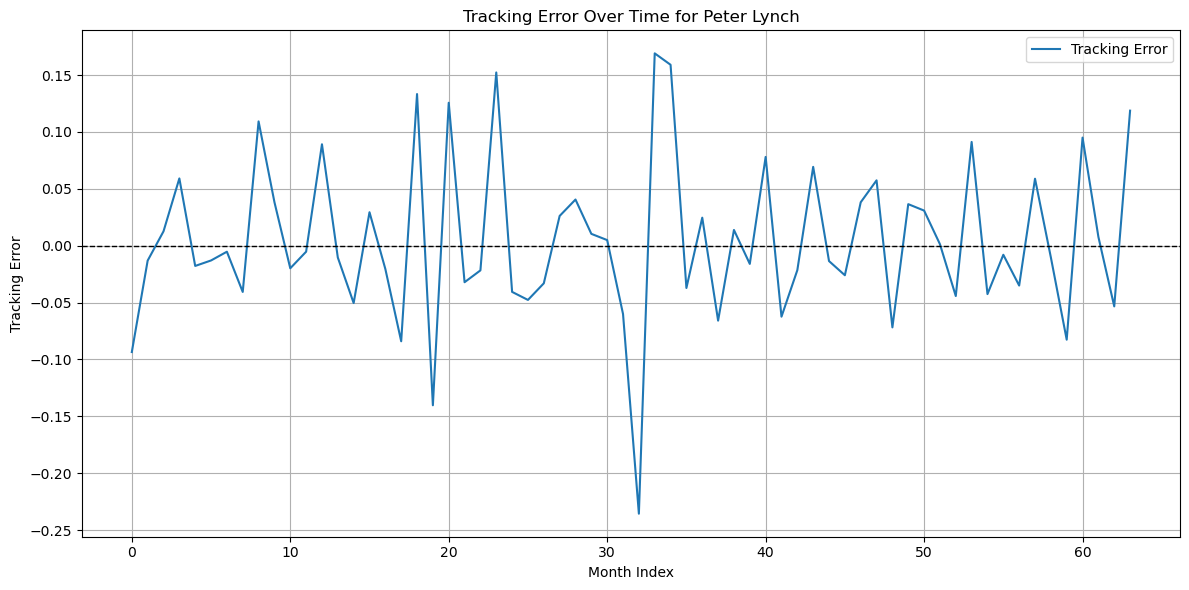

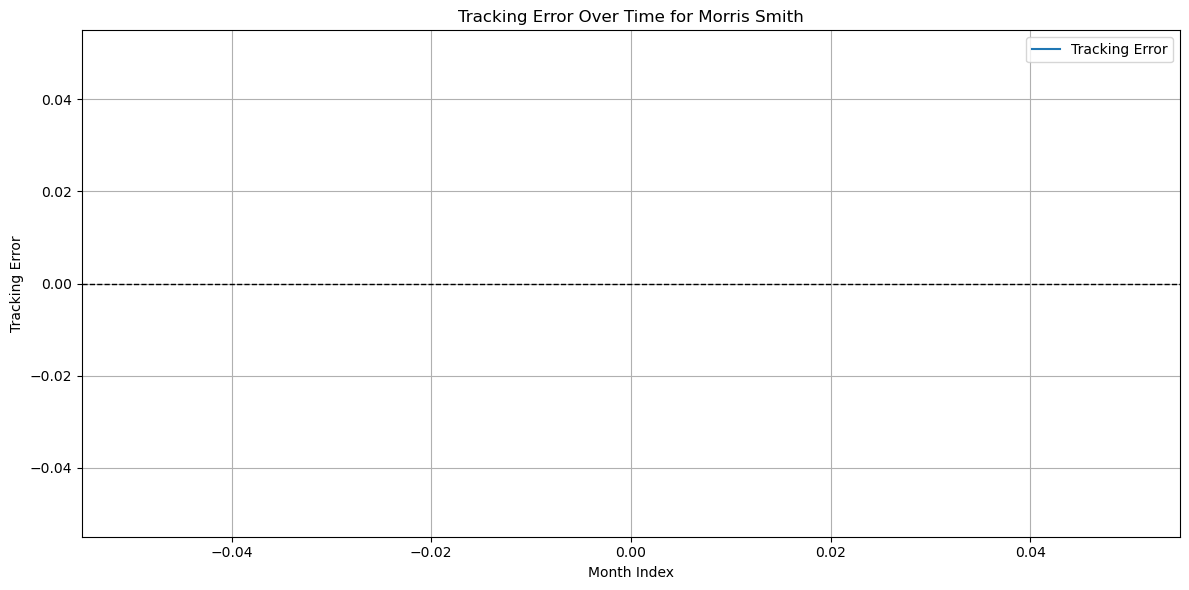

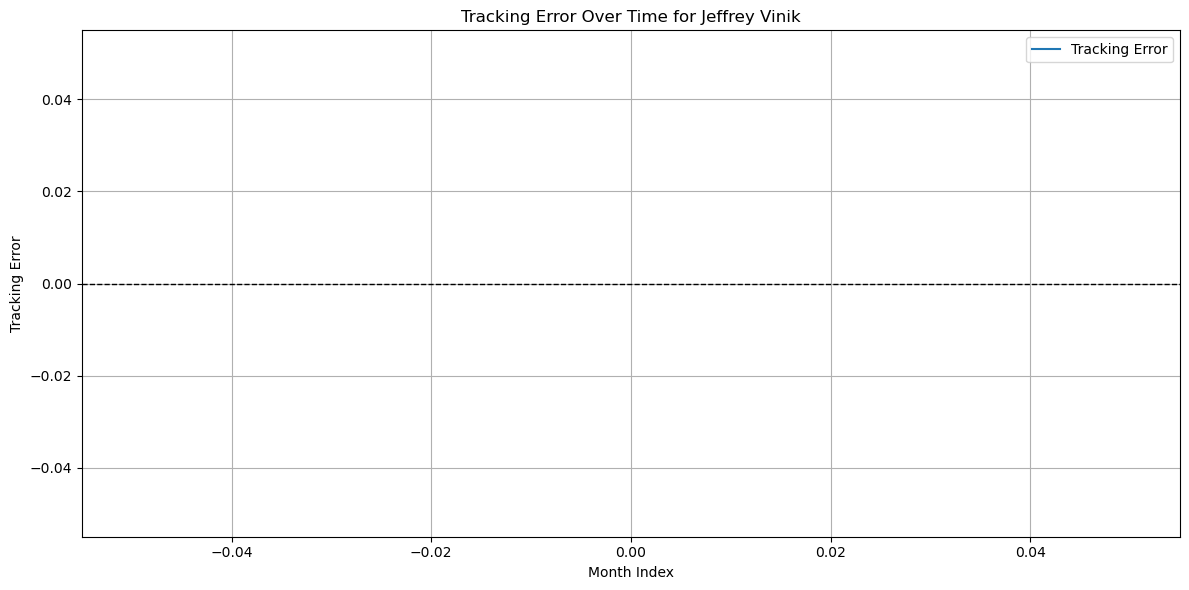

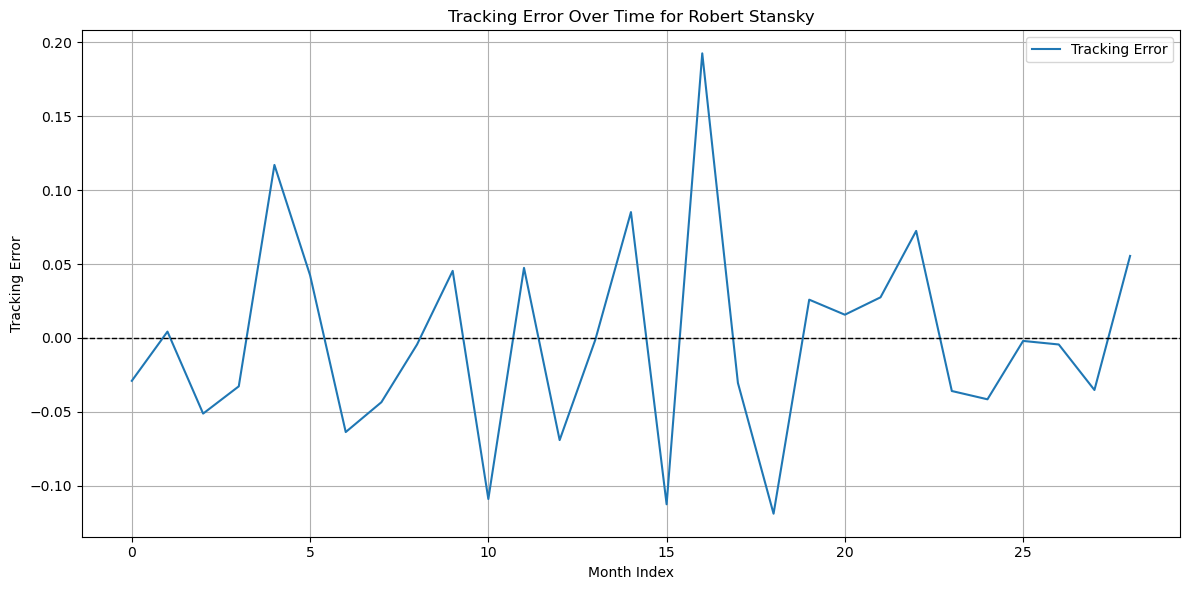

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load cleaned data
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col='date', parse_dates=True)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Sort indices to ensure date-based slicing works
fmagx_df = fmagx_df.sort_index()
gacs_df = gacs_df.sort_index()

# Convert returns to numeric to handle any invalid values
fmagx_df['return'] = pd.to_numeric(fmagx_df['return'], errors='coerce')
for i in range(1, 16):
    gacs_df[f'Gac {i}'] = pd.to_numeric(gacs_df[f'Gac {i}'], errors='coerce')

# Define the periods for each manager
manager_periods = {
    'Peter Lynch': ('1977-05', '1990-05'),
    'Morris Smith': ('1990-06', '1992-06'),
    'Jeffrey Vinik': ('1992-07', '1996-05'),
    'Robert Stansky': ('1996-06', '2003-10')
}

# Initialize a dictionary to store results
manager_results = {}

# Function to perform rolling style analysis
def rolling_style_analysis(magellan_returns, gac_returns):
    # Join the returns and drop any NaNs
    data = magellan_returns.join(gac_returns, how='inner').dropna()
    
    # Store the results for the analysis
    tracking_errors = []
    alphas = []
    t_statistics = []

    # Loop through the data starting from the 60th month
    for i in range(60, len(data)):
        # Define the historical window of returns for style analysis
        window_data = data.iloc[i-60:i]
        y = window_data['return'].values  # Fund returns
        X = window_data[[f'Gac {j}' for j in range(1, 16)]].values  # Style factors
        
        # Define the constraint function
        def constraint(weights):
            return np.sum(weights) - 1  # Weights should sum to 1
        
        # Define the objective function (minimize tracking error variance)
        def objective(weights):
            style_return = np.dot(X, weights)
            tracking_error = y - style_return
            return np.var(tracking_error)  # Variance of tracking error
        
        # Initial guess for weights (uniform distribution)
        initial_guess = np.ones(15) / 15
        
        # Constraints: sum of weights = 1, all weights >= 0
        constraints = {'type': 'eq', 'fun': constraint}
        bounds = [(0, None)] * 15  # Non-negative weights
        
        # Solve using minimize (quadratic programming)
        result = minimize(objective, initial_guess, bounds=bounds, constraints=constraints)
        
        # Optimal weights
        optimal_weights = result.x
        
        # Calculate the expected style return for the current month (month t)
        current_style_return = np.dot(X[-1], optimal_weights)  # Use the last row of style factors
        actual_return = data['return'].iloc[i]  # Actual return for month t
        
        # Calculate the tracking error (selection return) for month t
        tracking_error = actual_return - current_style_return
        
        # Store tracking error
        tracking_errors.append(tracking_error)
        
        # Calculate alpha (mean tracking error)
        alpha = np.mean(tracking_errors)
        alphas.append(alpha)
        
        # Calculate the t-statistic for alpha
        t_statistic = alpha / (np.std(tracking_errors) / np.sqrt(len(tracking_errors))) if len(tracking_errors) > 1 else np.nan
        t_statistics.append(t_statistic)

    return tracking_errors, alphas, t_statistics

# Analyze each manager
for manager, (start, end) in manager_periods.items():
    magellan_returns = fmagx_df[start:end]
    gac_returns = gacs_df[start:end]
    
    # Perform rolling style analysis for each manager
    tracking_errors, alphas, t_statistics = rolling_style_analysis(magellan_returns, gac_returns)
    
    # Store results for the manager
    manager_results[manager] = {
        'tracking_errors': tracking_errors,
        'alphas': alphas,
        't_statistics': t_statistics
    }

# Print out results for each manager
for manager, results in manager_results.items():
    print(f"Results for {manager}:")
    for i in range(len(results['alphas'])):
        print(f"  Month {i+1}: Alpha = {results['alphas'][i]}, t-Statistic = {results['t_statistics'][i]}")
    print("-" * 50)

# Plot tracking errors for each manager
for manager, results in manager_results.items():
    plt.figure(figsize=(12, 6))
    plt.plot(results['tracking_errors'], label='Tracking Error')
    plt.title(f'Tracking Error Over Time for {manager}')
    plt.xlabel('Month Index')
    plt.ylabel('Tracking Error')
    plt.axhline(0, color='black', lw=1, ls='--')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load cleaned data for FMAGX and GACs
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col='date', parse_dates=True)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Sort indices to ensure proper alignment
fmagx_df = fmagx_df.sort_index()
gacs_df = gacs_df.sort_index()

# Convert returns to numeric
fmagx_df['return'] = pd.to_numeric(fmagx_df['return'], errors='coerce')
for i in range(1, 16):
    gacs_df[f'Gac {i}'] = pd.to_numeric(gacs_df[f'Gac {i}'], errors='coerce')

# Define manager periods
manager_periods = {
    'Peter Lynch': ('1977-05', '1990-05'),
    'Morris Smith': ('1990-06', '1992-06'),
    'Jeffrey Vinik': ('1992-07', '1996-05'),
    'Robert Stansky': ('1996-06', '2003-10')
}

# Set window size for rolling calculations (e.g., 12 months)
window_size = 12

# Initialize storage for results
manager_rolling_metrics = {}

for manager, (start, end) in manager_periods.items():
    # Filter data for the manager's period
    magellan_returns = fmagx_df[start:end]
    gac_returns = gacs_df[start:end].dropna()

    # Combine data for alignment
    data = magellan_returns.join(gac_returns, how='inner')
    
    # Prepare to store synthetic portfolio returns
    synthetic_returns = []
    
    for i in range(window_size, len(data)):
        # Define window for return-based style weights
        window_data = data.iloc[i-window_size:i]
        y = window_data['return']
        X = window_data[[f'Gac {i}' for i in range(1, 16)]]
        X = sm.add_constant(X)

        # Run regression to determine style weights
        model = sm.OLS(y, X).fit()
        weights = model.params[1:]  # Exclude the intercept for weights

        # Calculate synthetic return as weighted GAC portfolio return
        synthetic_return = np.dot(weights, data.iloc[i, 1:].values)
        synthetic_returns.append(synthetic_return)
    
    # Convert synthetic returns list to Series, aligned to the time period
    synthetic_returns_series = pd.Series(synthetic_returns, index=data.index[window_size:])
    
    # Compute rolling alpha and beta against the synthetic style portfolio
    rolling_alpha = []
    rolling_beta = []
    
    for i in range(window_size, len(data) - window_size):
        # Define the rolling window data for both the FMAGX and synthetic style returns
        fm_window = magellan_returns['return'].iloc[i:i+window_size]
        style_window = synthetic_returns_series.iloc[i:i+window_size]

        # Regress FMAGX returns against synthetic portfolio
        X_style = sm.add_constant(style_window)
        model = sm.OLS(fm_window, X_style).fit()
        
        # Store alpha and beta
        rolling_alpha.append(model.params[0])  # Intercept as alpha
        rolling_beta.append(model.params[1])   # Coefficient of style as beta

    # Save rolling alpha and beta for the manager
    rolling_alpha_series = pd.Series(rolling_alpha, index=data.index[window_size*2:])
    rolling_beta_series = pd.Series(rolling_beta, index=data.index[window_size*2:])
    manager_rolling_metrics[manager] = {'alpha': rolling_alpha_series, 'beta': rolling_beta_series}

# Plot rolling alpha and beta for each manager
for manager, metrics in manager_rolling_metrics.items():
    fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    fig.suptitle(f'Rolling Alpha and Beta for {manager}')
    
    # Plot alpha
    ax[0].plot(metrics['alpha'], label='Rolling Alpha', color='blue')
    ax[0].axhline(0, color='black', linestyle='--', linewidth=1)
    ax[0].set_ylabel('Alpha')
    ax[0].legend(loc='upper left')
    ax[0].grid(True)
    
    # Plot beta
    ax[1].plot(metrics['beta'], label='Rolling Beta', color='orange')
    ax[1].axhline(1, color='black', linestyle='--', linewidth=1)
    ax[1].set_ylabel('Beta')
    ax[1].set_xlabel('Date')
    ax[1].legend(loc='upper left')
    ax[1].grid(True)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


ValueError: shapes (15,) and (17,) not aligned: 15 (dim 0) != 17 (dim 0)

In [2]:
import pandas as pd
import statsmodels.api as sm

# Load cleaned Fama-French factors
ff_factors = pd.read_csv(
    'F-F_Research_Data_Factors_Cleaned.csv',
    index_col=0,
    parse_dates=True
)

# Function to run the Fama-French 3-Factor model
def run_factor_analysis(returns, benchmark):
    ff_factors_slice = ff_factors.loc[returns.index]  # Align factor data with the returns date range
    X = sm.add_constant(ff_factors_slice[['Mkt-RF', 'SMB', 'HML']])  # Add constant for intercept
    y = returns - ff_factors_slice['RF']  # Excess return over risk-free rate
    
    # Fit the model
    model = sm.OLS(y, X).fit()
    print(model.summary())
    return model

# Example of calculating rolling metrics
def rolling_metrics(returns, benchmark, window=12):
    excess_returns = returns - benchmark['RF']  # Subtract RF for excess returns
    rolling_sharpe = excess_returns.rolling(window).mean() / excess_returns.rolling(window).std()
    rolling_alpha = returns.rolling(window).mean() - benchmark['RF'].rolling(window).mean()
    return rolling_sharpe, rolling_alpha

# Usage
# Ensure your data for returns and benchmark aligns with the Fama-French data structure for analysis
# returns = ... (provide your returns data here)
# benchmark = ... (provide your benchmark data here)
# ff_model = run_factor_analysis(returns, benchmark)
# rolling_sharpe, rolling_alpha = rolling_metrics(returns, benchmark)


In [69]:
import pandas as pd
import statsmodels.api as sm

# Load Fama-French factors, specifying that the first row is header
ff_factors = pd.read_csv('F-F_Research_Data_Factors.csv', 
                          index_col=0, 
                          header=0,  # First row is header
                          na_values='',  # Treat empty strings as NaN
                          skipinitialspace=True)  # Skip spaces after commas

# Print the first few rows to check what the data looks like
print(ff_factors.head(20))  # Print more rows to see if there are any non-date entries

# Remove any rows that don't have the correct index format
ff_factors = ff_factors[ff_factors.index.str.isnumeric()]  # Keep only numeric indices
ff_factors.index = pd.to_datetime(ff_factors.index.astype(str).str[:6], format='%Y%m', errors='coerce')

# Convert factor columns to numeric, coercing errors to NaN
ff_factors[['Mkt-RF', 'SMB', 'HML', 'RF']] = ff_factors[['Mkt-RF', 'SMB', 'HML', 'RF']].apply(pd.to_numeric, errors='coerce')

# Print the cleaned DataFrame to check if it's loaded correctly
print(ff_factors.head())

# Now you can proceed with your analysis as before


       Mkt-RF    SMB    HML    RF
192607   2.96  -2.56  -2.43  0.22
192608   2.64  -1.17   3.82  0.25
192609   0.36  -1.40   0.13  0.23
192610  -3.24  -0.09   0.70  0.32
192611   2.53  -0.10  -0.51  0.31
192612   2.62  -0.03  -0.05  0.28
192701  -0.06  -0.37   4.54  0.25
192702   4.18   0.04   2.94  0.26
192703   0.13  -1.65  -2.61  0.30
192704   0.46   0.30   0.81  0.25
192705   5.44   1.53   4.73  0.30
192706  -2.34   0.59  -1.73  0.26
192707   7.26  -3.25  -1.14  0.30
192708   1.97  -0.69  -3.74  0.28
192709   4.76  -3.63  -0.63  0.21
192710  -4.31   2.12  -4.33  0.25
192711   6.58   2.72  -0.27  0.21
192712   2.09   0.97  -1.13  0.22
192801  -0.68   4.26  -0.75  0.25
192802  -1.70  -2.06  -0.65  0.33


ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load cleaned dataframes
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col='date', parse_dates=True)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Ensure the benchmark returns are sorted by date
gacs_df = gacs_df.sort_index()

# Define manager periods
manager_periods = {
    'Peter Lynch': ('1980-02-01', '1990-05-01'),
    'Morris Smith': ('1990-06-01', '1992-06-01'),
    'Jeffrey Vinik': ('1992-07-01', '1996-05-01'),
    'Robert Stansky': ('1996-06-01', '2003-10-01')
}

# Benchmark returns
benchmark_returns = gacs_df['Core3']

# Function to calculate Fama-French 3-Factor Model
def run_factor_analysis(returns, benchmark):
    ff_factors = pd.read_csv('F-F_Research_Data_Factors.csv', index_col=0, parse_dates=True)  # Load Fama-French factors
    ff_factors = ff_factors.loc[returns.index]
    X = sm.add_constant(ff_factors)  # Add constant term
    model = sm.OLS(returns, X).fit()  # Fit OLS model
    return model

# Function to calculate rolling metrics
def rolling_metrics(returns, benchmark):
    rolling_sharpe = returns.rolling(window=12).mean() / returns.rolling(window=12).std()
    rolling_alpha = returns - benchmark.mean()
    return rolling_sharpe, rolling_alpha

# Function to calculate maximum drawdown
def maximum_drawdown(returns):
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

# Function to calculate information ratio
def information_ratio(returns, benchmark):
    active_return = returns - benchmark
    return active_return.mean() / active_return.std()

# Store results for each manager
manager_results = {}

# Loop through managers for analyses
for manager, period in manager_periods.items():
    start, end = period
    returns = fmagx_df.loc[start:end, 'return']
    
    # Ensure benchmark returns are correctly sliced and aligned
    benchmark_slice = benchmark_returns.loc[start:end]
    
    # Check for missing dates in benchmark
    if benchmark_slice.isnull().any():
        print(f"Warning: Missing benchmark data for {manager} during the period {start} to {end}.")
        benchmark_slice = benchmark_slice.fillna(method='ffill')  # Forward fill missing values if appropriate
    
    # Run Fama-French 3-Factor Model
    ff_model = run_factor_analysis(returns, benchmark_slice)
    
    # Calculate rolling metrics
    rolling_sharpe, rolling_alpha = rolling_metrics(returns, benchmark_slice)
    
    # Maximum Drawdown
    mdd = maximum_drawdown(returns)
    
    # Information Ratio
    ir = information_ratio(returns, benchmark_slice)
    
    manager_results[manager] = {
        'FF Model Summary': ff_model.summary(),
        'Rolling Sharpe': rolling_sharpe,
        'Rolling Alpha': rolling_alpha,
        'Max Drawdown': mdd,
        'Information Ratio': ir
    }

# Visualizations
plt.figure(figsize=(14, 10))

# Rolling Sharpe Ratio
plt.subplot(3, 2, 1)
for manager, results in manager_results.items():
    plt.plot(results['Rolling Sharpe'], label=manager)
plt.title('Rolling Sharpe Ratio')
plt.legend()
plt.grid()

# Rolling Alpha
plt.subplot(3, 2, 2)
for manager, results in manager_results.items():
    plt.plot(results['Rolling Alpha'], label=manager)
plt.title('Rolling Alpha')
plt.legend()
plt.grid()

# Maximum Drawdown
plt.subplot(3, 2, 3)
mdds = [results['Max Drawdown'] for results in manager_results.values()]
plt.bar(manager_results.keys(), mdds)
plt.title('Maximum Drawdown')
plt.grid()

# Information Ratio
plt.subplot(3, 2, 4)
information_ratios = [results['Information Ratio'] for results in manager_results.values()]
plt.bar(manager_results.keys(), information_ratios)
plt.title('Information Ratio')
plt.grid()

# Show all plots
plt.tight_layout()
plt.show()

# Display Fama-French model summaries
for manager, results in manager_results.items():
    print(f"{manager} Fama-French Model Summary:")
    print(results['FF Model Summary'])
    print("\n" + "="*80 + "\n")


/var/folders/31/b1v52j156gbfz83pmrnth3jc0000gn/T/ipykernel_67876/4259100522.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ff_factors = pd.read_csv('F-F_Research_Data_Factors.csv', index_col=0, parse_dates=True)  # Load Fama-French factors


KeyError: "None of [DatetimeIndex(['1980-02-01', '1980-03-01', '1980-04-01', '1980-05-01',\n               '1980-06-01', '1980-07-01', '1980-08-01', '1980-09-01',\n               '1980-10-01', '1980-11-01',\n               ...\n               '1989-08-01', '1989-09-01', '1989-10-01', '1989-11-01',\n               '1989-12-01', '1990-01-01', '1990-02-01', '1990-03-01',\n               '1990-04-01', '1990-05-01'],\n              dtype='datetime64[ns]', name='date', length=124, freq=None)] are in the [index]"

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load cleaned dataframes
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col='date', parse_dates=True)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Define manager periods
manager_periods = {
    'Peter Lynch': ('1980-02-01', '1990-05-01'),
    'Morris Smith': ('1990-06-01', '1992-06-01'),
    'Jeffrey Vinik': ('1992-07-01', '1996-05-01'),
    'Robert Stansky': ('1996-06-01', '2003-10-01')
}

# Benchmark returns
benchmark_returns = gacs_df['Core3']

# Function to calculate Fama-French 3-Factor Model
def run_factor_analysis(returns, benchmark):
    ff_factors = pd.read_csv('F-F_Research_Data_Factors.csv', index_col=0, parse_dates=True)  # Load Fama-French factors
    ff_factors = ff_factors.loc[returns.index]
    X = sm.add_constant(ff_factors)  # Add constant term
    model = sm.OLS(returns, X).fit()  # Fit OLS model
    return model

# Function to calculate rolling metrics
def rolling_metrics(returns, benchmark):
    rolling_sharpe = returns.rolling(window=12).mean() / returns.rolling(window=12).std()
    rolling_alpha = returns - benchmark.mean()
    return rolling_sharpe, rolling_alpha

# Function to calculate maximum drawdown
def maximum_drawdown(returns):
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

# Function to calculate information ratio
def information_ratio(returns, benchmark):
    active_return = returns - benchmark
    return active_return.mean() / active_return.std()

# Store results for each manager
manager_results = {}



In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load cleaned dataframes
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col='date', parse_dates=True)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Define manager periods
manager_periods = {
    'Peter Lynch': ('1980-02-01', '1990-05-01'),
    'Morris Smith': ('1990-06-01', '1992-06-01'),
    'Jeffrey Vinik': ('1992-07-01', '1996-05-01'),
    'Robert Stansky': ('1996-06-01', '2003-10-01')
}

# Benchmark returns
benchmark_returns = gacs_df['Core3']

# Function to calculate Fama-French 3-Factor Model
def run_factor_analysis(returns, benchmark):
    ff_factors = pd.read_csv('F-F_Research_Data_Factors.csv', index_col=0, parse_dates=True)  # Load Fama-French factors
    ff_factors = ff_factors.loc[returns.index]
    X = sm.add_constant(ff_factors)  # Add constant term
    model = sm.OLS(returns, X).fit()  # Fit OLS model
    return model

# Function to calculate rolling metrics
def rolling_metrics(returns, benchmark):
    rolling_sharpe = returns.rolling(window=12).mean() / returns.rolling(window=12).std()
    rolling_alpha = returns - benchmark.mean()
    return rolling_sharpe, rolling_alpha

# Function to calculate maximum drawdown
def maximum_drawdown(returns):
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

# Function to calculate information ratio
def information_ratio(returns, benchmark):
    active_return = returns - benchmark
    return active_return.mean() / active_return.std()

# Store results for each manager
manager_results = {}



In [64]:
# Load cleaned dataframes
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col='date', parse_dates=True)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Ensure the benchmark returns are sorted by date
gacs_df = gacs_df.sort_index()

# Define manager periods
manager_periods = {
    'Peter Lynch': ('1980-02-01', '1990-05-01'),
    'Morris Smith': ('1990-06-01', '1992-06-01'),
    'Jeffrey Vinik': ('1992-07-01', '1996-05-01'),
    'Robert Stansky': ('1996-06-01', '2003-10-01')
}

# Benchmark returns
benchmark_returns = gacs_df['Core3']

# Loop through managers for analyses
for manager, period in manager_periods.items():
    start, end = period
    # Slice the returns for the specified period
    returns = fmagx_df.loc[start:end, 'return']
    
    # Ensure benchmark returns are correctly sliced and aligned
    benchmark_slice = benchmark_returns.loc[start:end]
    
    # Check for missing dates in benchmark
    if benchmark_slice.isnull().any():
        print(f"Warning: Missing benchmark data for {manager} during the period {start} to {end}.")
        benchmark_slice = benchmark_slice.fillna(method='ffill')  # Forward fill missing values if appropriate
    
    # Run Fama-French 3-Factor Model
    ff_model = run_factor_analysis(returns, benchmark_slice)
    
    # Calculate rolling metrics
    rolling_sharpe, rolling_alpha = rolling_metrics(returns, benchmark_slice)
    
    # Maximum Drawdown
    mdd = maximum_drawdown(returns)
    
    # Information Ratio
    ir = information_ratio(returns, benchmark_slice)
    
    manager_results[manager] = {
        'FF Model Summary': ff_model.summary(),
        'Rolling Sharpe': rolling_sharpe,
        'Rolling Alpha': rolling_alpha,
        'Max Drawdown': mdd,
        'Information Ratio': ir
    }


ParserError: Error tokenizing data. C error: Expected 2 fields in line 4, saw 5


In [ ]:
# Loop through managers for analyses
for manager, period in manager_periods.items():
    start, end = period
    # Slice the returns for the specified period
    returns = fmagx_df.loc[start:end, 'return']
    
    # Ensure benchmark returns are correctly sliced and aligned
    benchmark_slice = benchmark_returns.loc[start:end]
    
    # Check for missing dates in benchmark
    if benchmark_slice.isnull().any():
        print(f"Warning: Missing benchmark data for {manager} during the period {start} to {end}.")
        benchmark_slice = benchmark_slice.fillna(method='ffill')  # Forward fill missing values if appropriate
    
    # Run Fama-French 3-Factor Model
    ff_model = run_factor_analysis(returns, benchmark_slice)
    
    # Calculate rolling metrics
    rolling_sharpe, rolling_alpha = rolling_metrics(returns, benchmark_slice)
    
    # Maximum Drawdown
    mdd = maximum_drawdown(returns)
    
    # Information Ratio
    ir = information_ratio(returns, benchmark_slice)
    
    manager_results[manager] = {
        'FF Model Summary': ff_model.summary(),
        'Rolling Sharpe': rolling_sharpe,
        'Rolling Alpha': rolling_alpha,
        'Max Drawdown': mdd,
        'Information Ratio': ir
    }


# Visualizations
plt.figure(figsize=(14, 10))

# Rolling Sharpe Ratio
plt.subplot(3, 2, 1)
for manager, results in manager_results.items():
    plt.plot(results['Rolling Sharpe'], label=manager)
plt.title('Rolling Sharpe Ratio')
plt.legend()
plt.grid()

# Rolling Alpha
plt.subplot(3, 2, 2)
for manager, results in manager_results.items():
    plt.plot(results['Rolling Alpha'], label=manager)
plt.title('Rolling Alpha')
plt.legend()
plt.grid()

# Maximum Drawdown
plt.subplot(3, 2, 3)
mdds = [results['Max Drawdown'] for results in manager_results.values()]
plt.bar(manager_results.keys(), mdds)
plt.title('Maximum Drawdown')
plt.grid()

# Information Ratio
plt.subplot(3, 2, 4)
information_ratios = [results['Information Ratio'] for results in manager_results.values()]
plt.bar(manager_results.keys(), information_ratios)
plt.title('Information Ratio')
plt.grid()

# Show all plots
plt.tight_layout()
plt.show()

# Display Fama-French model summaries
for manager, results in manager_results.items():
    print(f"{manager} Fama-French Model Summary:")
    print(results['FF Model Summary'])
    print("\n" + "="*80 + "\n")


In [42]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Assuming gacs_df is already created as per your previous instructions
# Here's an example structure for fmagx_df
# For demonstration, we will create it with dummy return data
# Replace this with the actual return data you want to analyze

# Sample Magellan Fund returns (you should replace this with your actual data)
magellan_data = {
    'date': pd.date_range(start='1980-02-01', end='2003-10-01', freq='M'),
    'return': np.random.normal(loc=0.01, scale=0.05, size=283)  # Dummy returns
}

# Create the Magellan DataFrame
fmagx_df = pd.DataFrame(magellan_data).set_index('date')

# Ensure the gacs_df DataFrame is properly defined (as in the previous steps)
# Here is an example structure for gacs_df based on the data you provided earlier
gacs_data = {
    'date': pd.date_range(start='2003-10-01', periods=10, freq='M'),  # Adjust according to your data
    'Core3': np.random.normal(loc=0.005, scale=0.02, size=10)  # Dummy benchmark data
}
gacs_df = pd.DataFrame(gacs_data).set_index('date')

# Define manager periods
manager_periods = {
    'Peter Lynch': ('1980-02-01', '1990-05-01'),
    'Morris Smith': ('1990-06-01', '1992-06-01'),
    'Jeffrey Vinik': ('1992-07-01', '1996-05-01'),
    'Robert Stansky': ('1996-06-01', '2003-10-01')
}

# Benchmark returns (e.g., S&P 500 core from GACs)
benchmark_returns = gacs_df['Core3']

# Analysis Functions
def calculate_metrics(returns, benchmark):
    metrics = {}
    excess_returns = returns - benchmark.mean()
    metrics['mean_return'] = returns.mean()
    metrics['volatility'] = returns.std()
    metrics['sharpe_ratio'] = returns.mean() / returns.std() if returns.std() != 0 else np.nan
    metrics['information_ratio'] = metrics['mean_return'] / metrics['volatility'] if metrics['volatility'] != 0 else np.nan
    metrics['alpha'], metrics['beta'] = stats.linregress(benchmark, returns)[:2]
    return metrics

# Loop through managers
for manager, period in manager_periods.items():
    start, end = period
    returns = fmagx_df.loc[start:end, 'return']
    benchmark = benchmark_returns.loc[start:end]
    metrics = calculate_metrics(returns, benchmark)
    print(f"{manager} metrics:", metrics)

    # Perform a t-test
    t_stat, p_value = stats.ttest_1samp(returns, benchmark.mean())
    print(f"{manager} t-test results: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

    # Plot the returns of the manager vs the benchmark
    plt.figure(figsize=(12, 6))
    plt.plot(returns.index, returns, label=f'{manager} Returns', color='blue')
    plt.plot(benchmark.index, benchmark, label='Benchmark Returns (Core3)', color='orange')
    plt.title(f'{manager} Returns vs Benchmark')
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.legend()
    plt.grid()
    plt.show()


/var/folders/31/b1v52j156gbfz83pmrnth3jc0000gn/T/ipykernel_67876/4266682492.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'date': pd.date_range(start='1980-02-01', end='2003-10-01', freq='M'),


ValueError: All arrays must be of the same length

In [41]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.api import OLS

# Load cleaned data
fmagx_df = pd.read_csv('Cleaned_FMAGX.csv', index_col='date', parse_dates=True)
gacs_df = pd.read_csv('Cleaned_GACs.csv', index_col='date', parse_dates=True)

# Define manager periods
manager_periods = {
    'Peter Lynch': ('1980-02-01', '1990-05-01'),
    'Morris Smith': ('1990-06-01', '1992-06-01'),
    'Jeffrey Vinik': ('1992-07-01', '1996-05-01'),
    'Robert Stansky': ('1996-06-01', '2003-10-01')
}

# Benchmark returns (e.g., S&P 500 core from GACs)
benchmark_returns = gacs_df['Core3']

# Analysis Functions
def calculate_metrics(returns, benchmark):
    metrics = {}
    excess_returns = returns - benchmark.mean()
    metrics['mean_return'] = returns.mean()
    metrics['volatility'] = returns.std()
    metrics['sharpe_ratio'] = returns.mean() / returns.std()
    metrics['alpha'], metrics['beta'] = stats.linregress(benchmark, returns)[:2]
    return metrics



# Loop through managers
for manager, period in manager_periods.items():
    start, end = period
    returns = fmagx_df.loc[start:end, 'return']
    benchmark = benchmark_returns.loc[start:end]
    metrics = calculate_metrics(returns, benchmark)
    print(f"{manager} metrics:", metrics)


KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'